In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

train = pd.read_csv('./train_ver2.csv')
test = pd.read_csv('./test_ver2.csv')

In [2]:
train.shape

(13647309, 48)

In [3]:
test.shape

(929615, 24)

In [4]:
train.columns

Index(['fecha_dato', 'ncodpers', 'ind_empleado', 'pais_residencia', 'sexo',
       'age', 'fecha_alta', 'ind_nuevo', 'antiguedad', 'indrel',
       'ult_fec_cli_1t', 'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext',
       'conyuemp', 'canal_entrada', 'indfall', 'tipodom', 'cod_prov',
       'nomprov', 'ind_actividad_cliente', 'renta', 'segmento',
       'ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1',
       'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
       'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
       'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
       'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
       'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
       'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
       'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1'],
      dtype='object')

In [5]:
train.iloc[:3, 1]

0    1375586
1    1050611
2    1050612
Name: ncodpers, dtype: int64

In [6]:
test.columns

Index(['fecha_dato', 'ncodpers', 'ind_empleado', 'pais_residencia', 'sexo',
       'age', 'fecha_alta', 'ind_nuevo', 'antiguedad', 'indrel',
       'ult_fec_cli_1t', 'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext',
       'conyuemp', 'canal_entrada', 'indfall', 'tipodom', 'cod_prov',
       'nomprov', 'ind_actividad_cliente', 'renta', 'segmento'],
      dtype='object')

24번 째 열 이후로는 상품을 나타내는 열로 보여짐

고객관련정보(1-24)
금융 상품 정보(25-48)

In [7]:
test.head(2)

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento
0,2016-06-28,15889,F,ES,V,56,1995-01-16,0,256,1,...,N,N,KAT,N,1,28.0,MADRID,1,326124.90,01 - TOP
1,2016-06-28,1170544,N,ES,H,36,2013-08-28,0,34,1,...,N,NaN,KAT,N,1,3.0,ALICANTE,0,NA,02 - PARTICULARES


In [8]:
for col in train.columns:
    print(train[col].head())

0    2015-01-28
1    2015-01-28
2    2015-01-28
3    2015-01-28
4    2015-01-28
Name: fecha_dato, dtype: object
0    1375586
1    1050611
2    1050612
3    1050613
4    1050614
Name: ncodpers, dtype: int64
0    N
1    N
2    N
3    N
4    N
Name: ind_empleado, dtype: object
0    ES
1    ES
2    ES
3    ES
4    ES
Name: pais_residencia, dtype: object
0    H
1    V
2    V
3    H
4    V
Name: sexo, dtype: object
0     35
1     23
2     23
3     22
4     23
Name: age, dtype: object
0    2015-01-12
1    2012-08-10
2    2012-08-10
3    2012-08-10
4    2012-08-10
Name: fecha_alta, dtype: object
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: ind_nuevo, dtype: float64
0          6
1         35
2         35
3         35
4         35
Name: antiguedad, dtype: object
0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: indrel, dtype: float64
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: ult_fec_cli_1t, dtype: object
0    1
1    1
2    1
3    1
4    1
Name: indrel_1mes, dtype: object
0    A
1

In [9]:
train.iloc[: ,:24].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13647309 entries, 0 to 13647308
Data columns (total 24 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   fecha_dato             object 
 1   ncodpers               int64  
 2   ind_empleado           object 
 3   pais_residencia        object 
 4   sexo                   object 
 5   age                    object 
 6   fecha_alta             object 
 7   ind_nuevo              float64
 8   antiguedad             object 
 9   indrel                 float64
 10  ult_fec_cli_1t         object 
 11  indrel_1mes            object 
 12  tiprel_1mes            object 
 13  indresi                object 
 14  indext                 object 
 15  conyuemp               object 
 16  canal_entrada          object 
 17  indfall                object 
 18  tipodom                float64
 19  cod_prov               float64
 20  nomprov                object 
 21  ind_actividad_cliente  float64
 22  renta           

예측을 위한 변수들 중 object 형태의 데이터가 많아보임. 수치형 데이터로 전환필요

In [10]:
train.iloc[: ,24:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13647309 entries, 0 to 13647308
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   ind_ahor_fin_ult1  int64  
 1   ind_aval_fin_ult1  int64  
 2   ind_cco_fin_ult1   int64  
 3   ind_cder_fin_ult1  int64  
 4   ind_cno_fin_ult1   int64  
 5   ind_ctju_fin_ult1  int64  
 6   ind_ctma_fin_ult1  int64  
 7   ind_ctop_fin_ult1  int64  
 8   ind_ctpp_fin_ult1  int64  
 9   ind_deco_fin_ult1  int64  
 10  ind_deme_fin_ult1  int64  
 11  ind_dela_fin_ult1  int64  
 12  ind_ecue_fin_ult1  int64  
 13  ind_fond_fin_ult1  int64  
 14  ind_hip_fin_ult1   int64  
 15  ind_plan_fin_ult1  int64  
 16  ind_pres_fin_ult1  int64  
 17  ind_reca_fin_ult1  int64  
 18  ind_tjcr_fin_ult1  int64  
 19  ind_valo_fin_ult1  int64  
 20  ind_viv_fin_ult1   int64  
 21  ind_nomina_ult1    float64
 22  ind_nom_pens_ult1  float64
 23  ind_recibo_ult1    int64  
dtypes: float64(2), int64(22)
memory usage: 2.4 GB


상품을 나타내는 데이터들은 수치형으로 되어있는데 2가지가 float형으로 되어 있음 데이터 확인 후 정수로 바꿔도 될 듯

In [11]:
train.columns[:24]

Index(['fecha_dato', 'ncodpers', 'ind_empleado', 'pais_residencia', 'sexo',
       'age', 'fecha_alta', 'ind_nuevo', 'antiguedad', 'indrel',
       'ult_fec_cli_1t', 'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext',
       'conyuemp', 'canal_entrada', 'indfall', 'tipodom', 'cod_prov',
       'nomprov', 'ind_actividad_cliente', 'renta', 'segmento'],
      dtype='object')

In [12]:
for col in train.columns[:24]:
    print('Name:{}:'.format(col), train[col].unique())

Name:fecha_dato: ['2015-01-28' '2015-02-28' '2015-03-28' '2015-04-28' '2015-05-28'
 '2015-06-28' '2015-07-28' '2015-08-28' '2015-09-28' '2015-10-28'
 '2015-11-28' '2015-12-28' '2016-01-28' '2016-02-28' '2016-03-28'
 '2016-04-28' '2016-05-28']
Name:ncodpers: [1375586 1050611 1050612 ... 1173729 1164094 1550586]
Name:ind_empleado: ['N' nan 'A' 'B' 'F' 'S']
Name:pais_residencia: ['ES' nan 'CA' 'CH' 'CL' 'IE' 'AT' 'NL' 'FR' 'GB' 'DE' 'DO' 'BE' 'AR' 'VE'
 'US' 'MX' 'BR' 'IT' 'EC' 'PE' 'CO' 'HN' 'FI' 'SE' 'AL' 'PT' 'MZ' 'CN'
 'TW' 'PL' 'IN' 'CR' 'NI' 'HK' 'AD' 'CZ' 'AE' 'MA' 'GR' 'PR' 'RO' 'IL'
 'RU' 'GT' 'GA' 'NO' 'SN' 'MR' 'UA' 'BG' 'PY' 'EE' 'SV' 'ET' 'CM' 'SA'
 'CI' 'QA' 'LU' 'PA' 'BA' 'BO' 'AU' 'BY' 'KE' 'SG' 'HR' 'MD' 'SK' 'TR'
 'AO' 'CU' 'GQ' 'EG' 'ZA' 'DK' 'UY' 'GE' 'TH' 'DZ' 'LB' 'JP' 'NG' 'PK'
 'TN' 'TG' 'KR' 'GH' 'RS' 'VN' 'PH' 'KW' 'NZ' 'MM' 'KH' 'GI' 'SL' 'GN'
 'GW' 'OM' 'CG' 'LV' 'LT' 'ML' 'MK' 'HU' 'IS' 'LY' 'CF' 'GM' 'KZ' 'CD'
 'BZ' 'ZW' 'DJ' 'JM' 'BM' 'MT']
Name:sexo: ['H' '

Name:indresi: ['S' nan 'N']
Name:indext: ['N' 'S' nan]
Name:conyuemp: [nan 'N' 'S']
Name:canal_entrada: ['KHL' 'KHE' 'KHD' 'KFA' 'KFC' 'KAT' nan 'KAZ' 'RED' 'KHC' 'KHK' 'KGN'
 'KHM' 'KHO' 'KDH' 'KEH' 'KAD' 'KBG' 'KGC' 'KHF' 'KFK' 'KHN' 'KHA' 'KAF'
 'KGX' 'KFD' 'KAG' 'KFG' 'KAB' 'KCC' 'KAE' 'KAH' 'KAR' 'KFJ' 'KFL' 'KAI'
 'KFU' 'KAQ' 'KFS' 'KAA' 'KFP' 'KAJ' 'KFN' 'KGV' 'KGY' 'KFF' 'KAP' 'KDE'
 'KFV' '013' 'K00' 'KAK' 'KCK' 'KCL' 'KAY' 'KBU' 'KDR' 'KAC' 'KDT' 'KCG'
 'KDO' 'KDY' 'KBQ' 'KDA' 'KBO' 'KCI' 'KEC' 'KBZ' 'KES' 'KDX' 'KAS' '007'
 'KEU' 'KCA' 'KAL' 'KDC' 'KAW' 'KCS' 'KCB' 'KDU' 'KDQ' 'KCN' 'KCM' '004'
 'KCH' 'KCD' 'KCE' 'KEV' 'KBL' 'KEA' 'KBH' 'KDV' 'KFT' 'KEY' 'KAO' 'KEJ'
 'KEO' 'KEI' 'KEW' 'KDZ' 'KBV' 'KBR' 'KBF' 'KDP' 'KCO' 'KCF' 'KCV' 'KAM'
 'KEZ' 'KBD' 'KAN' 'KBY' 'KCT' 'KDD' 'KBW' 'KCU' 'KBX' 'KDB' 'KBS' 'KBE'
 'KCX' 'KBP' 'KBN' 'KEB' 'KDS' 'KEL' 'KDG' 'KDF' 'KEF' 'KCP' 'KDM' 'KBB'
 'KDW' 'KBJ' 'KFI' 'KBM' 'KEG' 'KEN' 'KEQ' 'KAV' 'KFH' 'KFM' 'KAU' 'KED'
 'KFR' 'KEK' 'KFB' 'KG

상품을 나타내는 데이터들은 수치형으로 되어있는데 2가지가 float형으로 되어 있음 데이터 확인 후 정수로 바꿔도 될 듯

In [13]:
df_copy = train.drop(['fecha_alta', 'pais_residencia', 'ind_nuevo', 'nomprov'], axis=1)

너무 성급하게 columns들을 삭제한 게 아닐까?

In [14]:
df_copy.iloc[:, :20].isna().sum()

fecha_dato                      0
ncodpers                        0
ind_empleado                27734
sexo                        27804
age                             0
antiguedad                      0
indrel                      27734
ult_fec_cli_1t           13622516
indrel_1mes                149781
tiprel_1mes                149781
indresi                     27734
indext                      27734
conyuemp                 13645501
canal_entrada              186126
indfall                     27734
tipodom                     27735
cod_prov                    93591
ind_actividad_cliente       27734
renta                     2794375
segmento                   189368
dtype: int64

na값이 너무 많은 columns 삭제

In [15]:
df_copy.drop(['ult_fec_cli_1t', 'conyuemp', 'renta'], axis=1, inplace=True)

In [16]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13647309 entries, 0 to 13647308
Data columns (total 41 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   fecha_dato             object 
 1   ncodpers               int64  
 2   ind_empleado           object 
 3   sexo                   object 
 4   age                    object 
 5   antiguedad             object 
 6   indrel                 float64
 7   indrel_1mes            object 
 8   tiprel_1mes            object 
 9   indresi                object 
 10  indext                 object 
 11  canal_entrada          object 
 12  indfall                object 
 13  tipodom                float64
 14  cod_prov               float64
 15  ind_actividad_cliente  float64
 16  segmento               object 
 17  ind_ahor_fin_ult1      int64  
 18  ind_aval_fin_ult1      int64  
 19  ind_cco_fin_ult1       int64  
 20  ind_cder_fin_ult1      int64  
 21  ind_cno_fin_ult1       int64  
 22  ind_ctju_fin_ult

col: fecha_dato


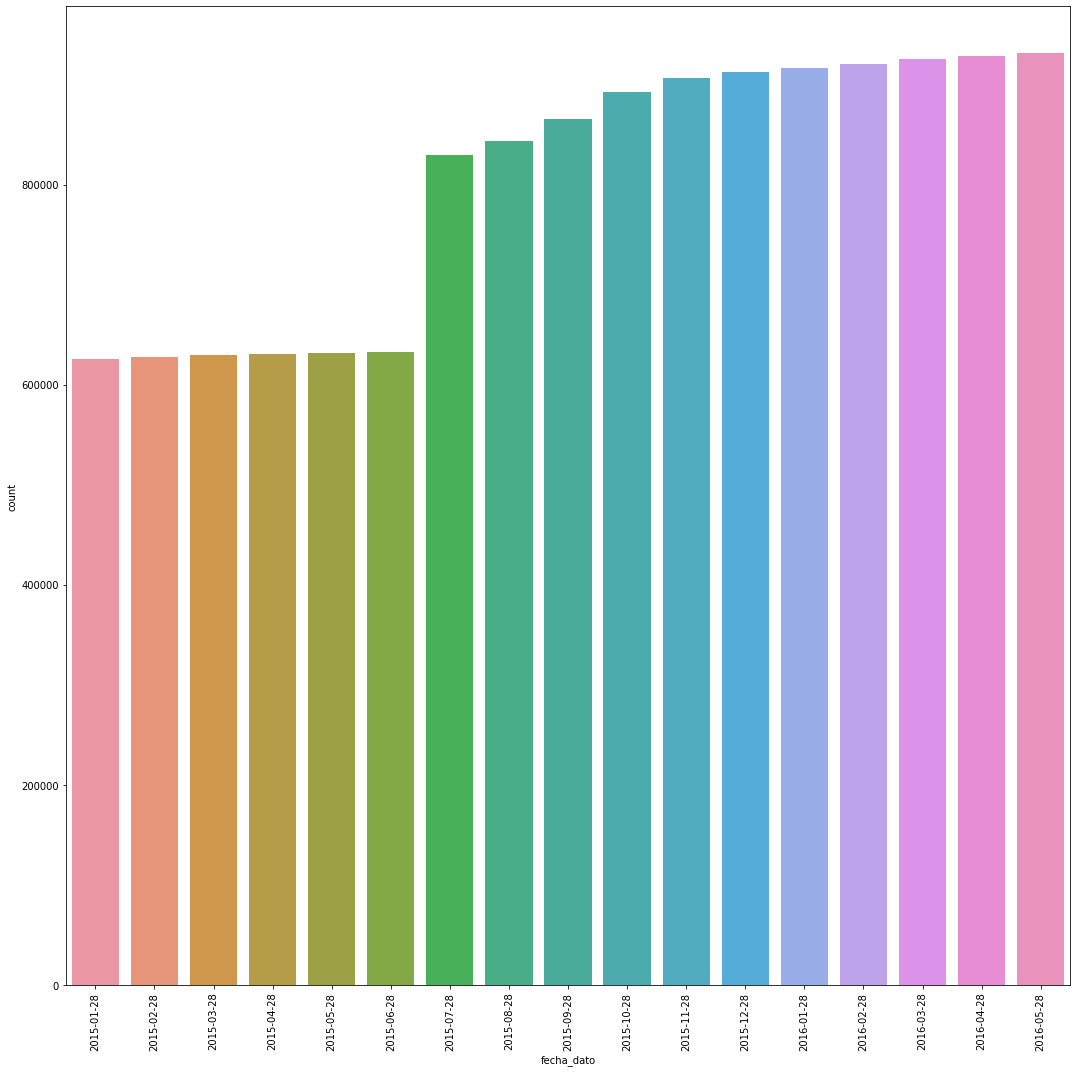

col: ind_empleado


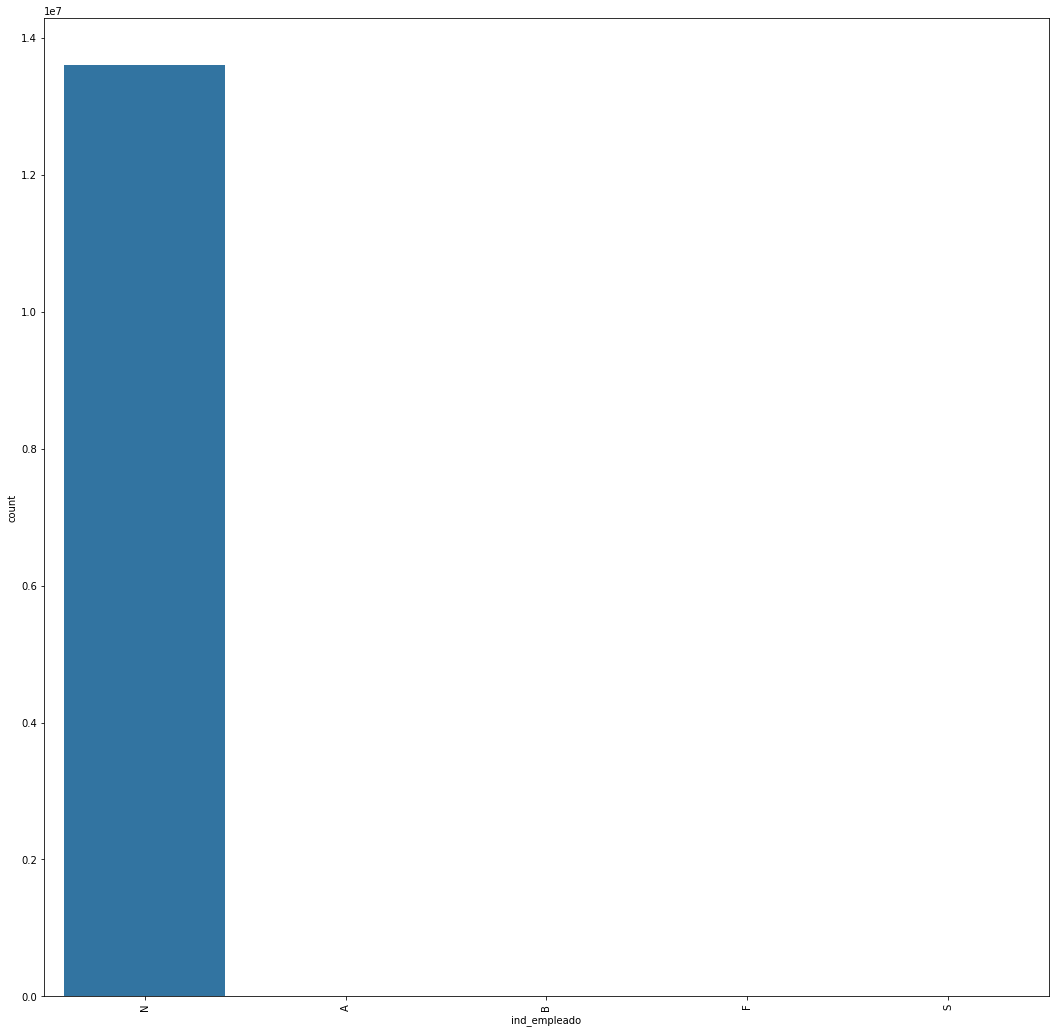

col: sexo


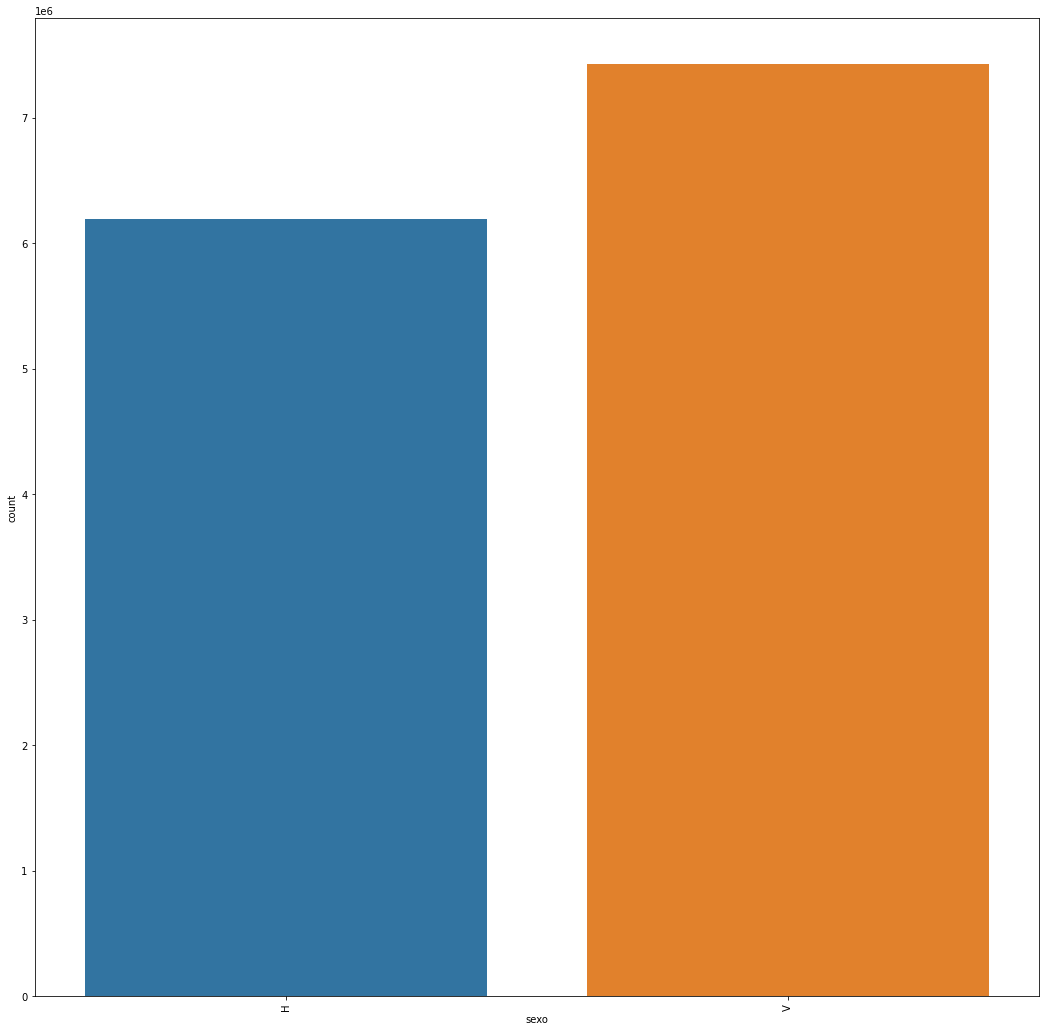

col: age


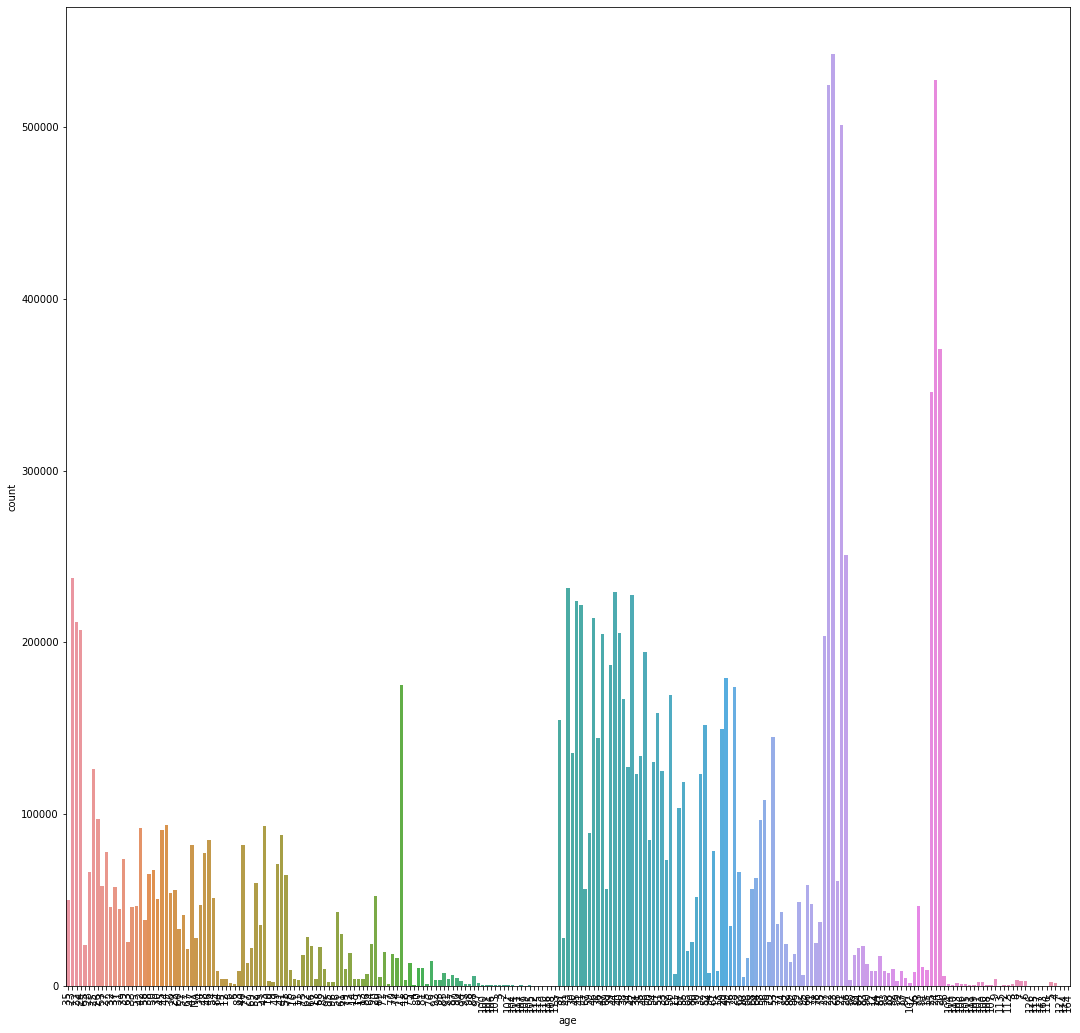

col: antiguedad


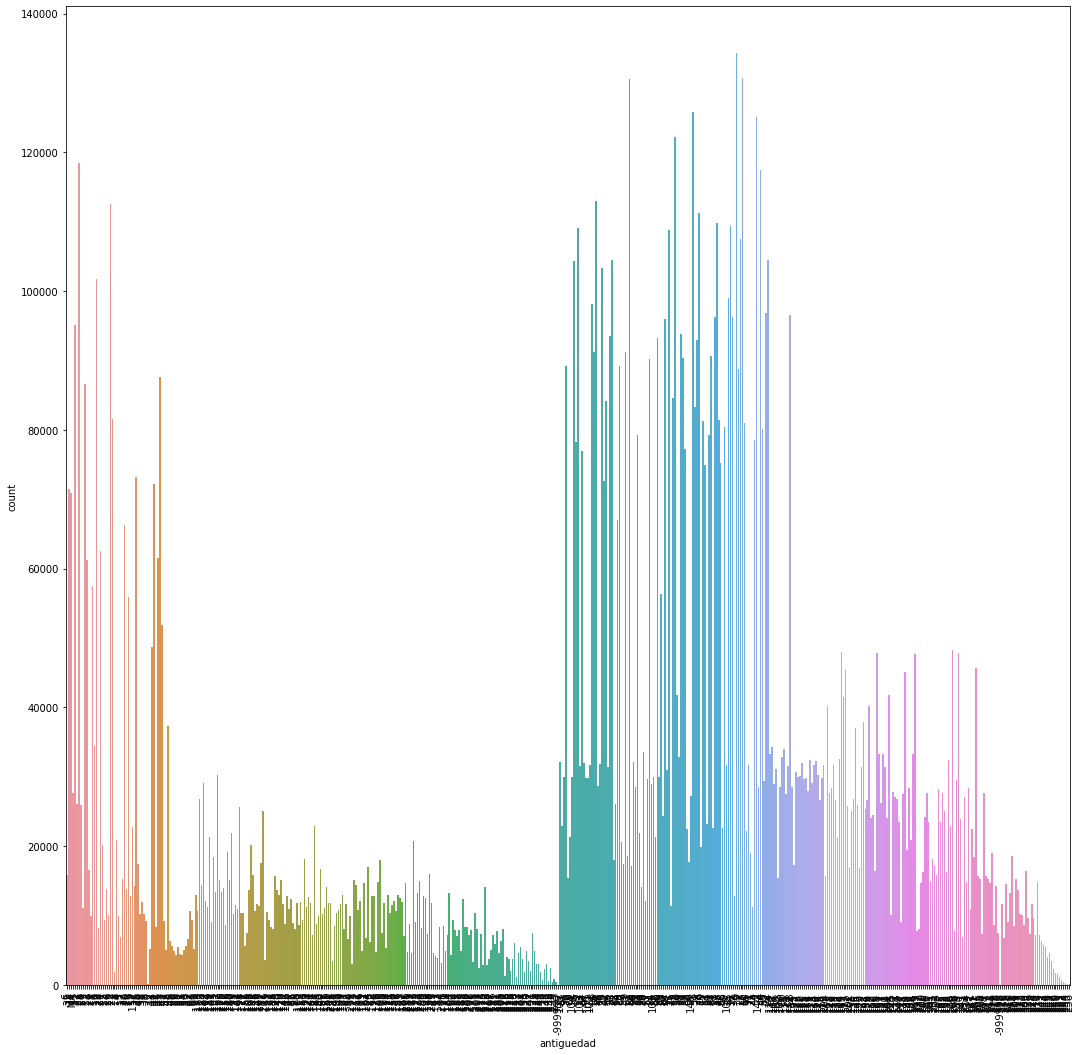

col: indrel


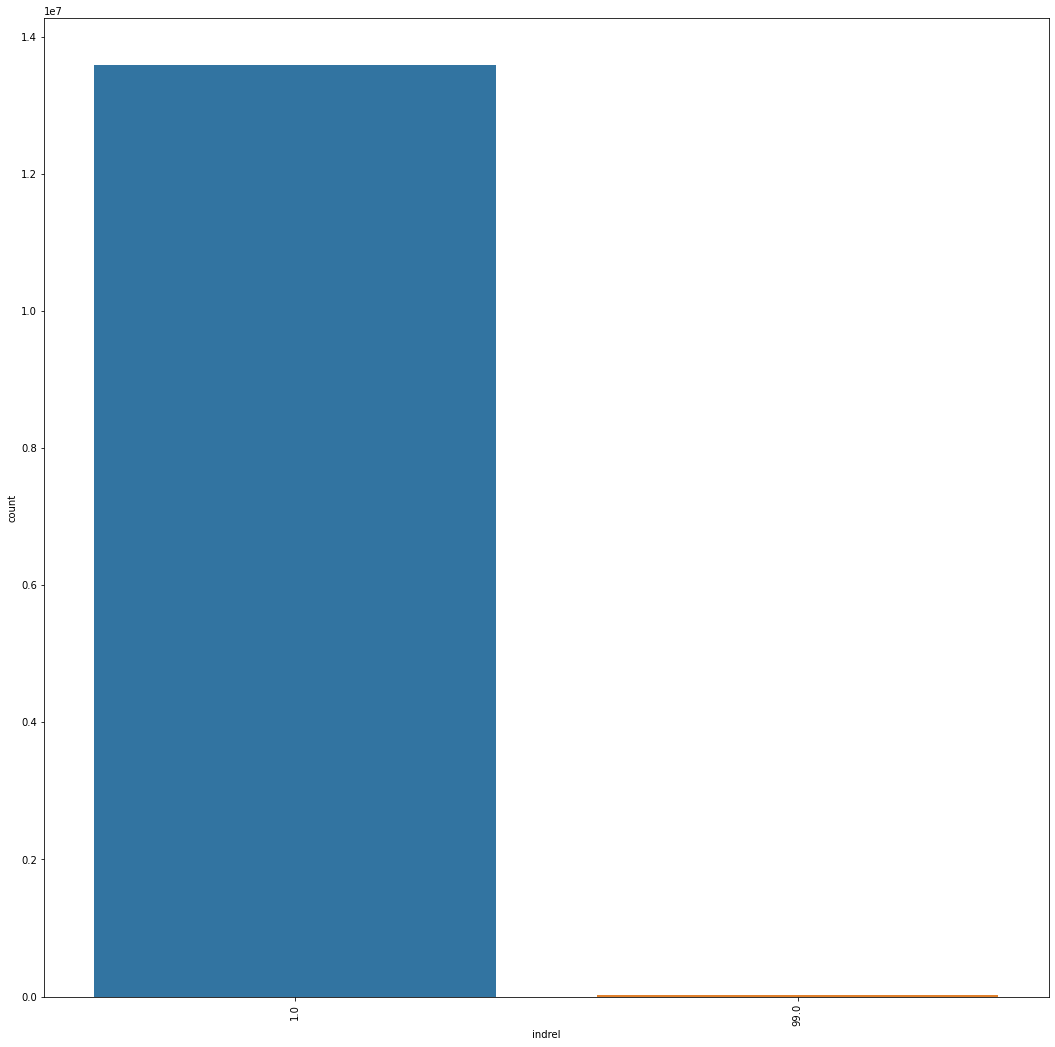

col: indrel_1mes


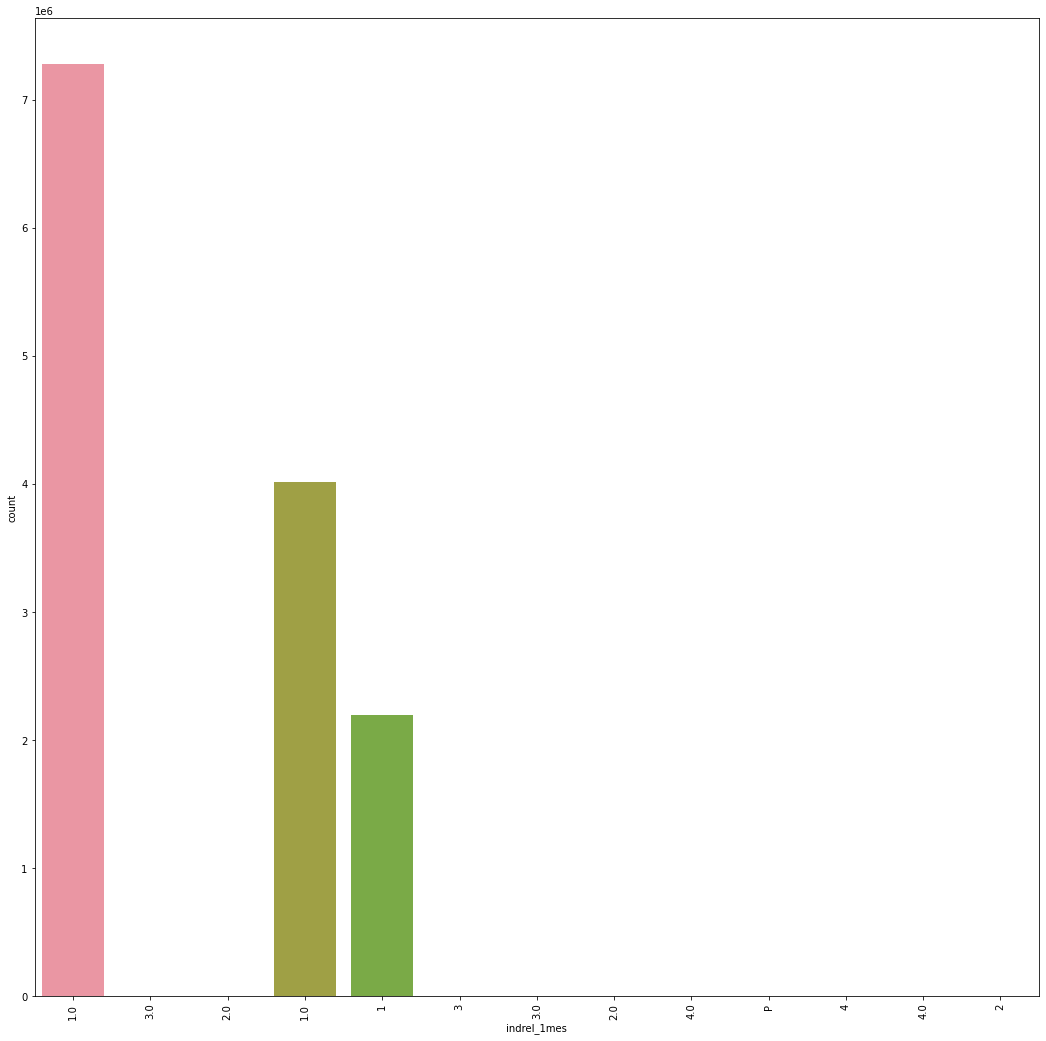

col: tiprel_1mes


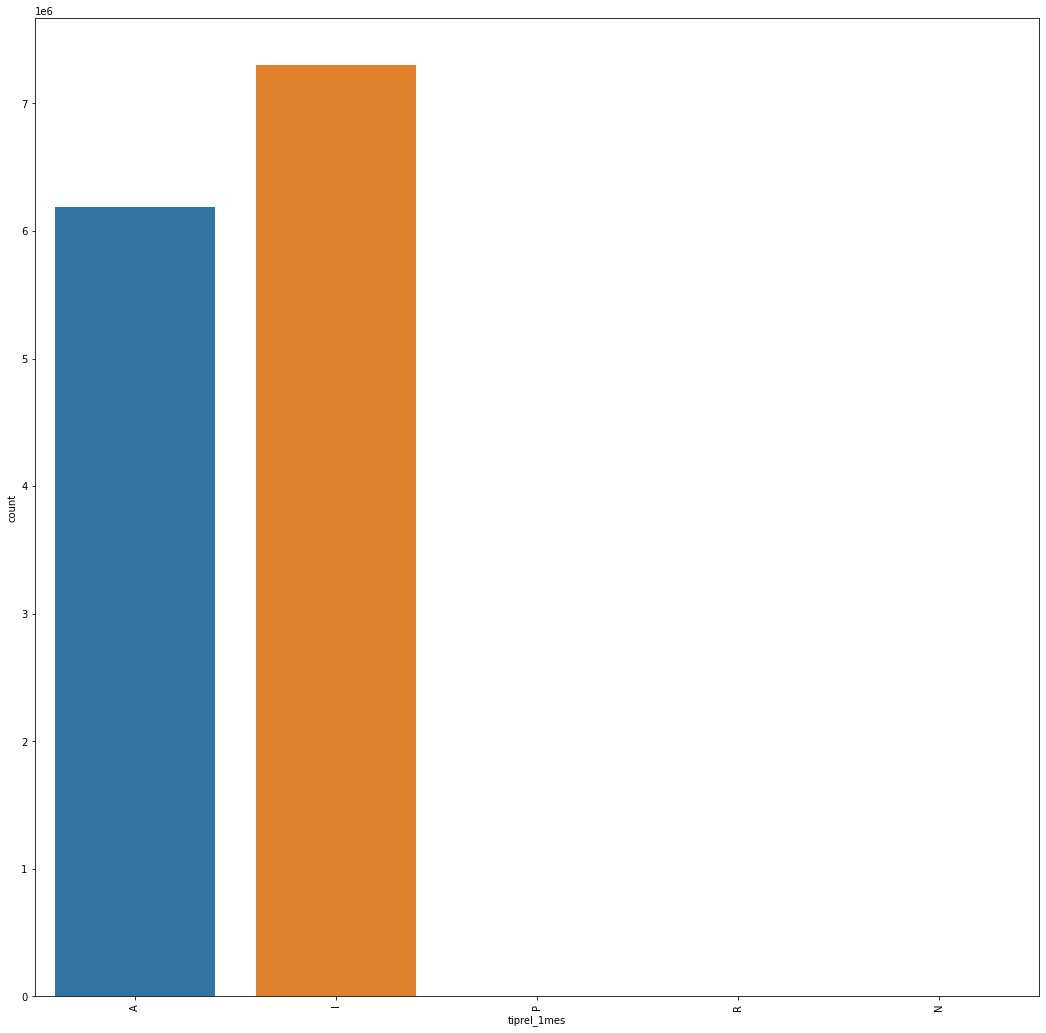

col: indresi


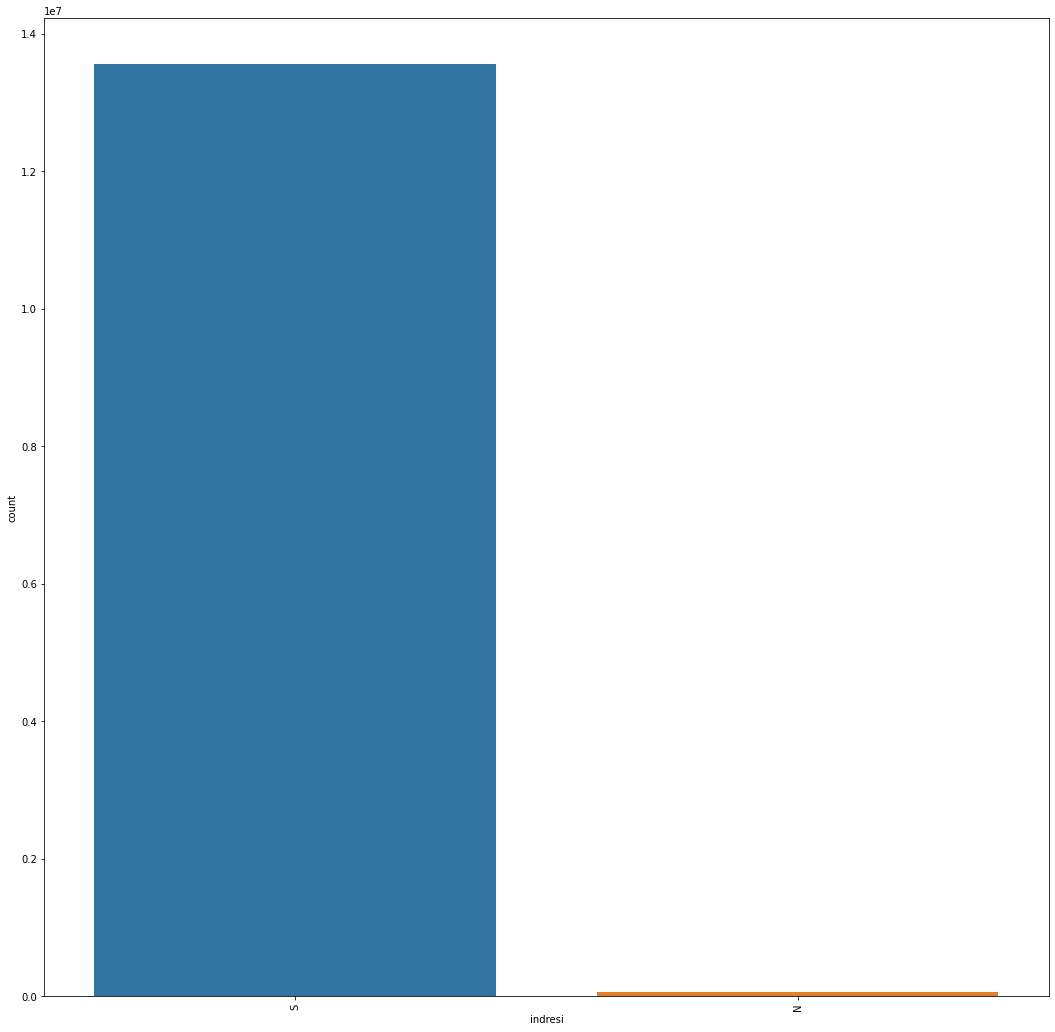

col: indext


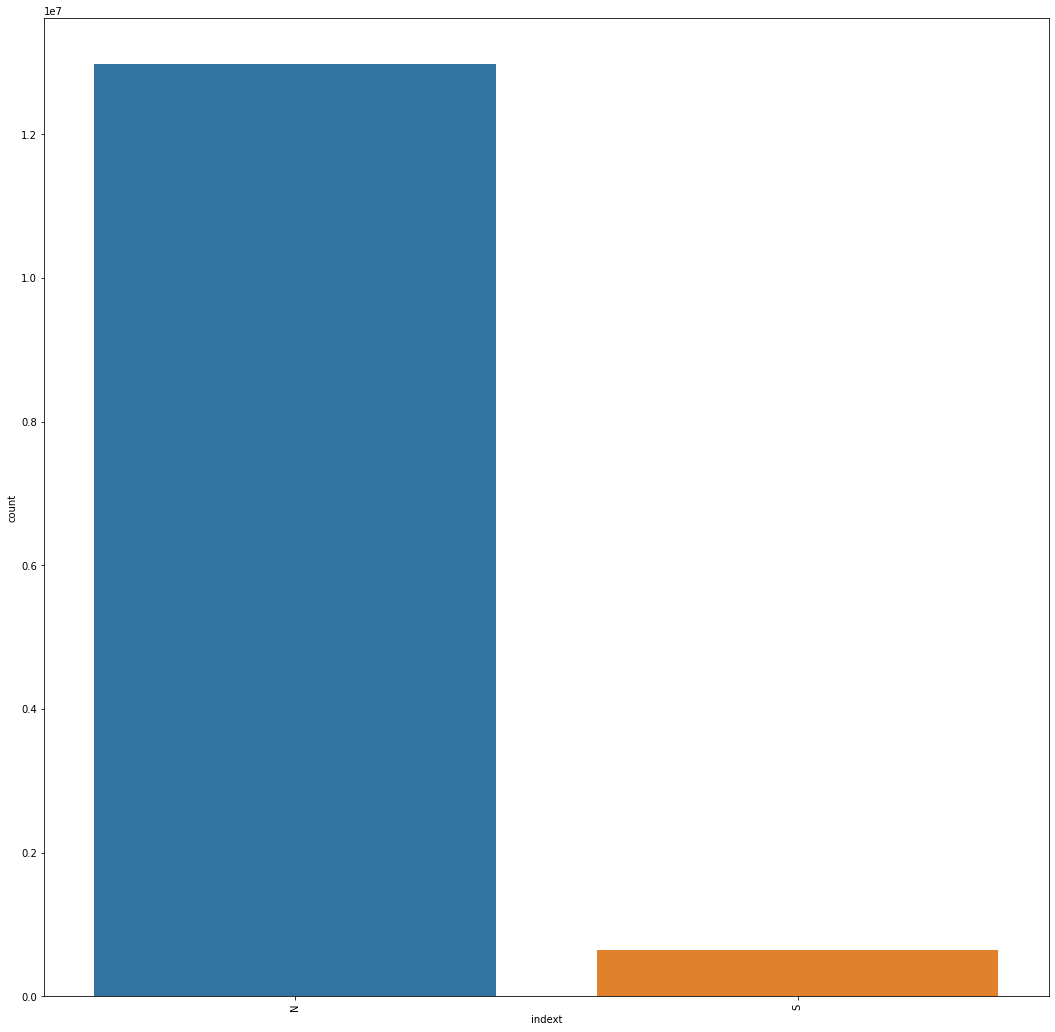

col: canal_entrada


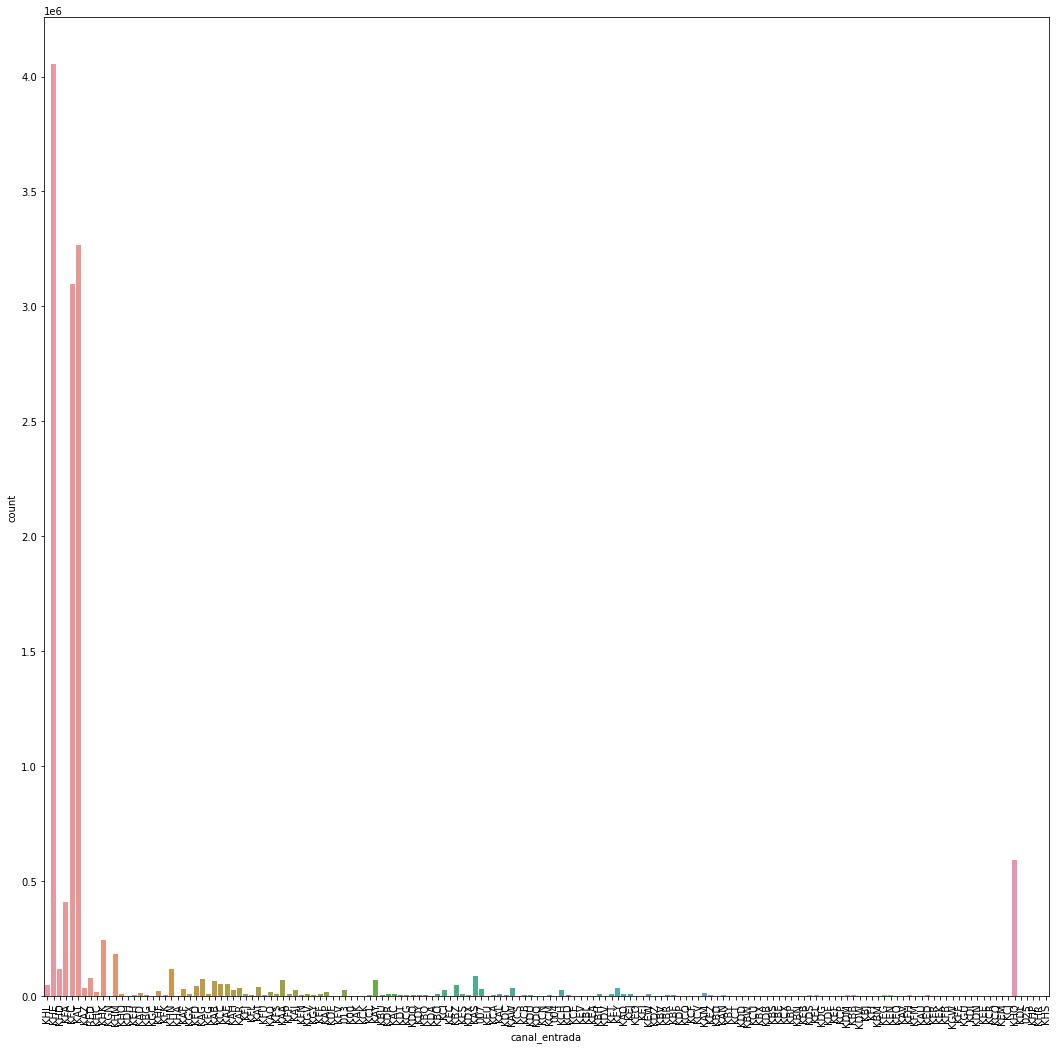

col: indfall


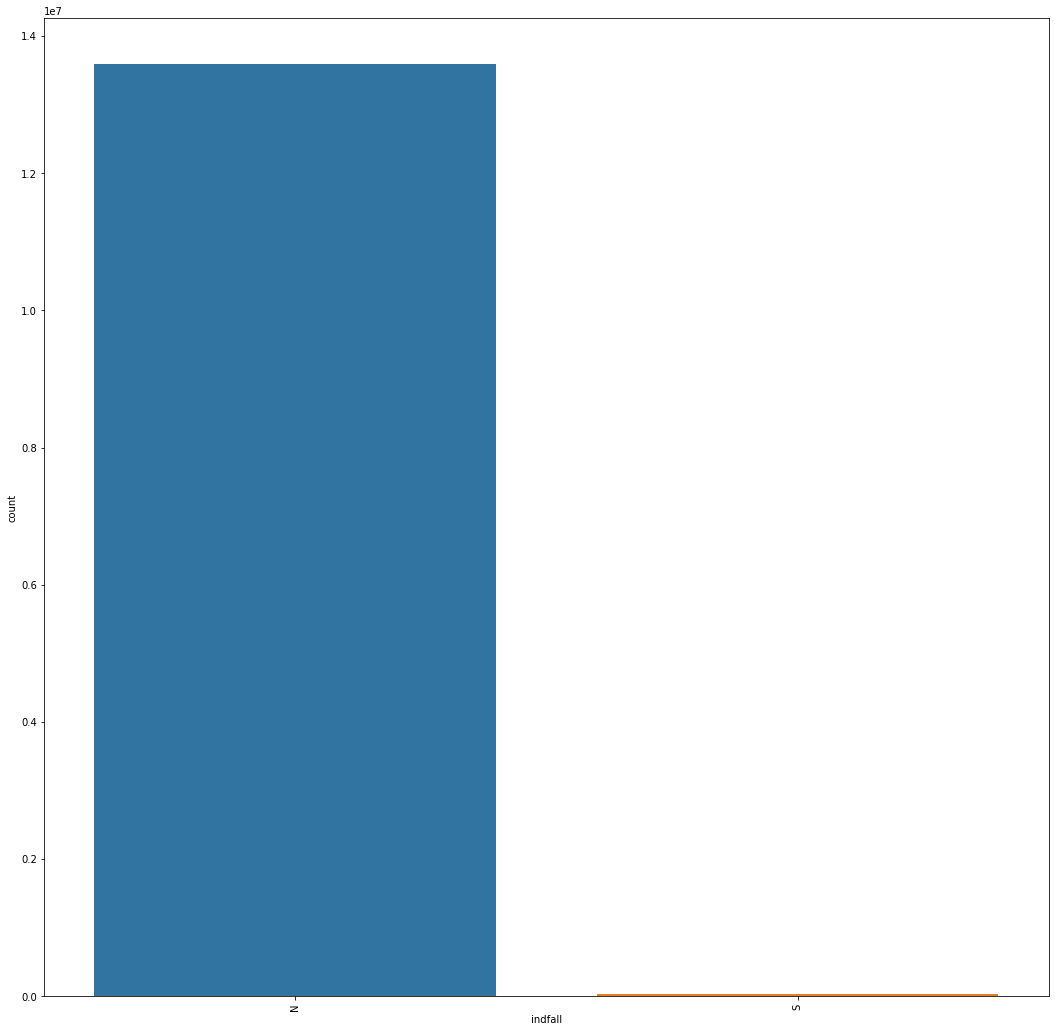

col: tipodom


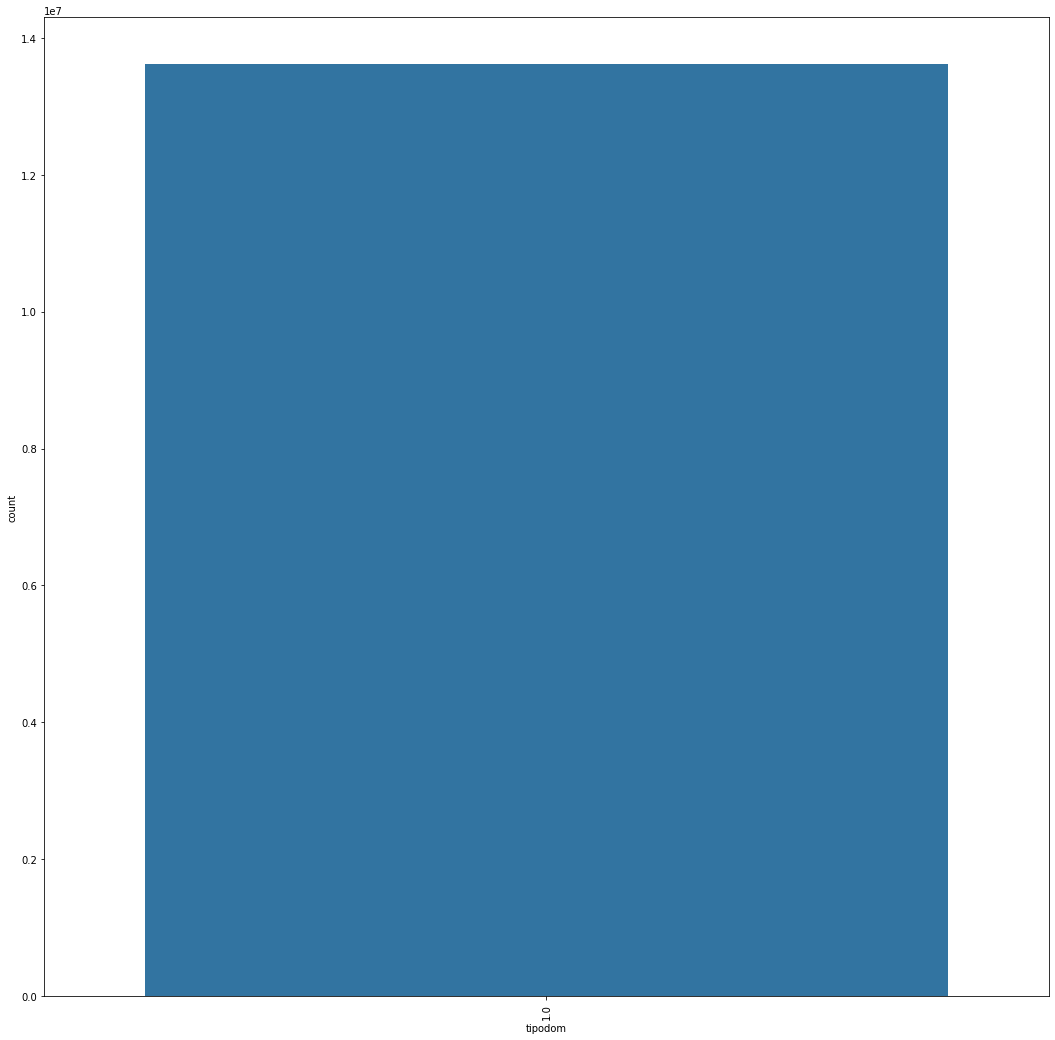

col: cod_prov


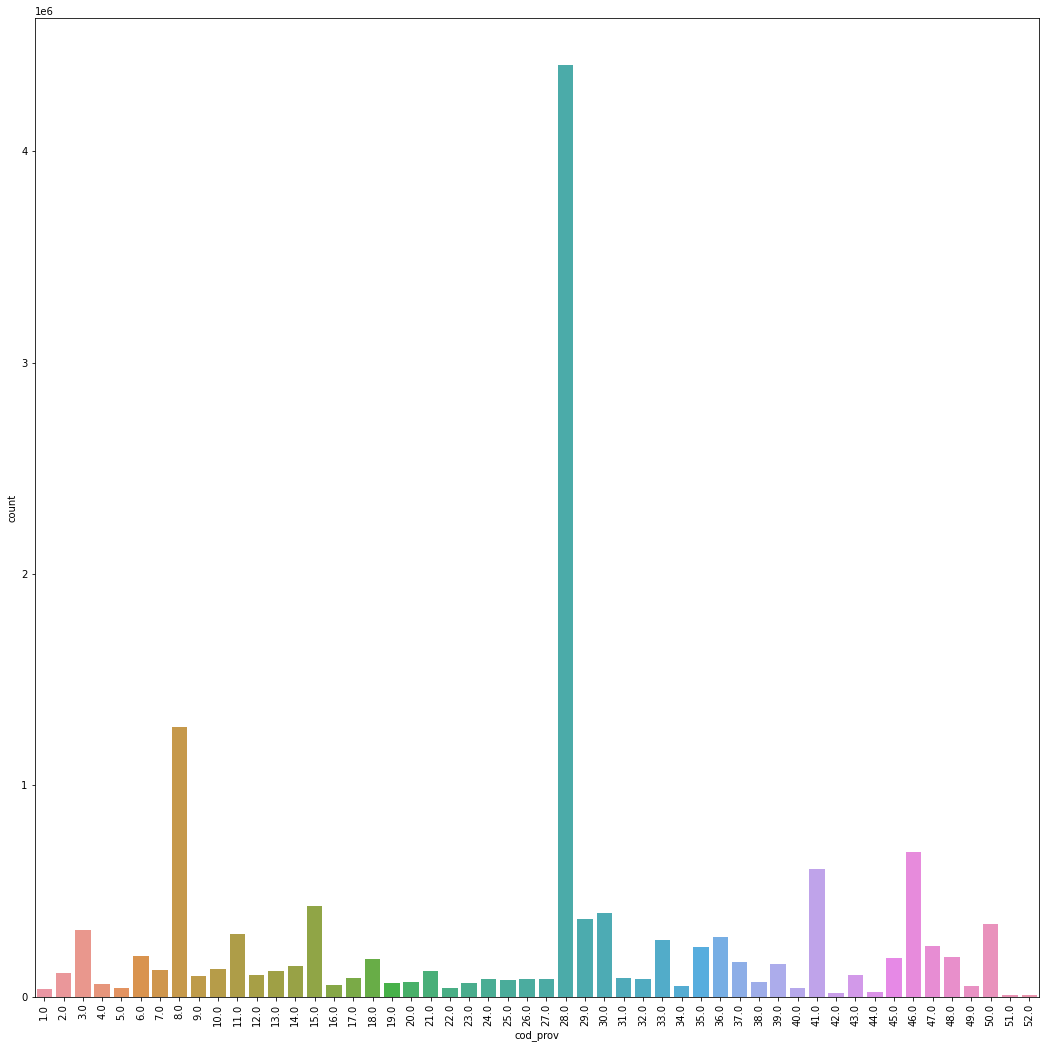

col: ind_actividad_cliente


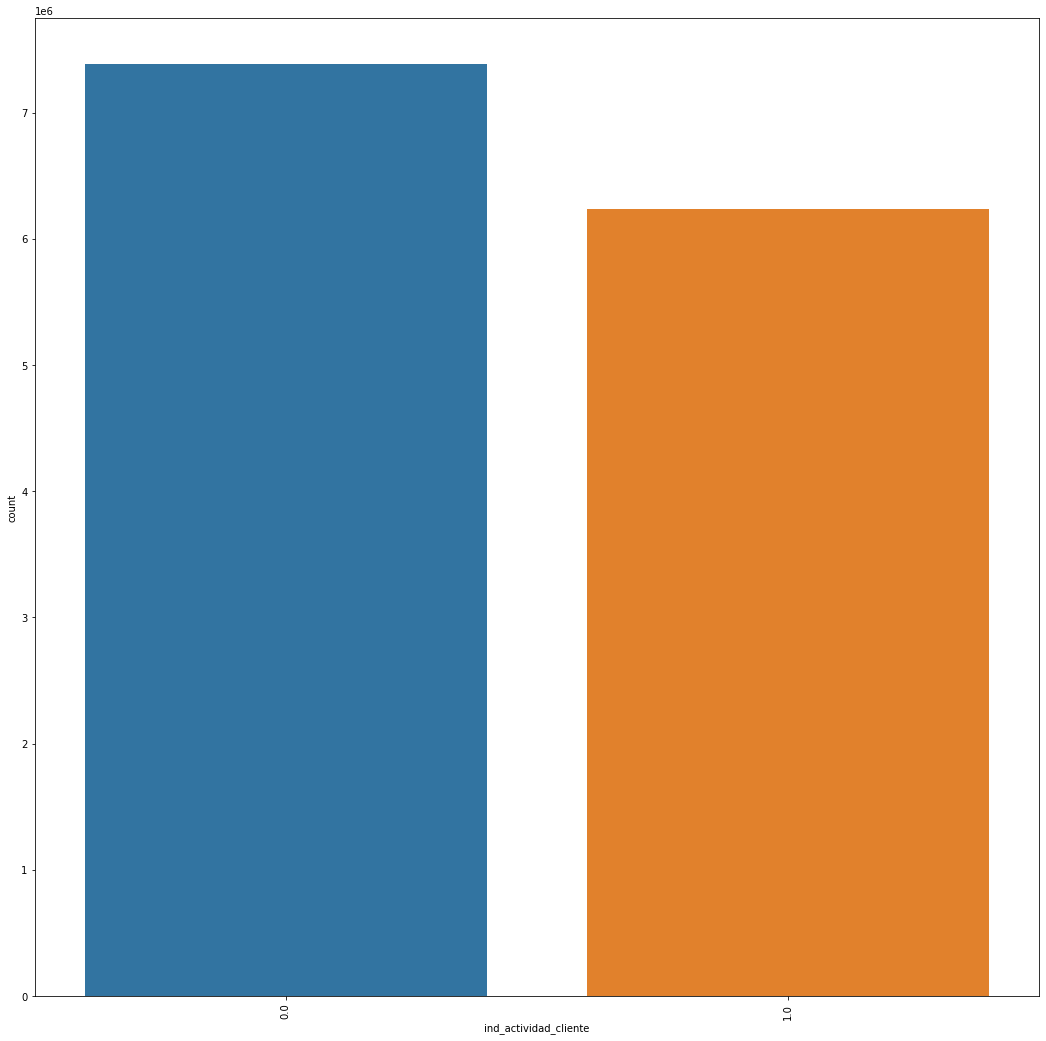

col: segmento


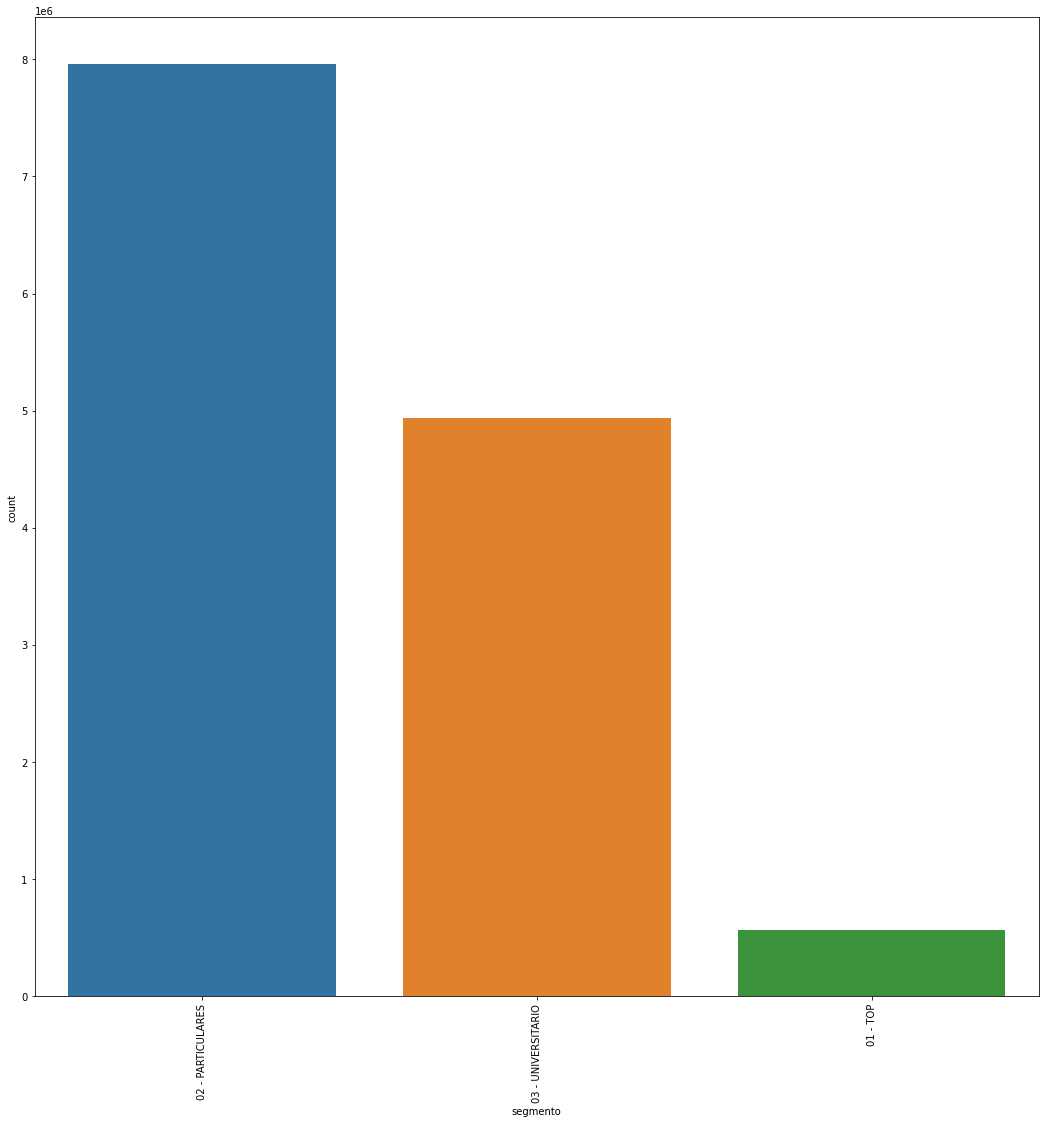

col: ind_ahor_fin_ult1


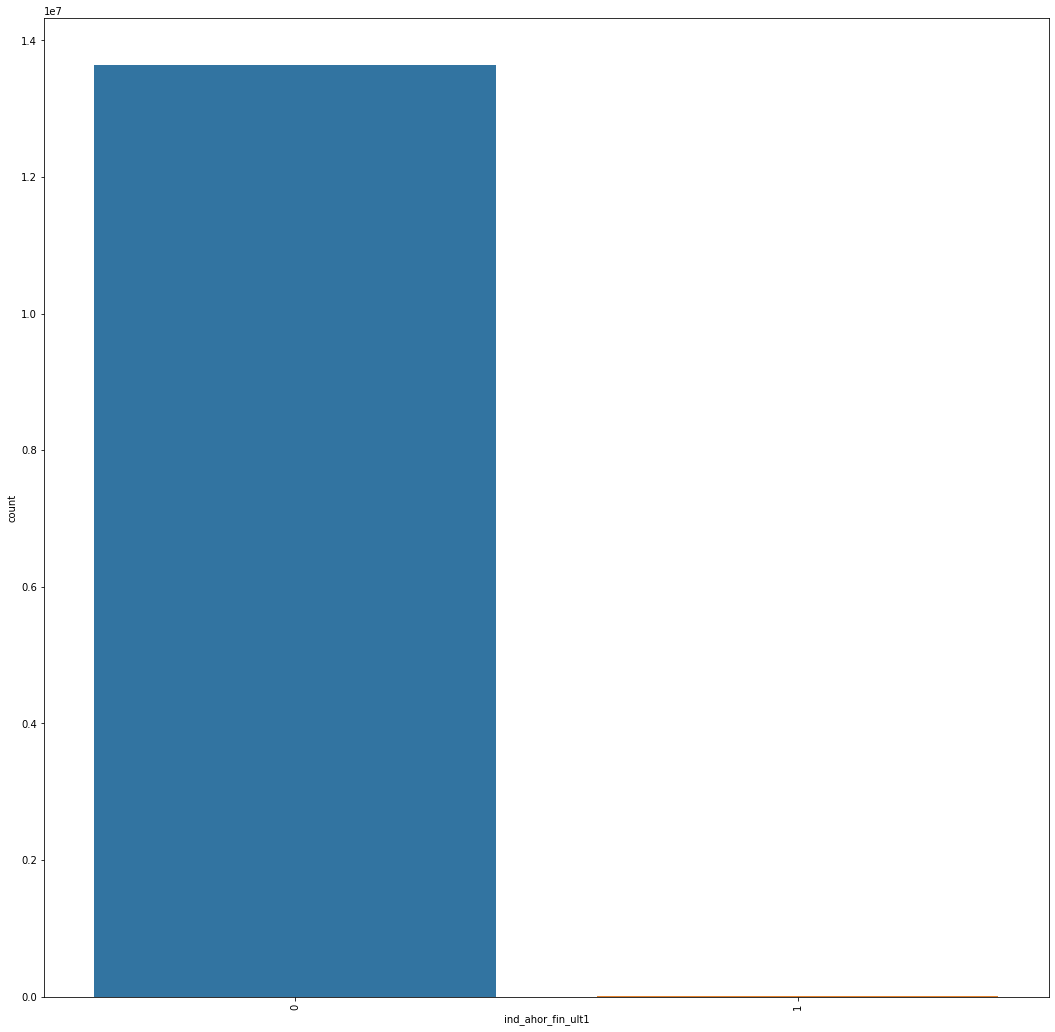

col: ind_aval_fin_ult1


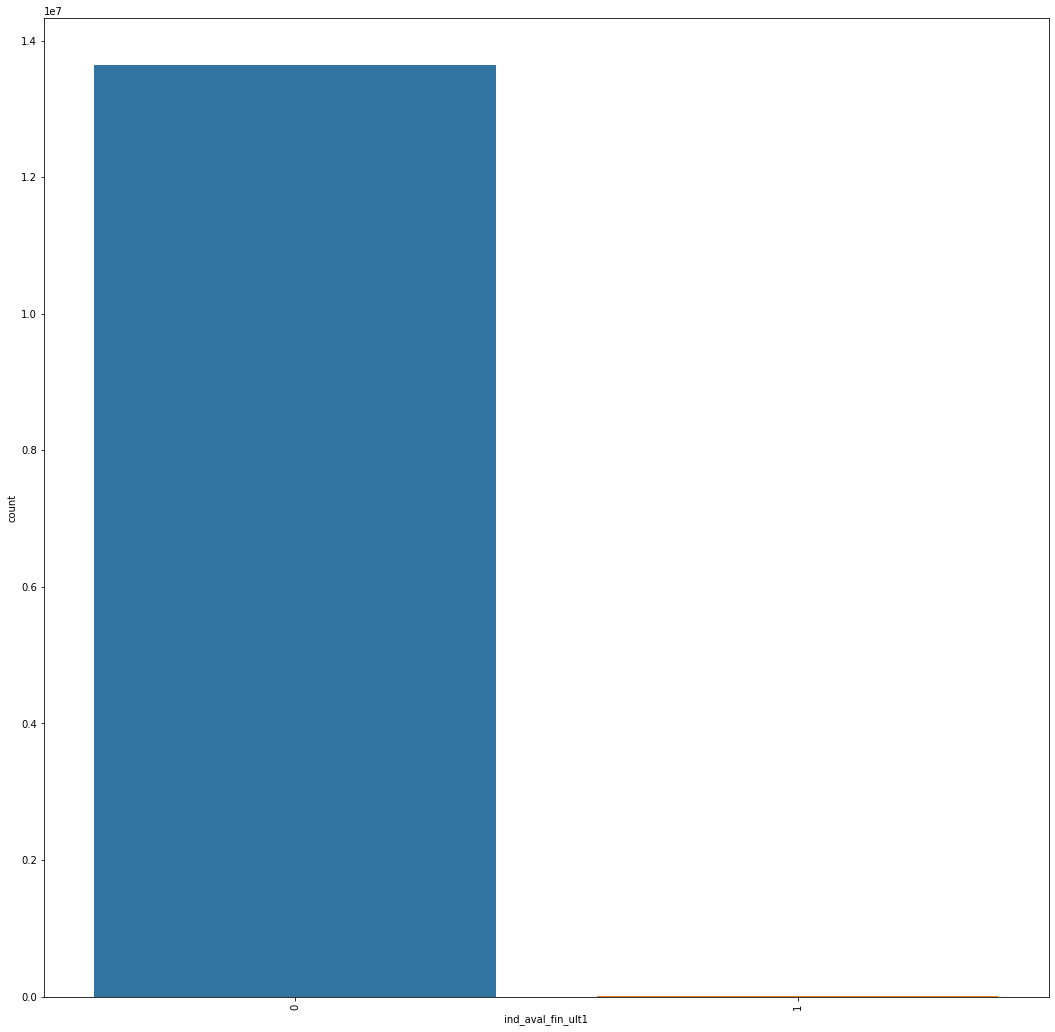

col: ind_cco_fin_ult1


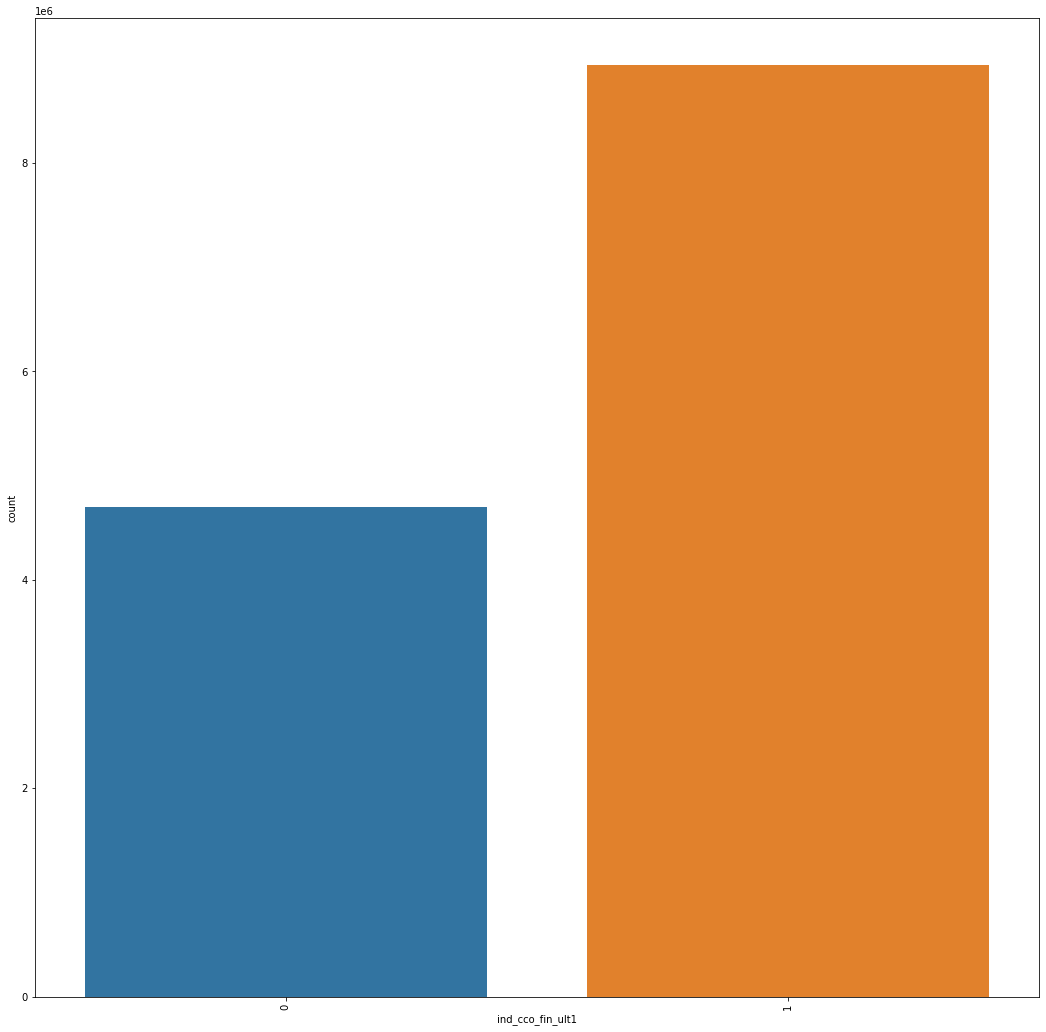

col: ind_cder_fin_ult1


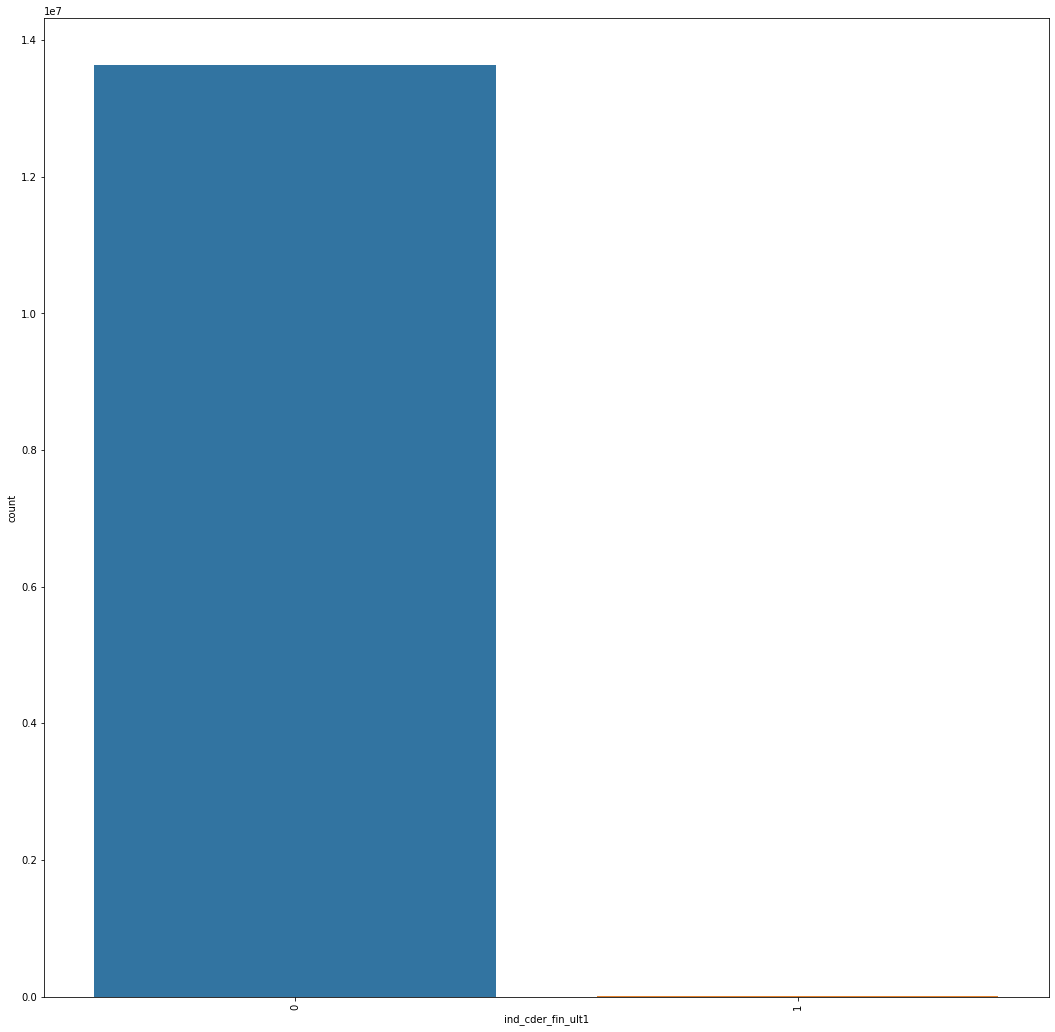

col: ind_cno_fin_ult1


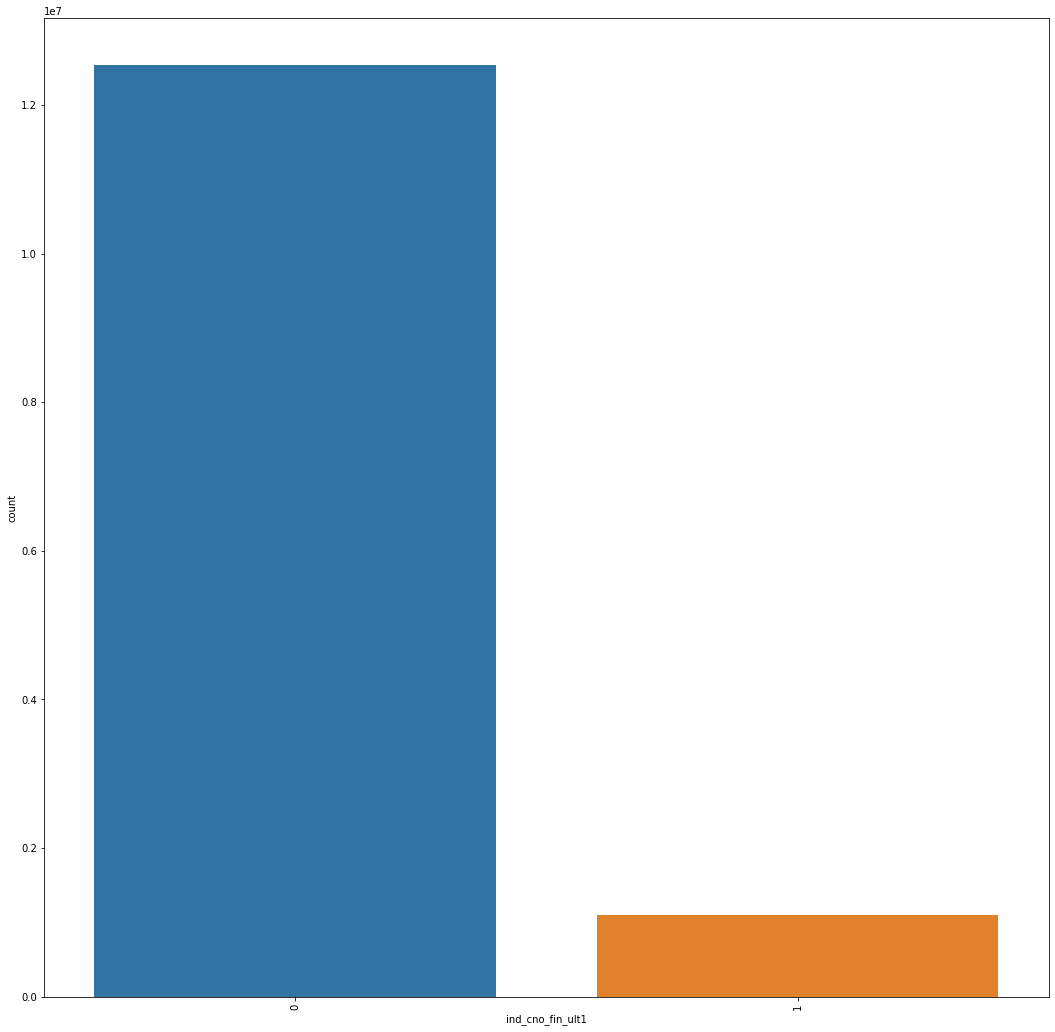

col: ind_ctju_fin_ult1


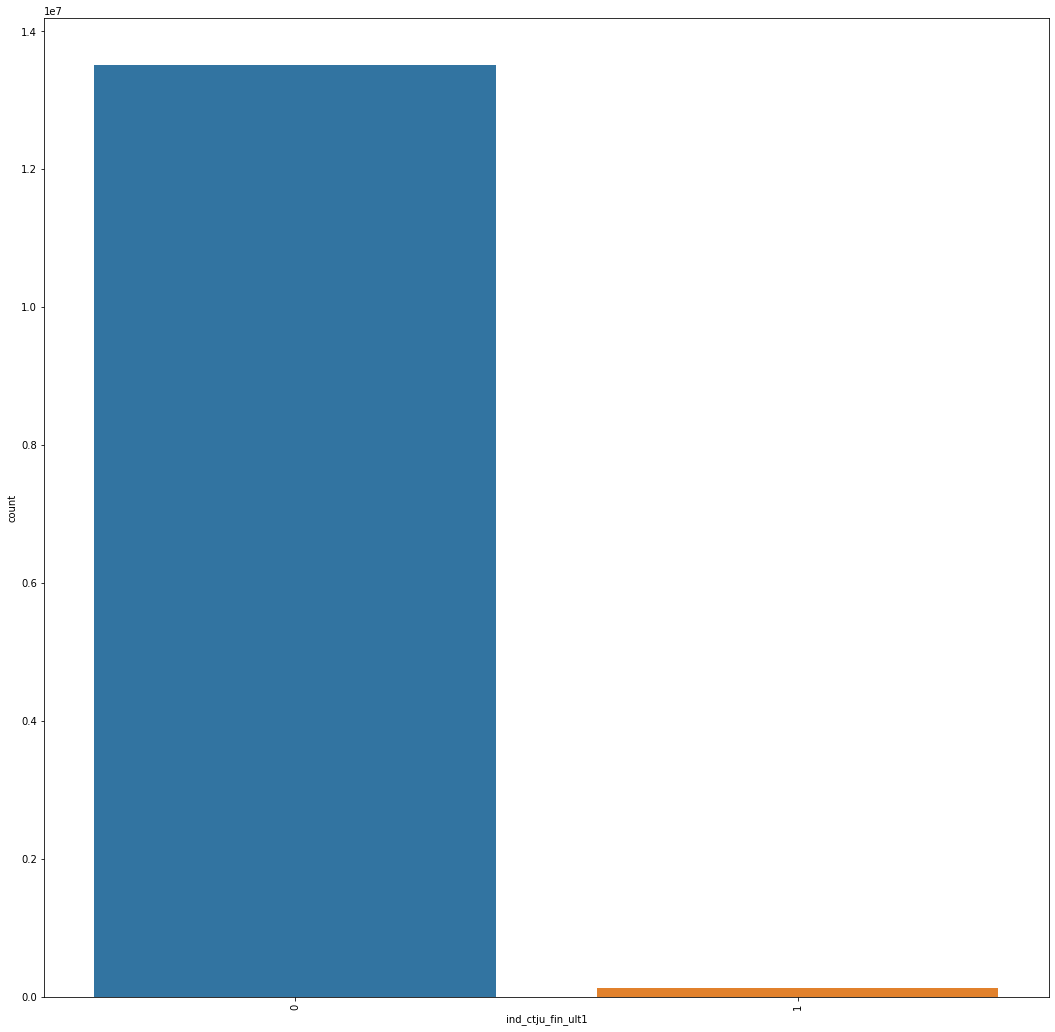

col: ind_ctma_fin_ult1


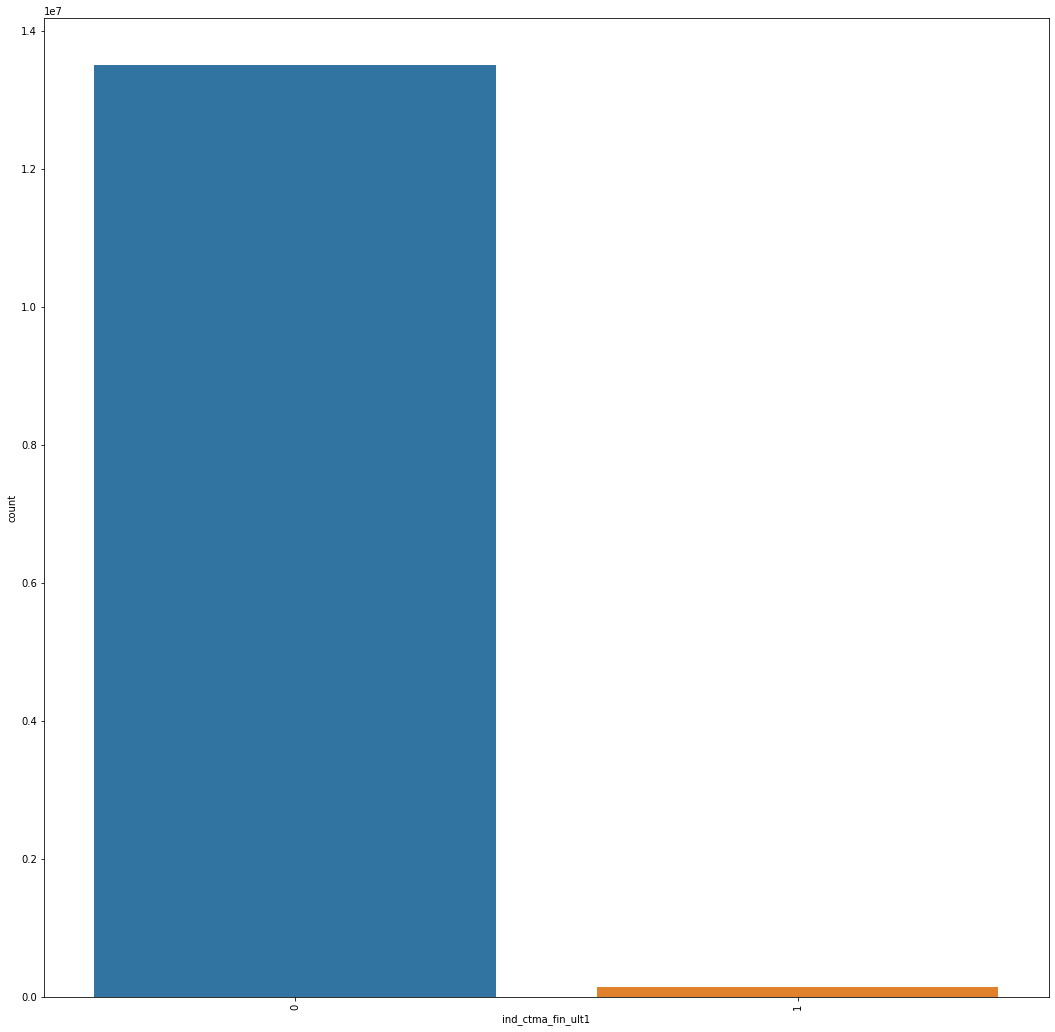

col: ind_ctop_fin_ult1


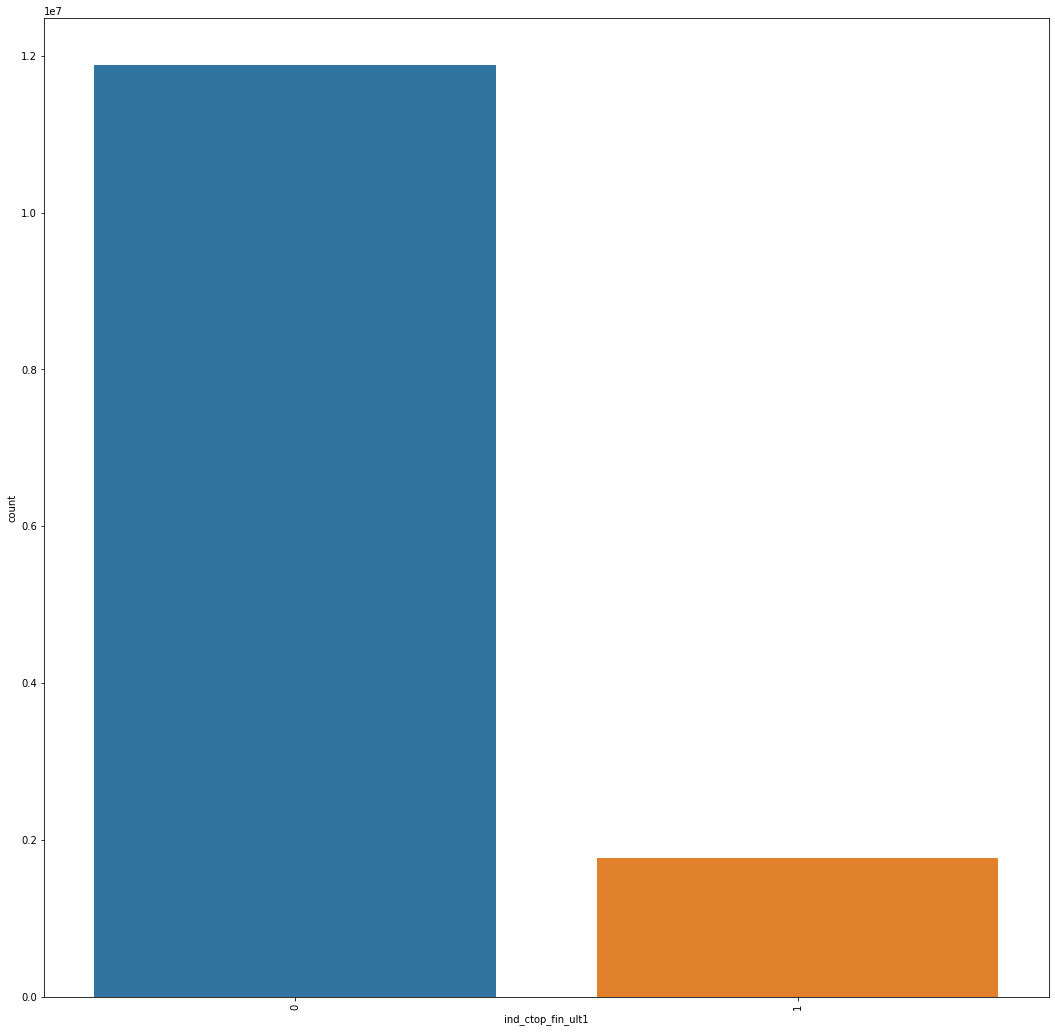

col: ind_ctpp_fin_ult1


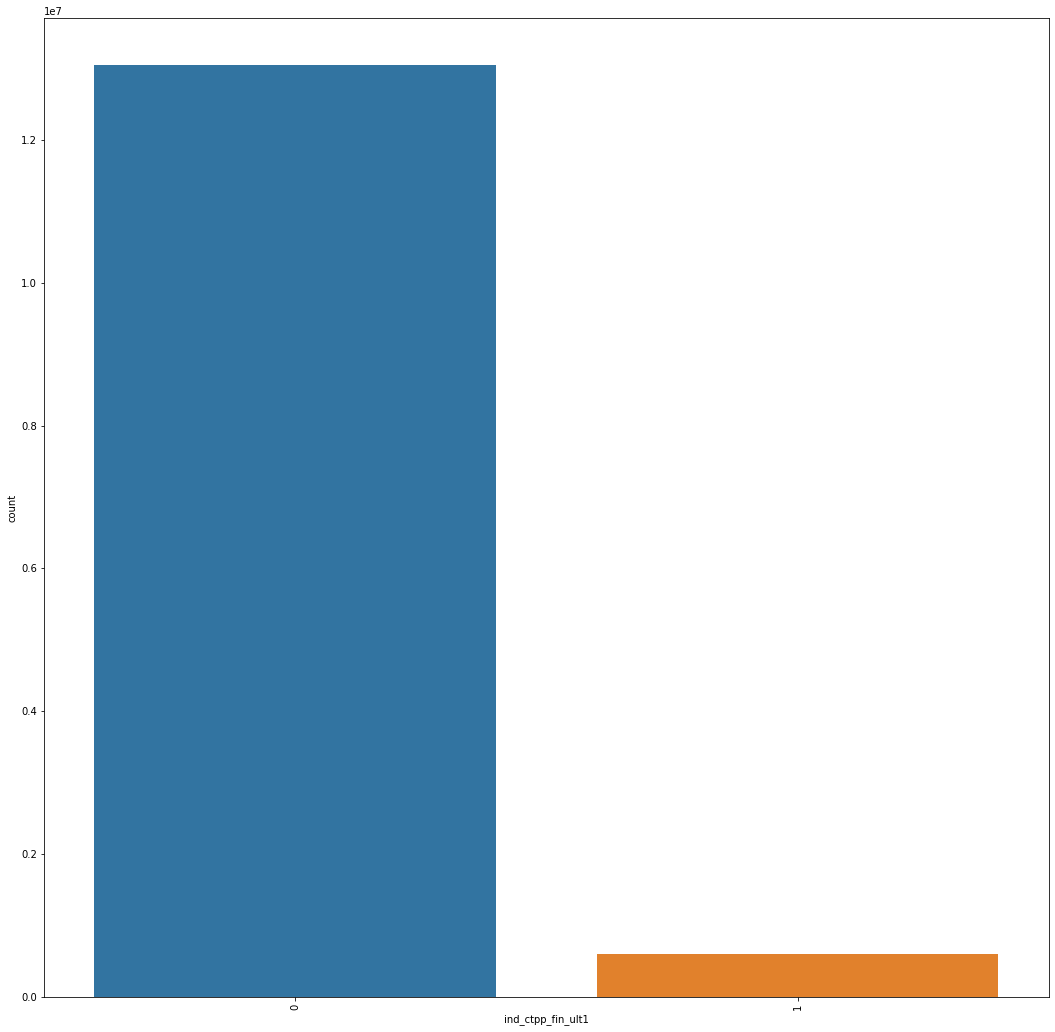

col: ind_deco_fin_ult1


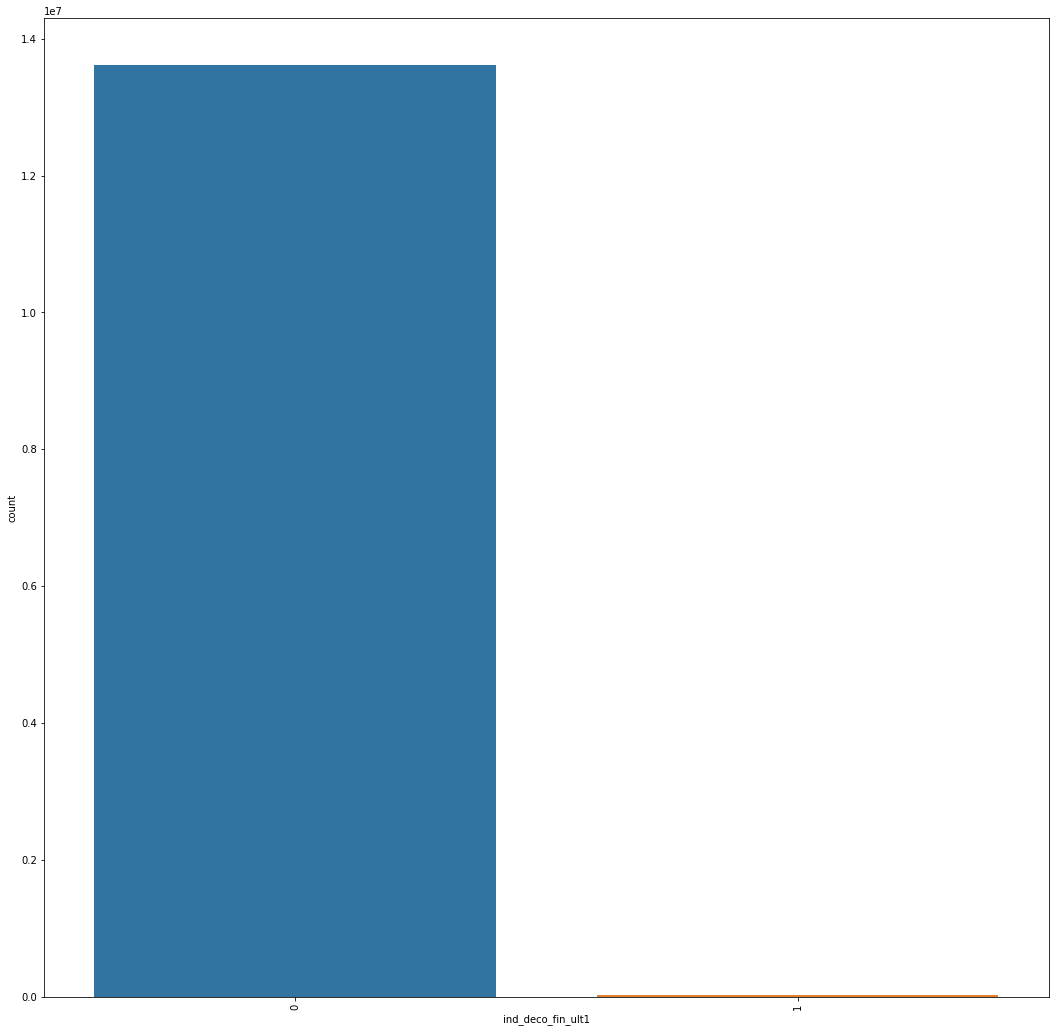

col: ind_deme_fin_ult1


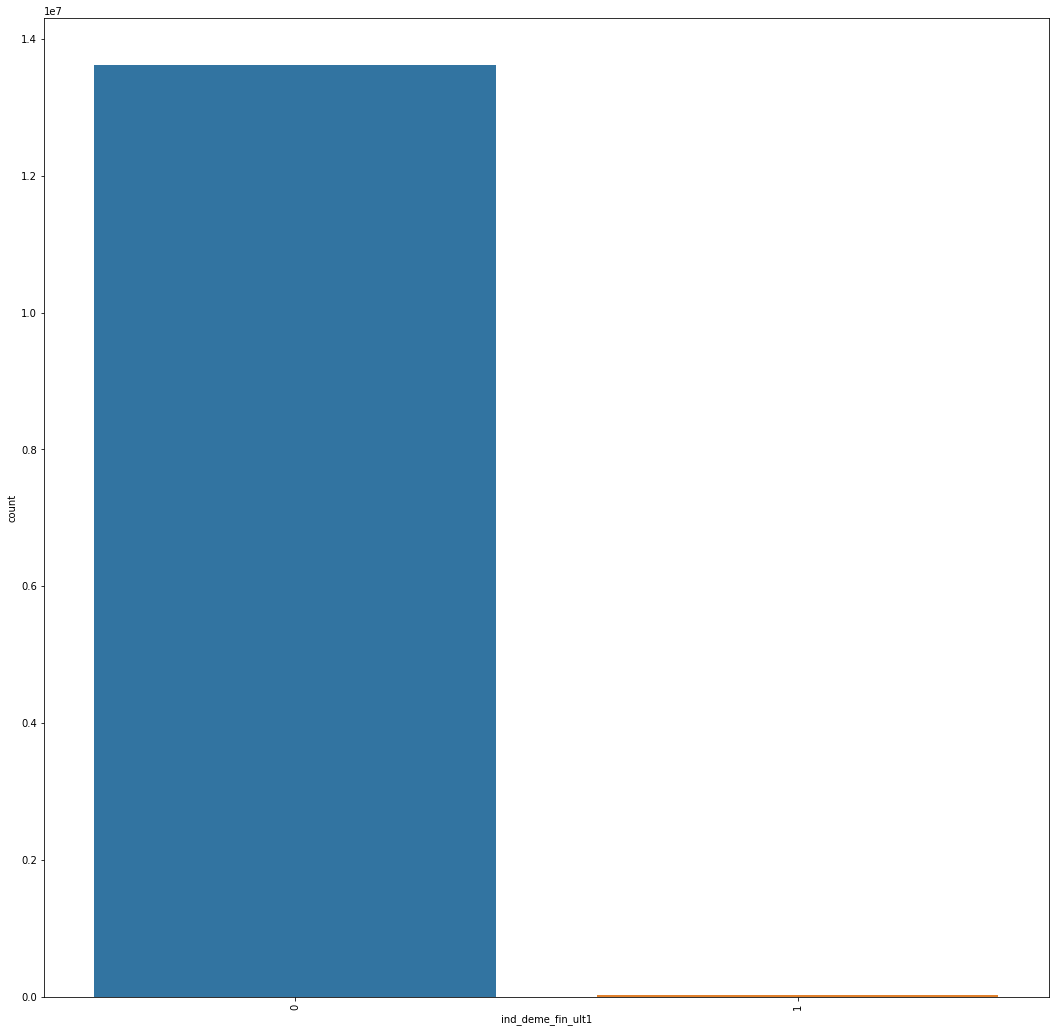

col: ind_dela_fin_ult1


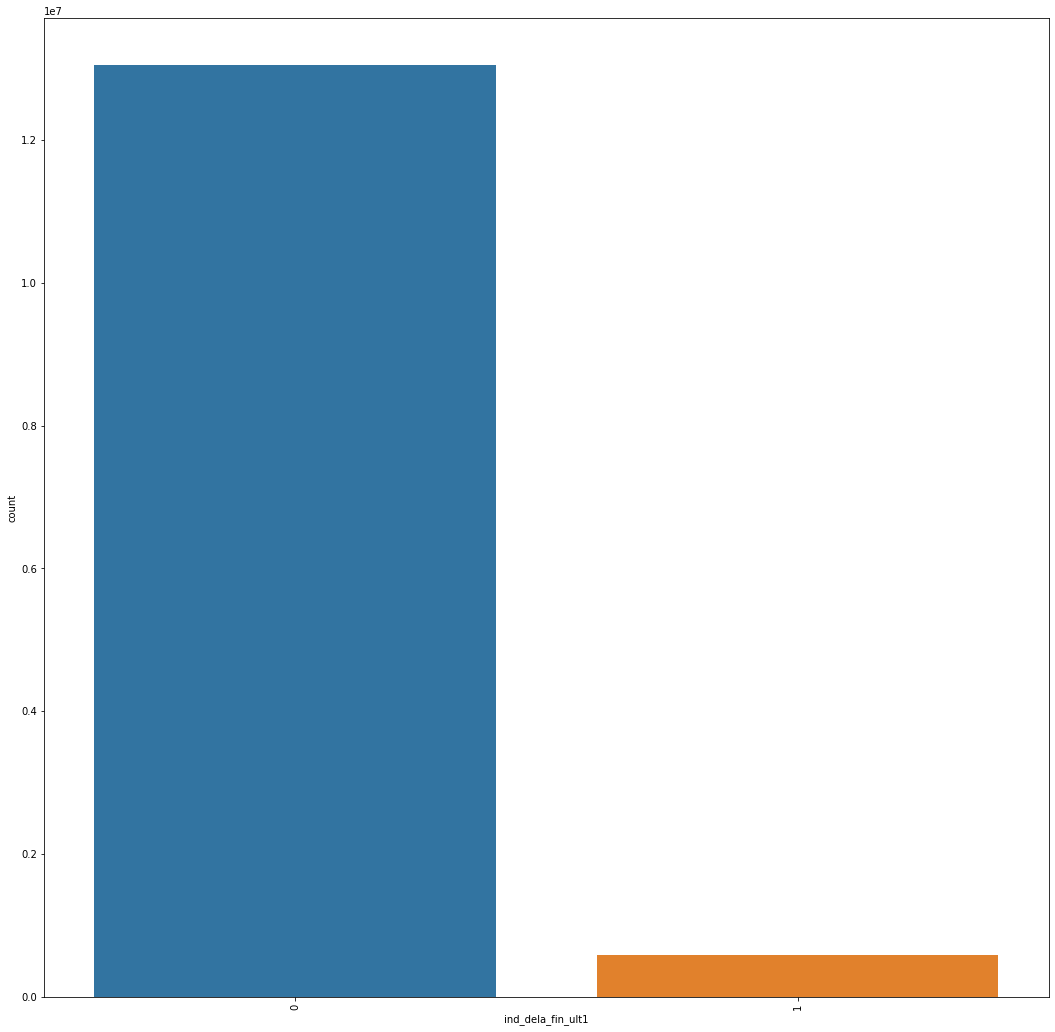

col: ind_ecue_fin_ult1


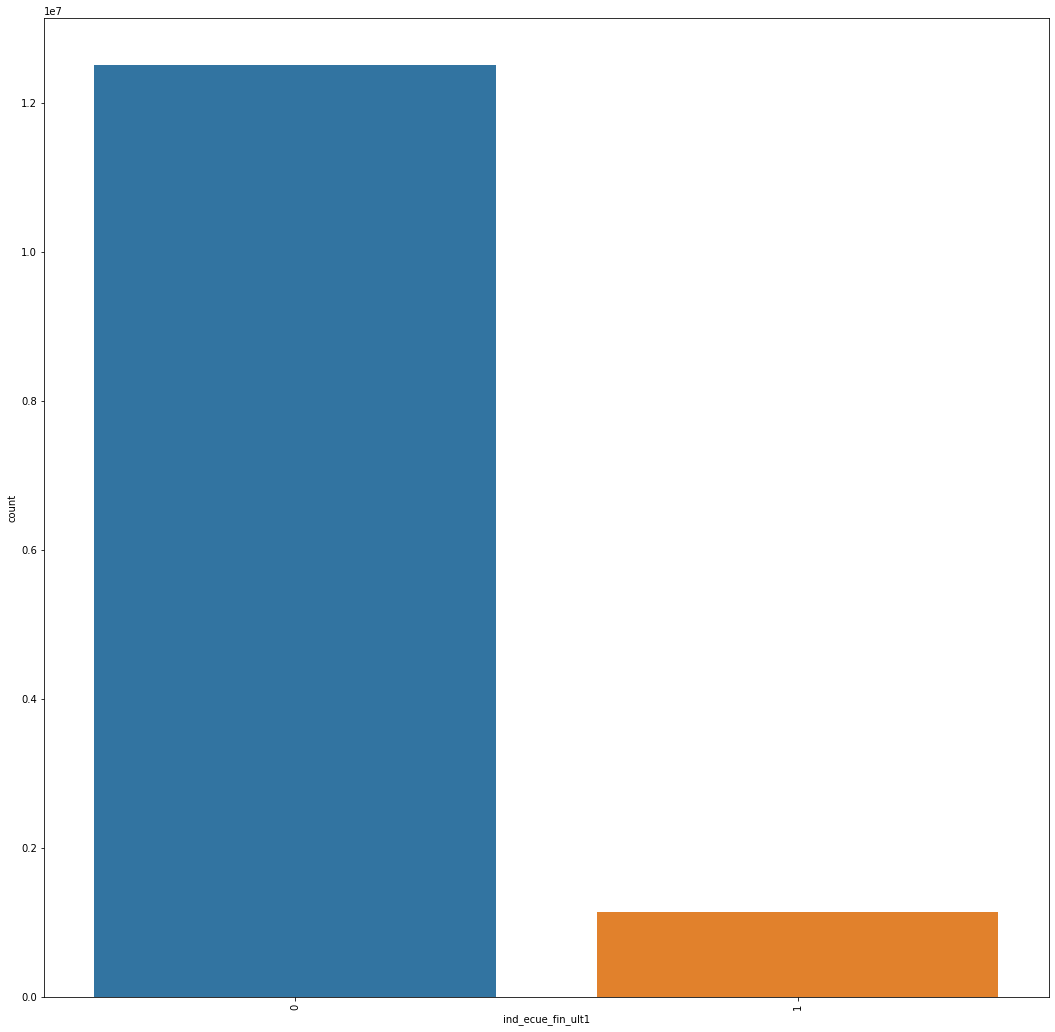

col: ind_fond_fin_ult1


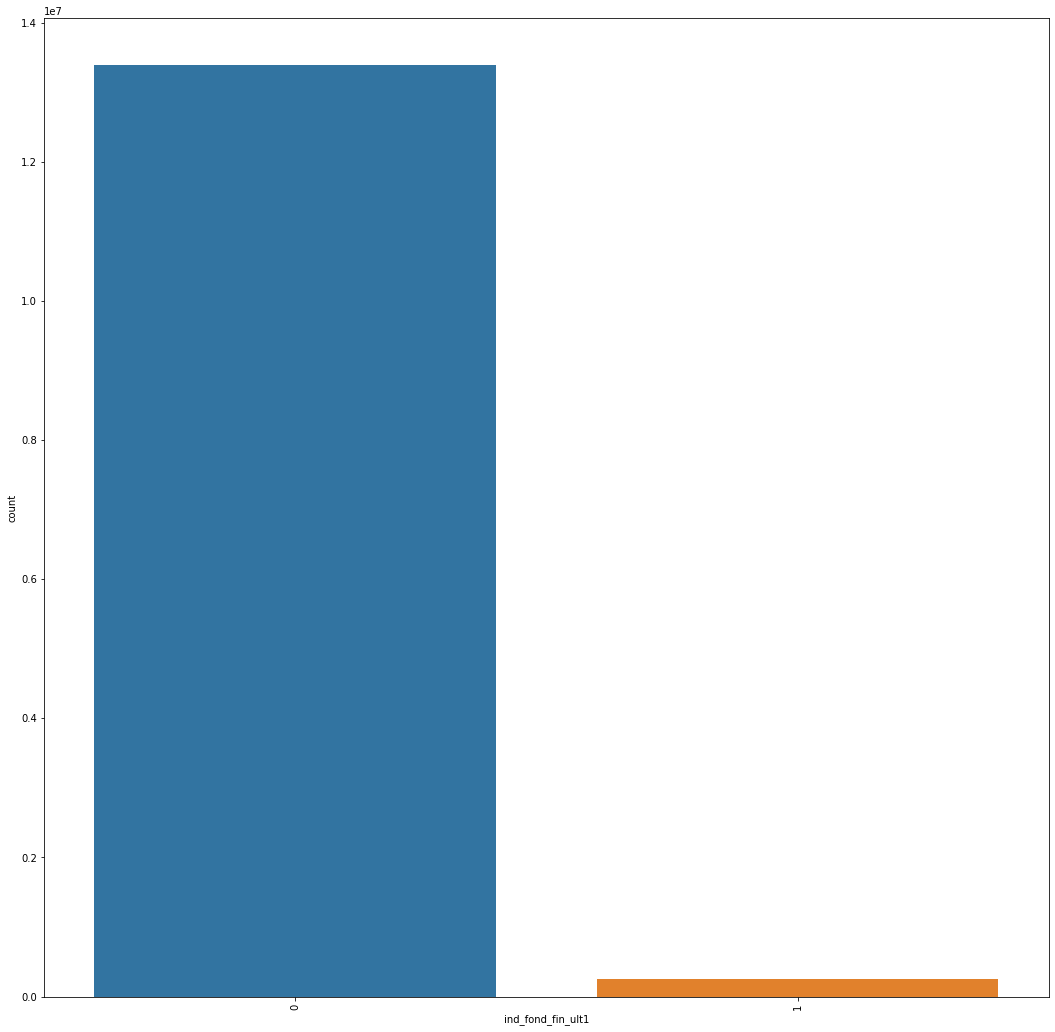

col: ind_hip_fin_ult1


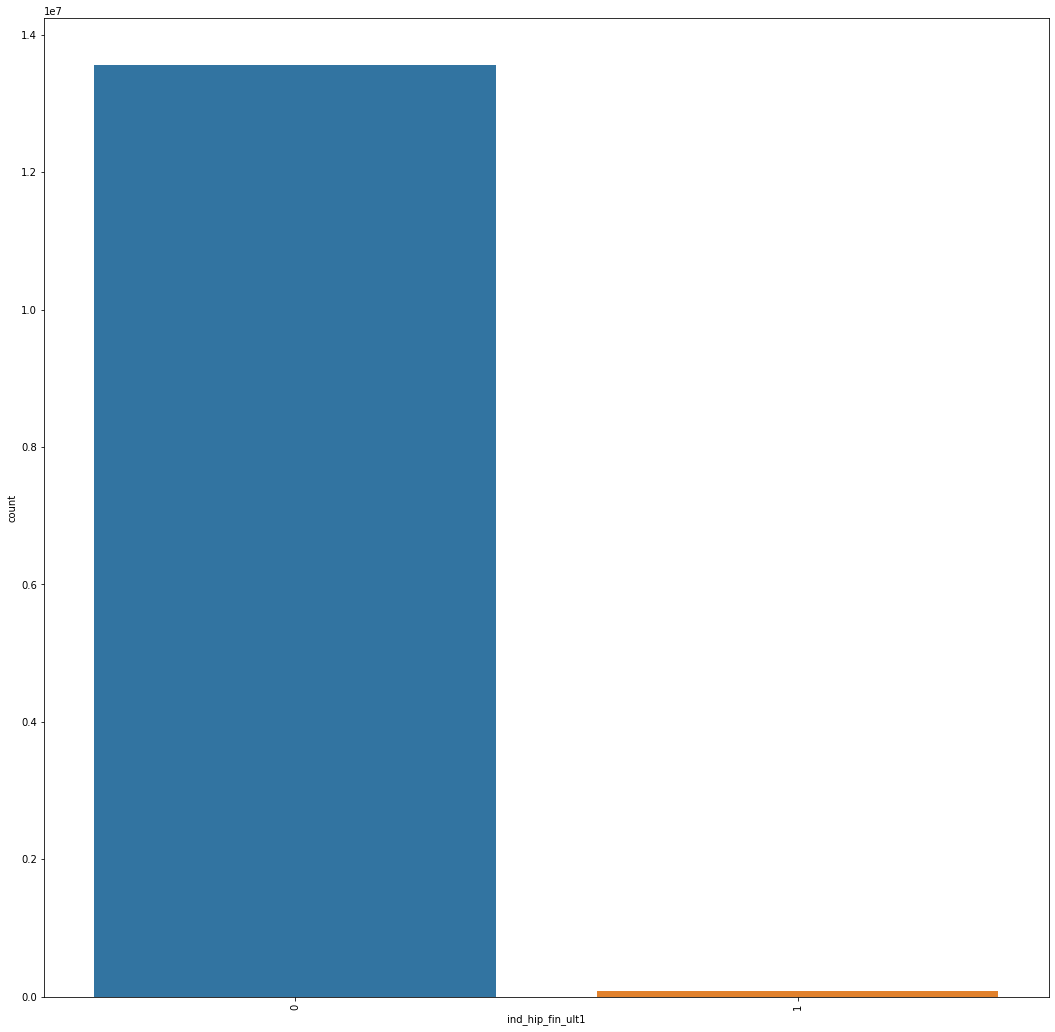

col: ind_plan_fin_ult1


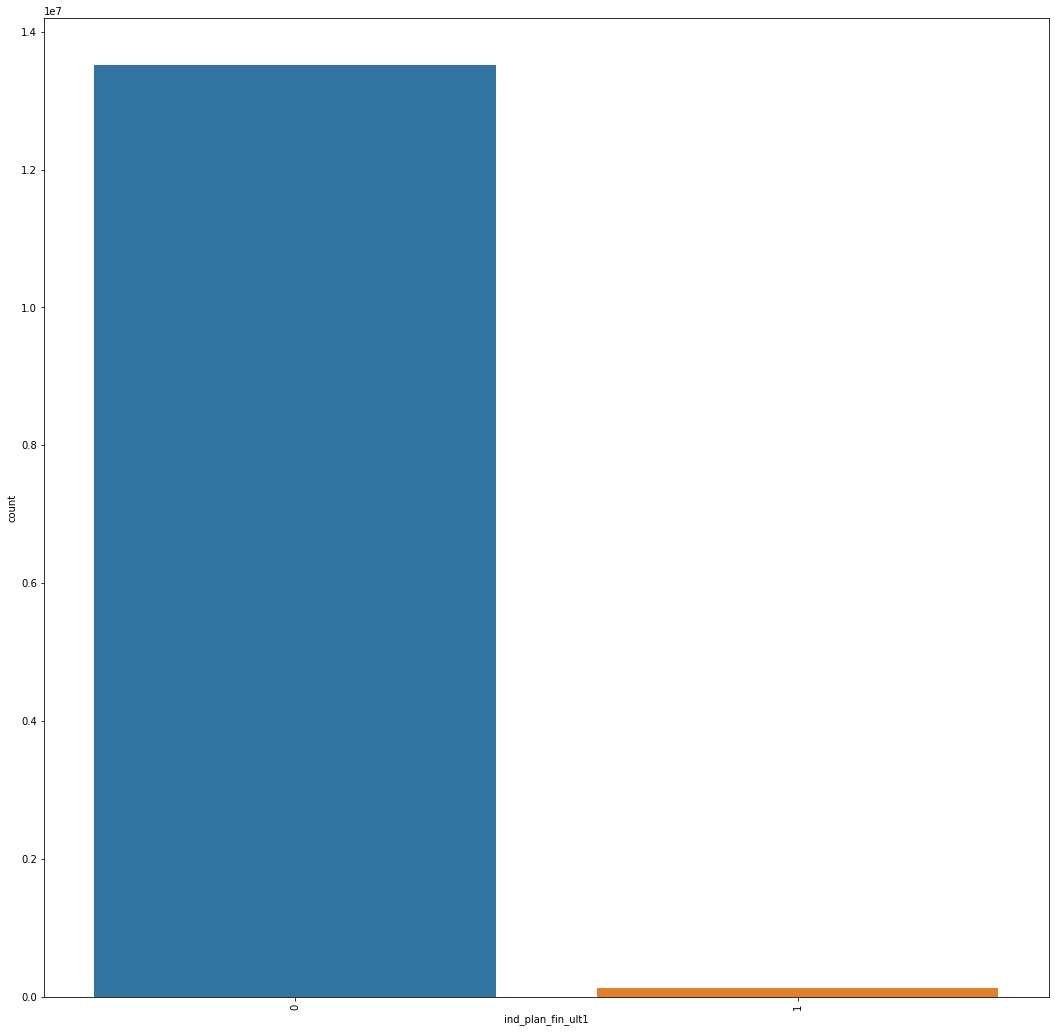

col: ind_pres_fin_ult1


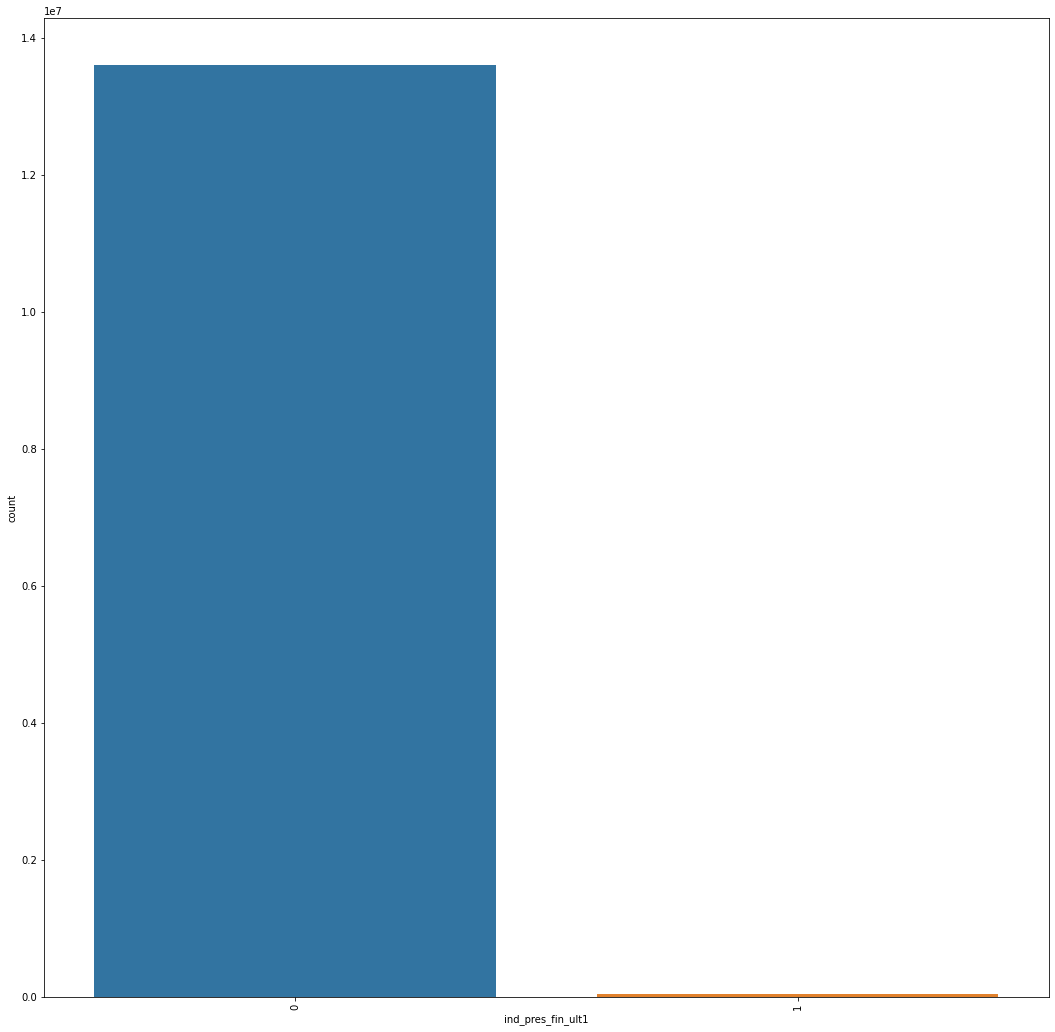

col: ind_reca_fin_ult1


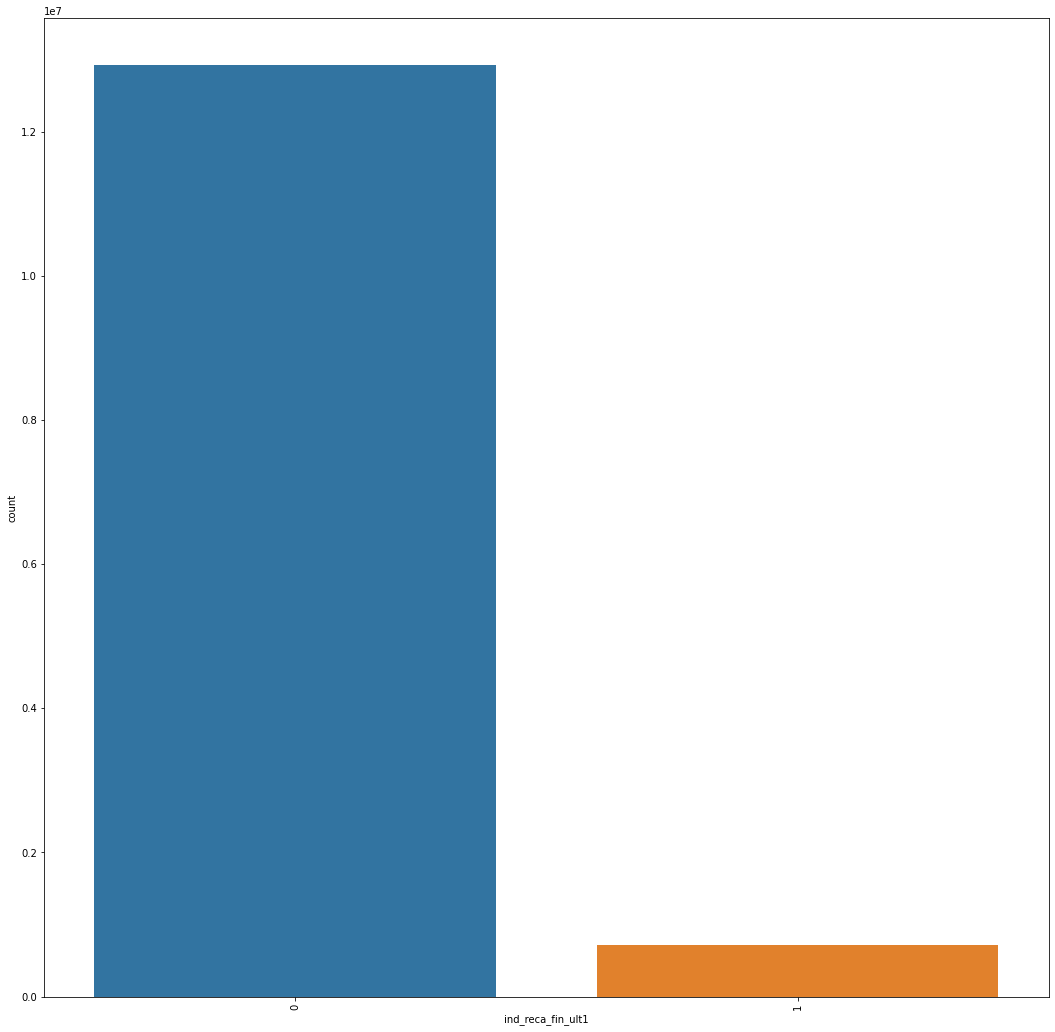

col: ind_tjcr_fin_ult1


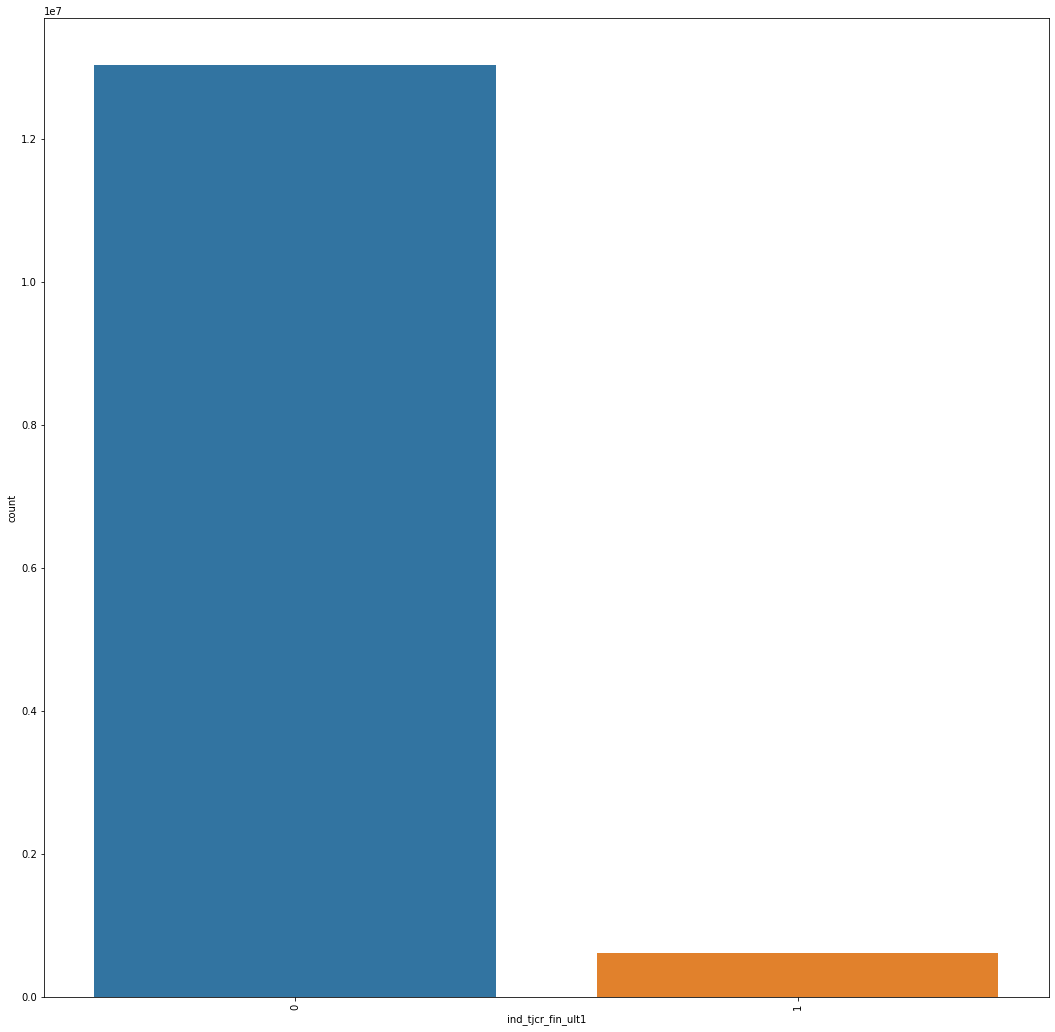

col: ind_valo_fin_ult1


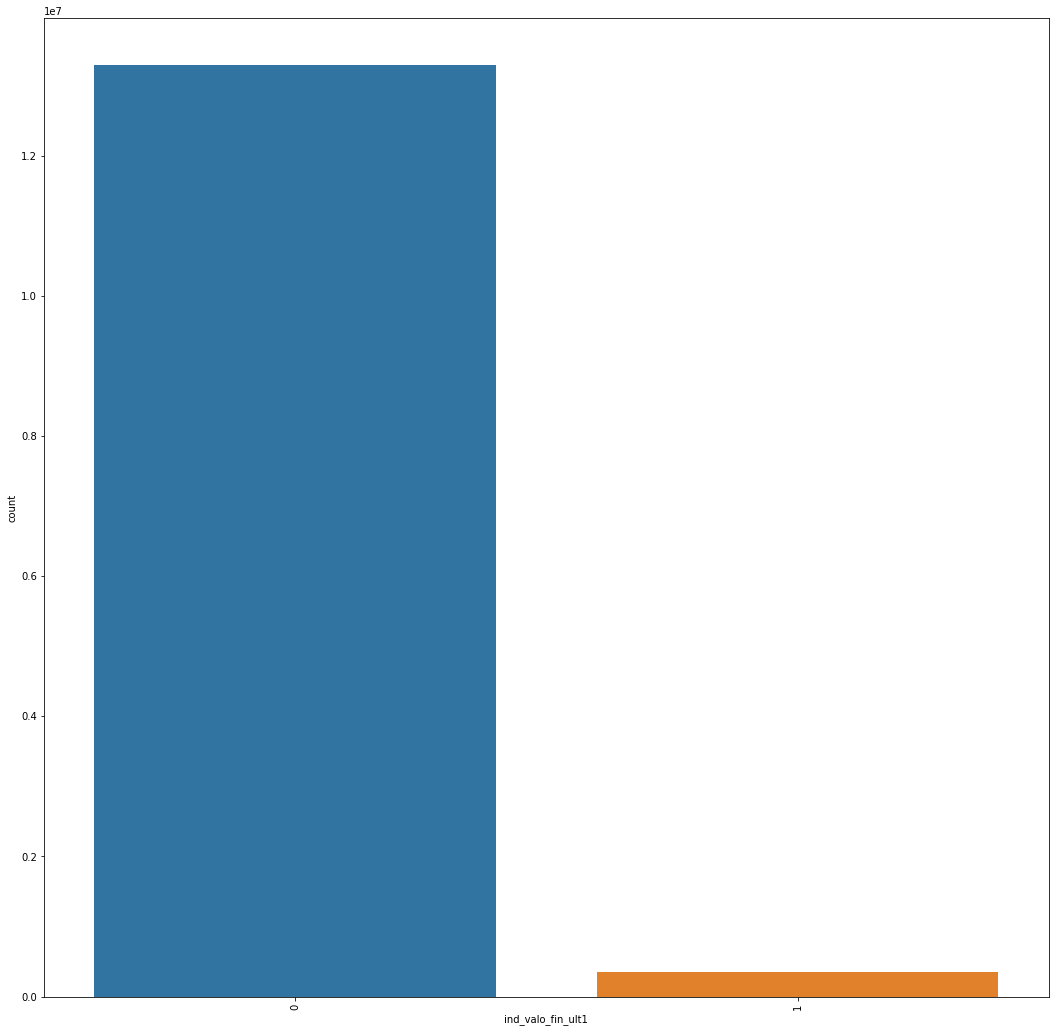

col: ind_viv_fin_ult1


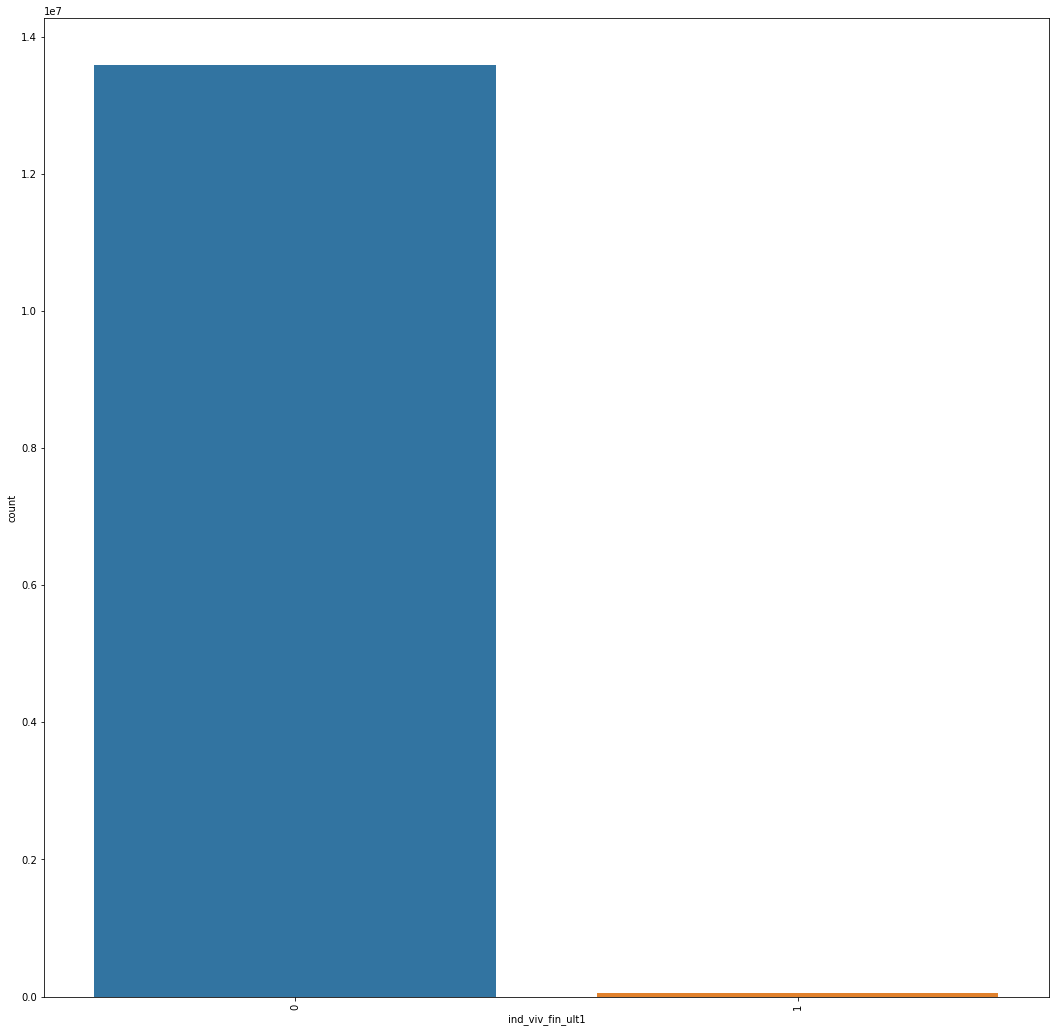

col: ind_nomina_ult1


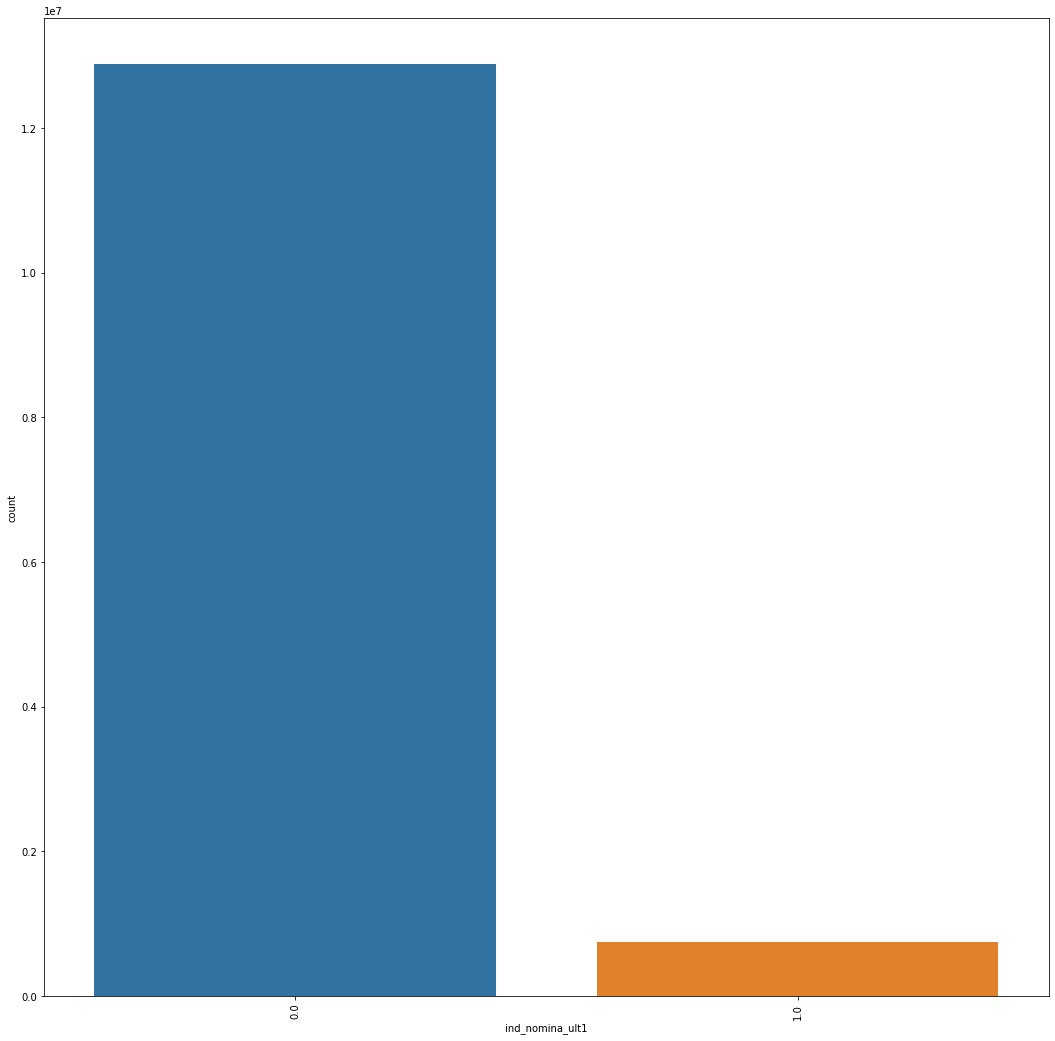

col: ind_nom_pens_ult1


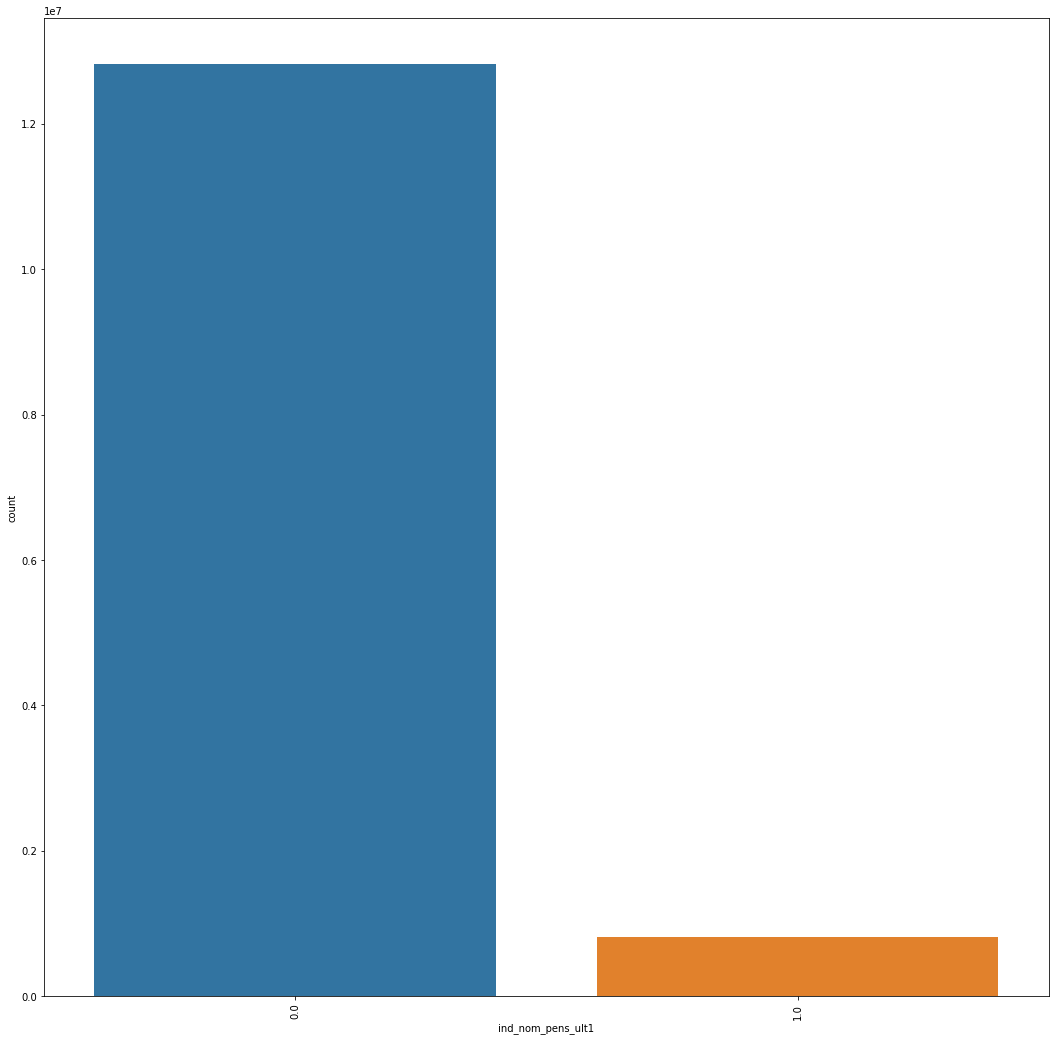

col: ind_recibo_ult1


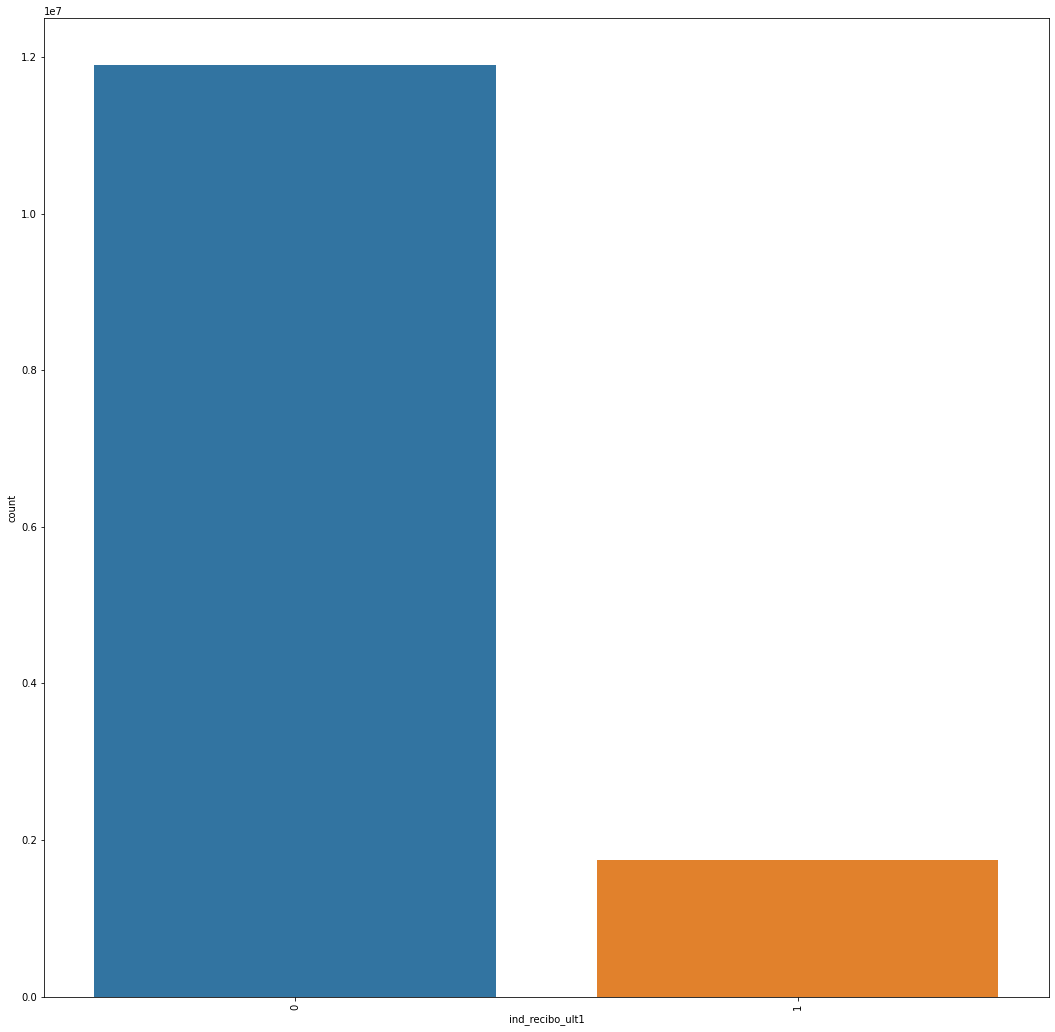

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# 'ncodpers'는 출력이 너무 오래 걸려서 스킵.
skip = ['ncodpers']
for col in df_copy.columns:
    if col in skip:
        continue
        
    print('col:', col)
    f, ax = plt.subplots(figsize=(18, 18))
    sns.countplot(x=col, data=df_copy)
    plt.xticks(rotation=90)
    plt.show()

#fecha_dato  
2015-7-28일부터 매달 고객 데이터가 증가한다  
#ind_empleado  
대부분의 데이터가 N에 치중되어 있어 변수 중요도가 낮아보인다.  
#age  
중간 데이터가 아주 적거나 누락된 것 처럼 보인다  
#antiguedad도 마찬가지  
#indrel  
대부분이 1, 극 소수가 0.99  
#indrel_1mes  
같은 값인데 1.0, 1.0, 1로 나뉘어 따로 표기되는 것 같다. 통일해주자  
#tiprel_1mes  
대부분 값이 A, I에 편중되어 있다.  
#indresi  
대부분 고객의 거주국가와 은행이 위치한 국가 동일하다  
#indext  
대부분의 고객이 태어난 국가와 은행이 위치한 국가가 동일하다. 하지만 전부는 아님.  
#indfall  
대부분의 고객이 살아있다  
#cod_prov  
많은 고객이 거주하는 지역이 몇 군데 있다.  
#ind_actividad_cliente  
고른 분포  
#segmento  
고른 분포  
#tipodom  
모든값이 1이므로 무의미  
#canal_entrada  
대부분의 값이 상위 6개에 들어있다.  



'ind_empleado', 'tipodom' 하나의 변수에 값이 치중되어 있어 학습에 사용하지 못할 것 같아서 삭제

In [20]:
df_copy.drop(['ind_empleado', 'tipodom'], axis=1, inplace=True)

In [37]:
df_copy.columns[:14]

Index(['ncodpers', 'sexo', 'age', 'antiguedad', 'indrel', 'indrel_1mes',
       'tiprel_1mes', 'indresi', 'indext', 'canal_entrada', 'indfall',
       'cod_prov', 'ind_actividad_cliente', 'segmento'],
      dtype='object')

fecha_dato에 저장된 문자열 데이터를 판다스 Timestamp로 변환하고 날짜별 상품 판매 추이를 살펴보자

In [24]:
df_copy['fecha_dato'] =  pd.to_datetime(df_copy['fecha_dato'])

In [25]:
df_copy['fecha_dato'].head()

0   2015-01-28
1   2015-01-28
2   2015-01-28
3   2015-01-28
4   2015-01-28
Name: fecha_dato, dtype: datetime64[ns]

fecha_dato열을 df_copy의 행 인덱스로 설정

In [28]:
df_copy.set_index('fecha_dato', inplace=True)

In [41]:
df_copy.columns

Index(['ncodpers', 'sexo', 'age', 'antiguedad', 'indrel', 'indrel_1mes',
       'tiprel_1mes', 'indresi', 'indext', 'canal_entrada', 'indfall',
       'cod_prov', 'ind_actividad_cliente', 'segmento', 'ind_ahor_fin_ult1',
       'ind_aval_fin_ult1', 'ind_cco_fin_ult1', 'ind_cder_fin_ult1',
       'ind_cno_fin_ult1', 'ind_ctju_fin_ult1', 'ind_ctma_fin_ult1',
       'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1',
       'ind_deme_fin_ult1', 'ind_dela_fin_ult1', 'ind_ecue_fin_ult1',
       'ind_fond_fin_ult1', 'ind_hip_fin_ult1', 'ind_plan_fin_ult1',
       'ind_pres_fin_ult1', 'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1',
       'ind_valo_fin_ult1', 'ind_viv_fin_ult1', 'ind_nomina_ult1',
       'ind_nom_pens_ult1', 'ind_recibo_ult1'],
      dtype='object')

In [48]:
df_copy.head()

,ncodpers,sexo,age,antiguedad,indrel,indrel_1mes,tiprel_1mes,indresi,indext,canal_entrada,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
fecha_dato,,,,,,,,,,,,,,,,,,,,,
2015-01-28,1375586,H,35,6,1.0,1,A,S,N,KHL,...,0,0,0,0,0,0,0,0.0,0.0,0
2015-01-28,1050611,V,23,35,1.0,1,I,S,S,KHE,...,0,0,0,0,0,0,0,0.0,0.0,0
2015-01-28,1050612,V,23,35,1.0,1,I,S,N,KHE,...,0,0,0,0,0,0,0,0.0,0.0,0
2015-01-28,1050613,H,22,35,1.0,1,I,S,N,KHD,...,0,0,0,0,0,0,0,0.0,0.0,0
2015-01-28,1050614,V,23,35,1.0,1,A,S,N,KHE,...,0,0,0,0,0,0,0,0.0,0.0,0


In [67]:
df_group = df_copy.iloc[:, 14:].groupby(['fecha_dato']).count()

In [69]:
df_group.head()

,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
fecha_dato,,,,,,,,,,,,,,,,,,,,,
2015-01-28,625457,625457,625457,625457,625457,625457,625457,625457,625457,625457,...,625457,625457,625457,625457,625457,625457,625457,622346,622346,625457
2015-02-28,627394,627394,627394,627394,627394,627394,627394,627394,627394,627394,...,627394,627394,627394,627394,627394,627394,627394,624546,624546,627394
2015-03-28,629209,629209,629209,629209,629209,629209,629209,629209,629209,629209,...,629209,629209,629209,629209,629209,629209,629209,626469,626469,629209
2015-04-28,630367,630367,630367,630367,630367,630367,630367,630367,630367,630367,...,630367,630367,630367,630367,630367,630367,630367,627634,627634,630367
2015-05-28,631957,631957,631957,631957,631957,631957,631957,631957,631957,631957,...,631957,631957,631957,631957,631957,631957,631957,629152,629152,631957


col: ind_ahor_fin_ult1


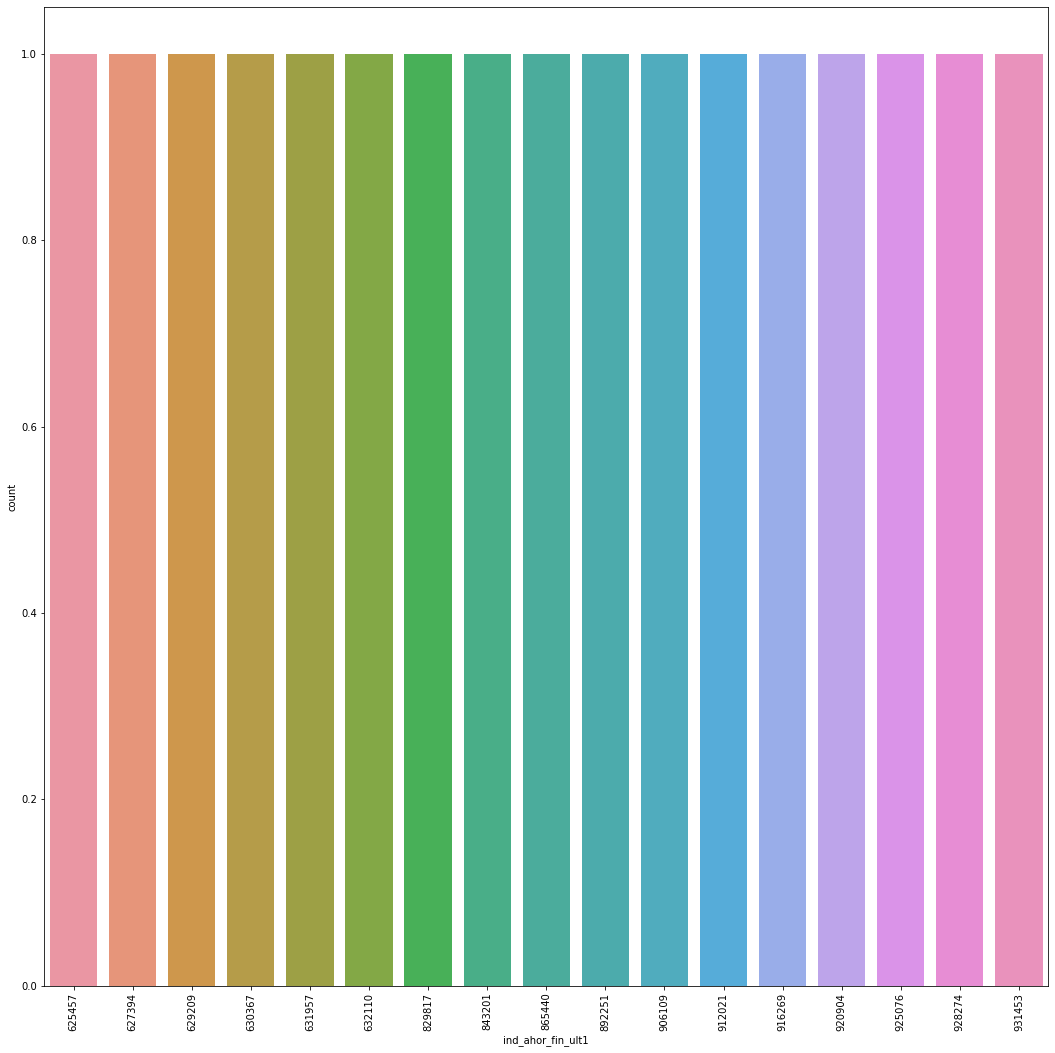

col: ind_aval_fin_ult1


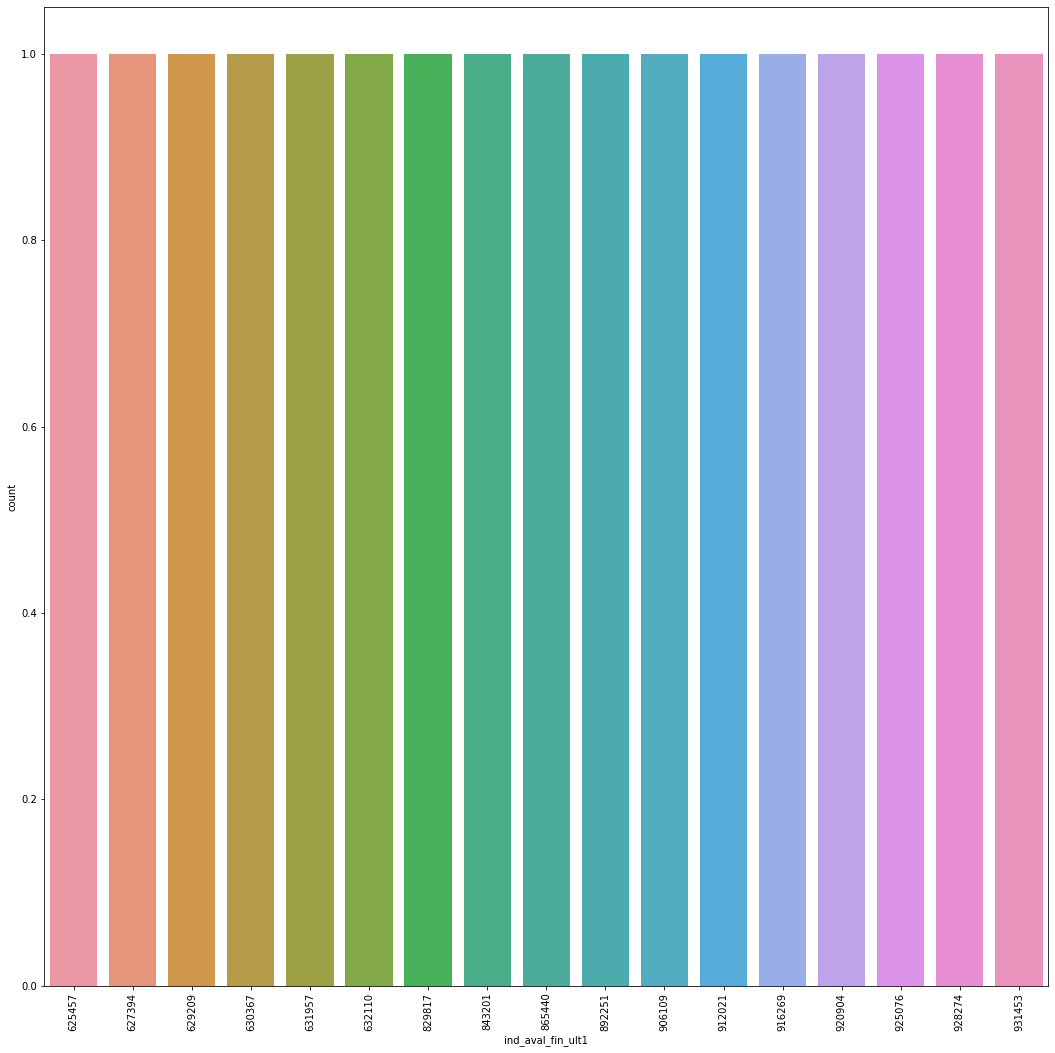

col: ind_cco_fin_ult1


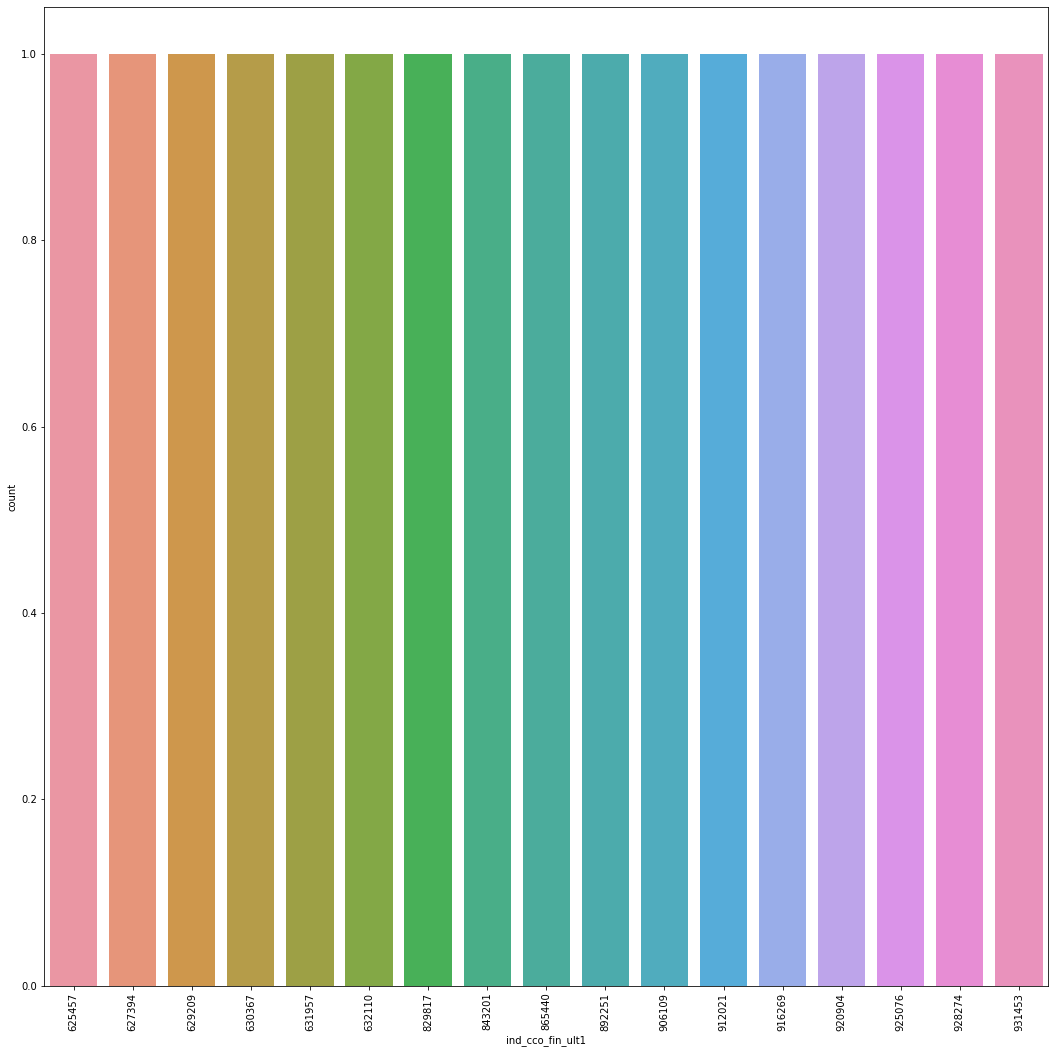

col: ind_cder_fin_ult1


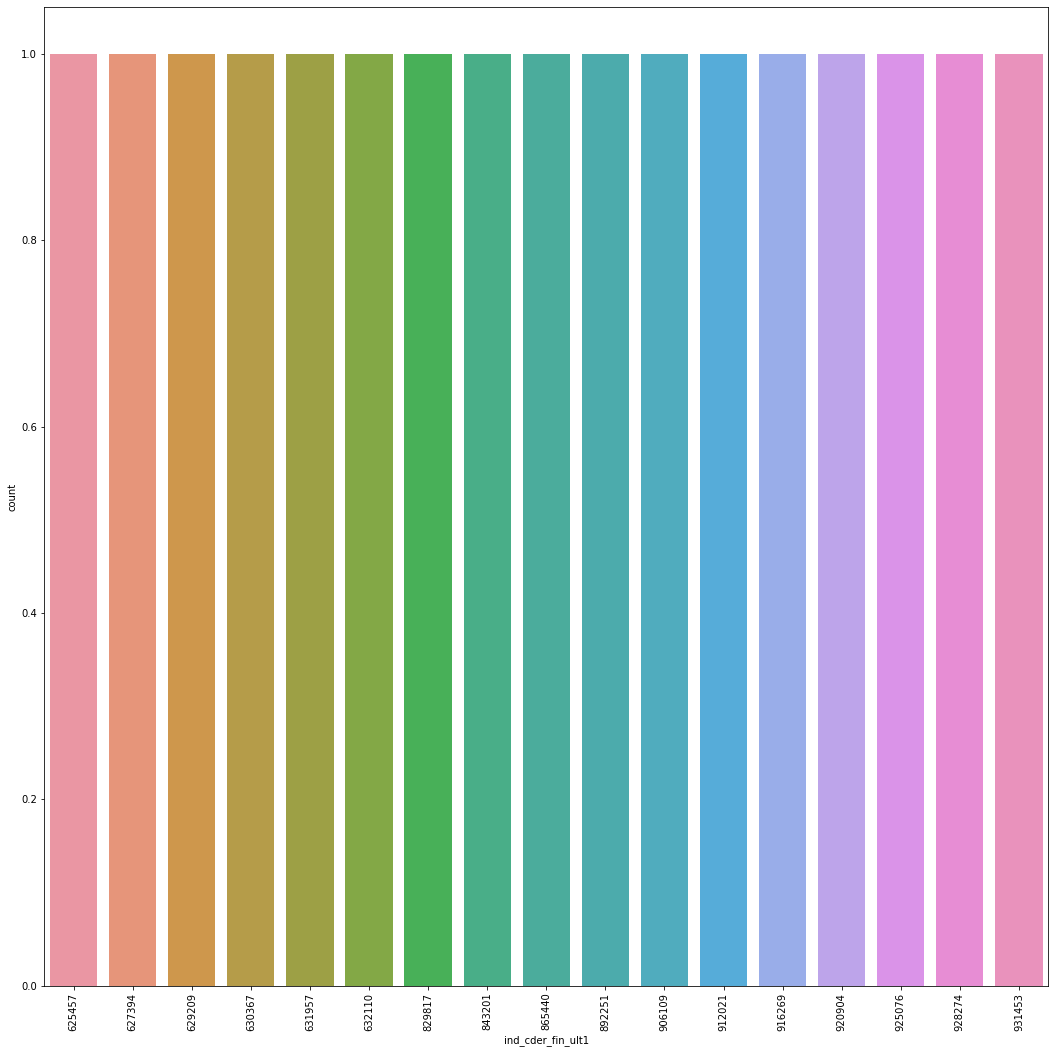

col: ind_cno_fin_ult1


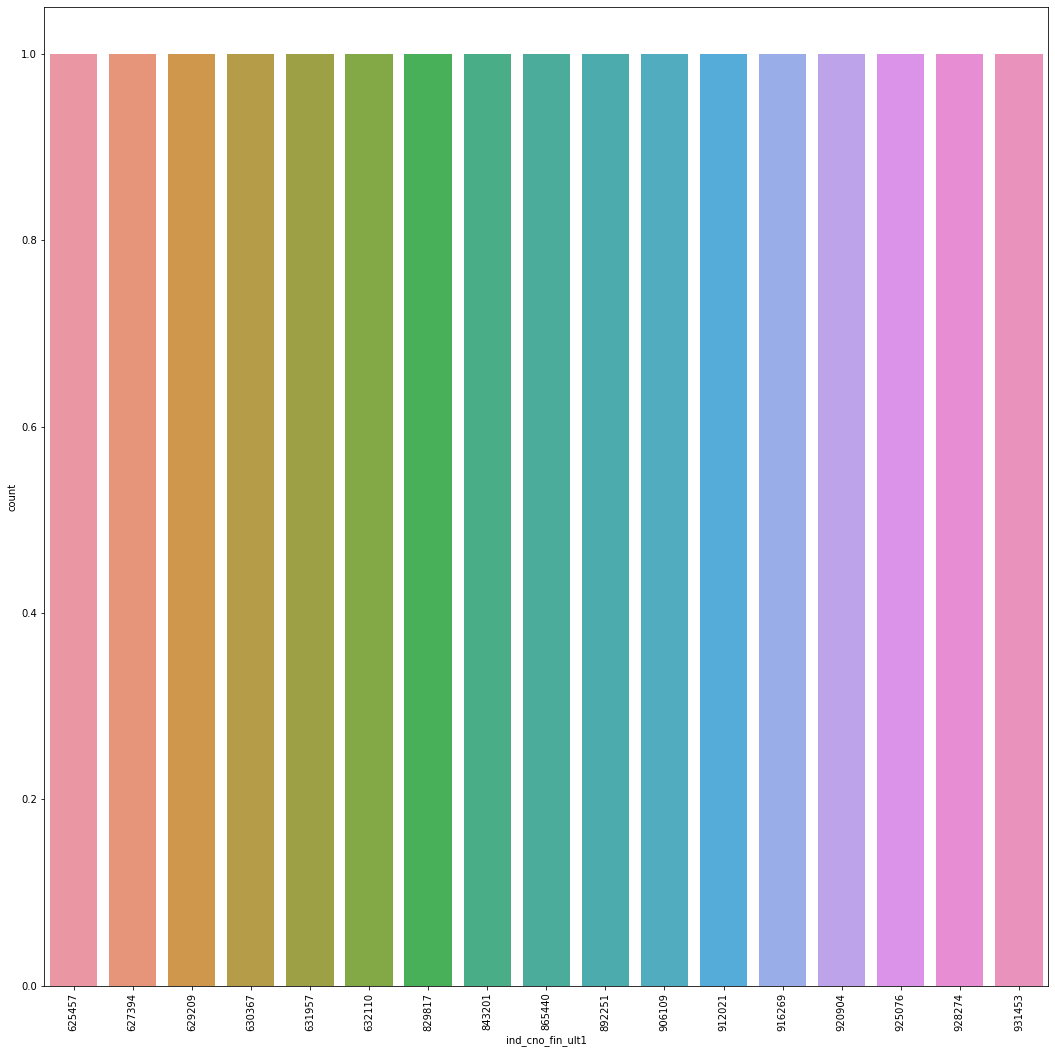

col: ind_ctju_fin_ult1


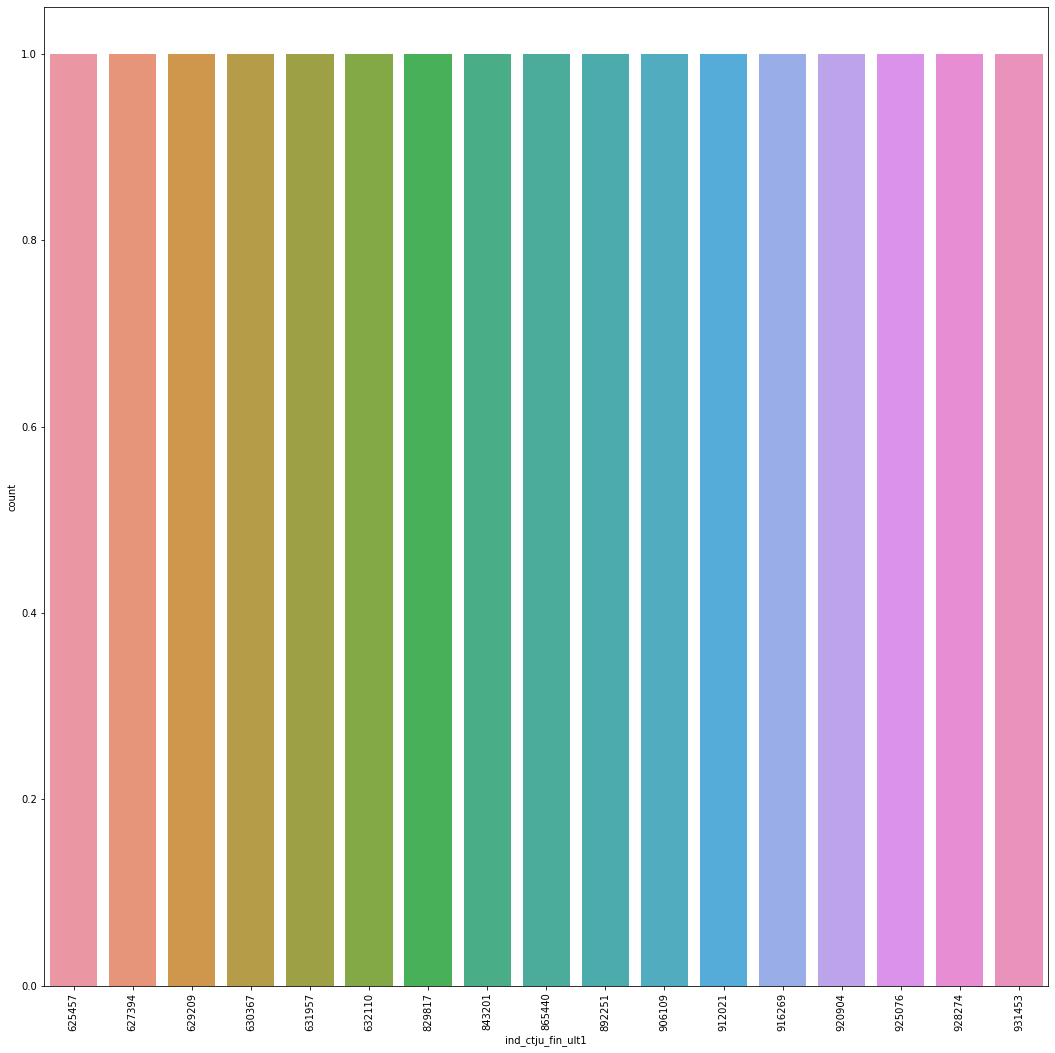

col: ind_ctma_fin_ult1


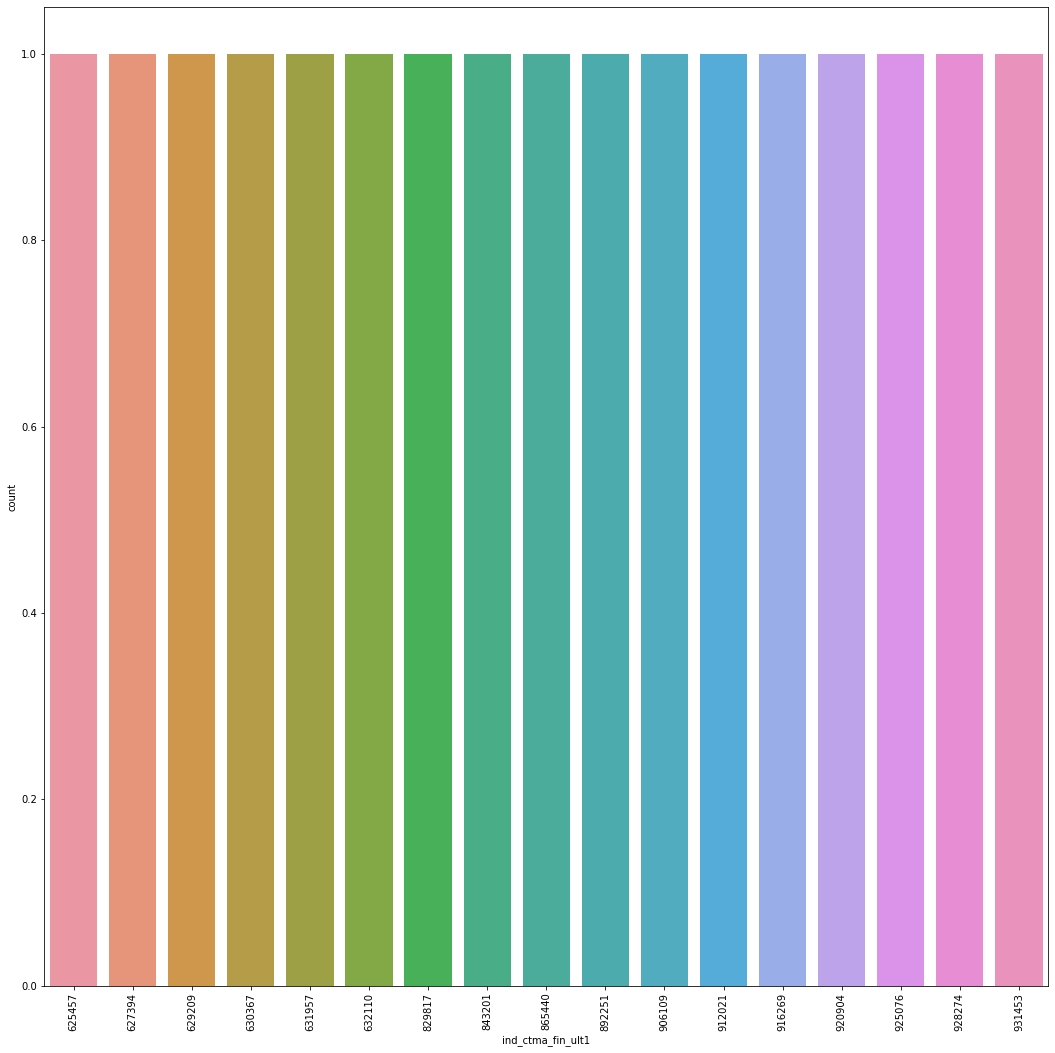

col: ind_ctop_fin_ult1


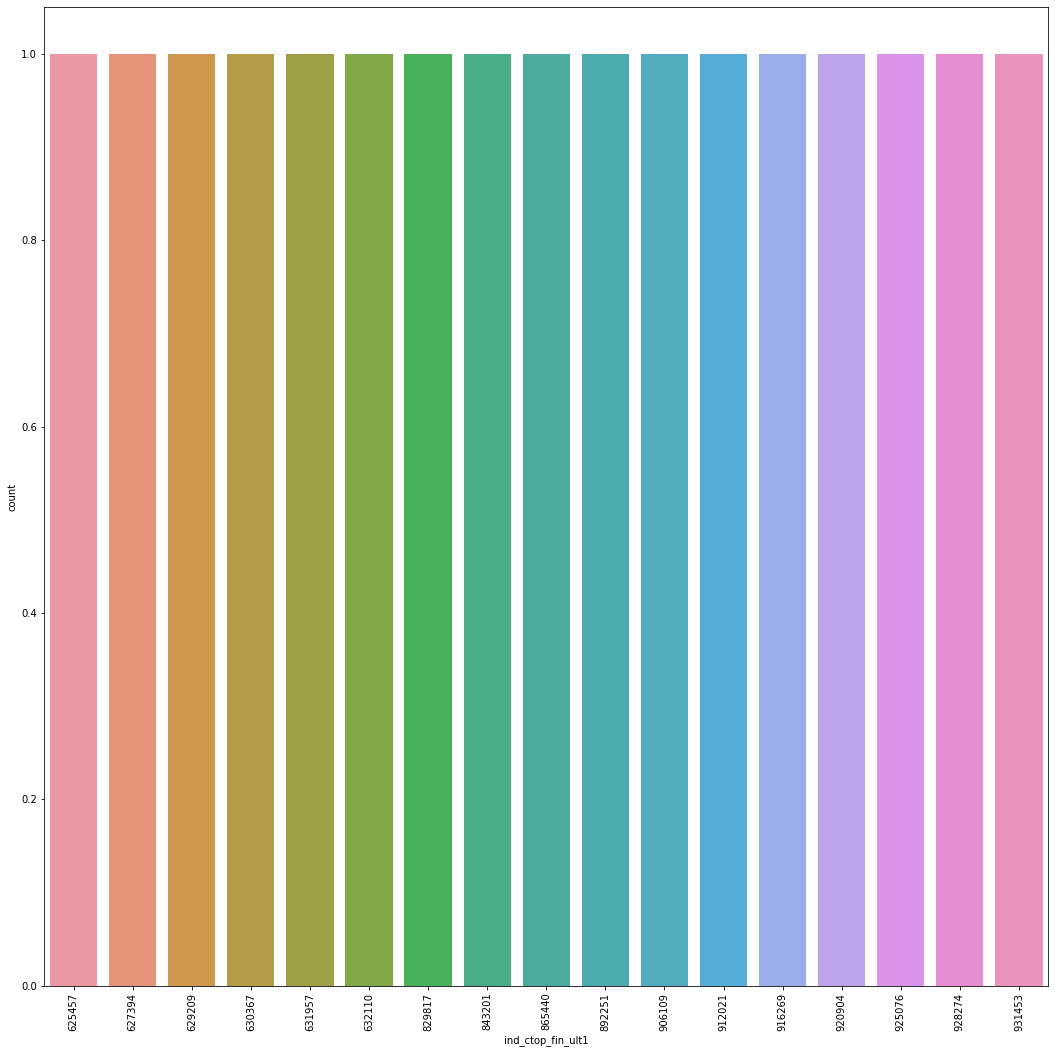

col: ind_ctpp_fin_ult1


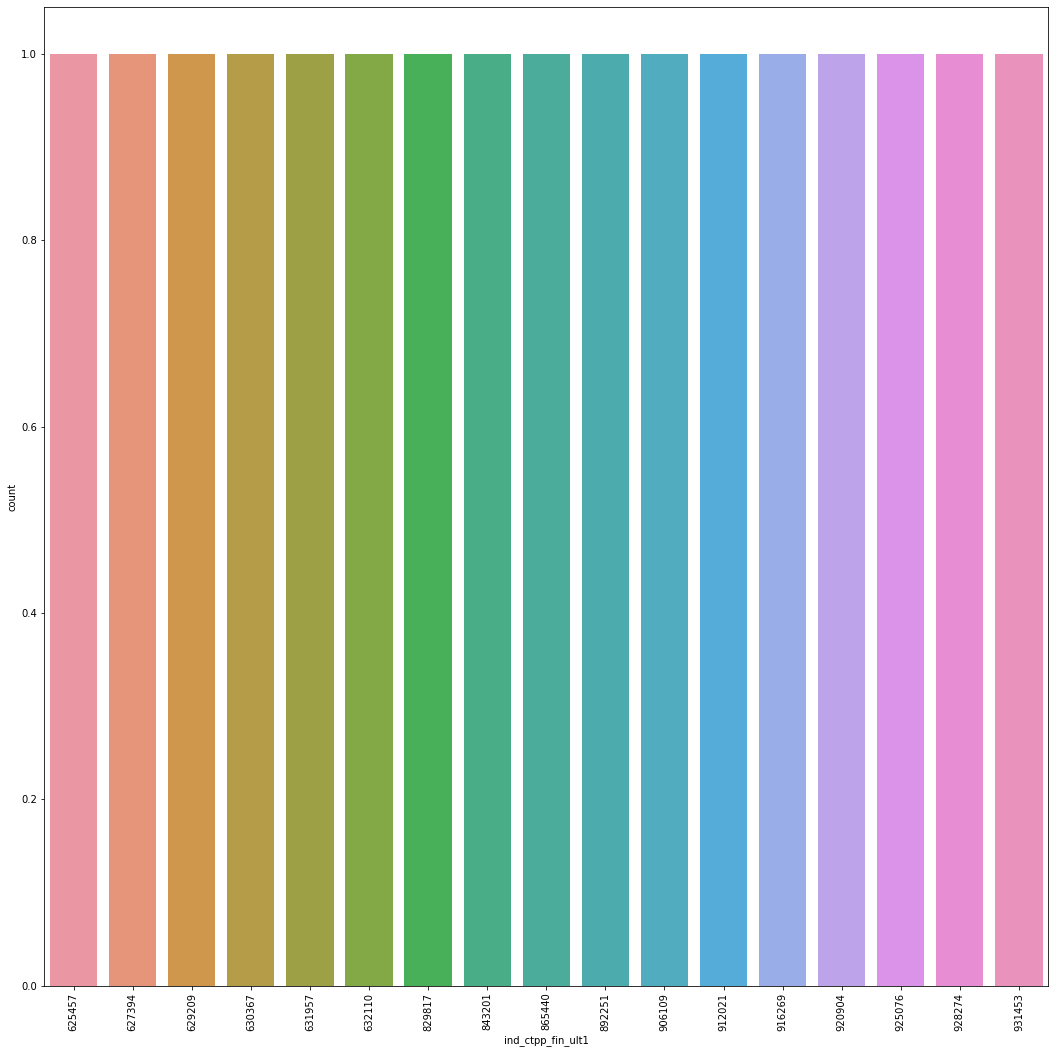

col: ind_deco_fin_ult1


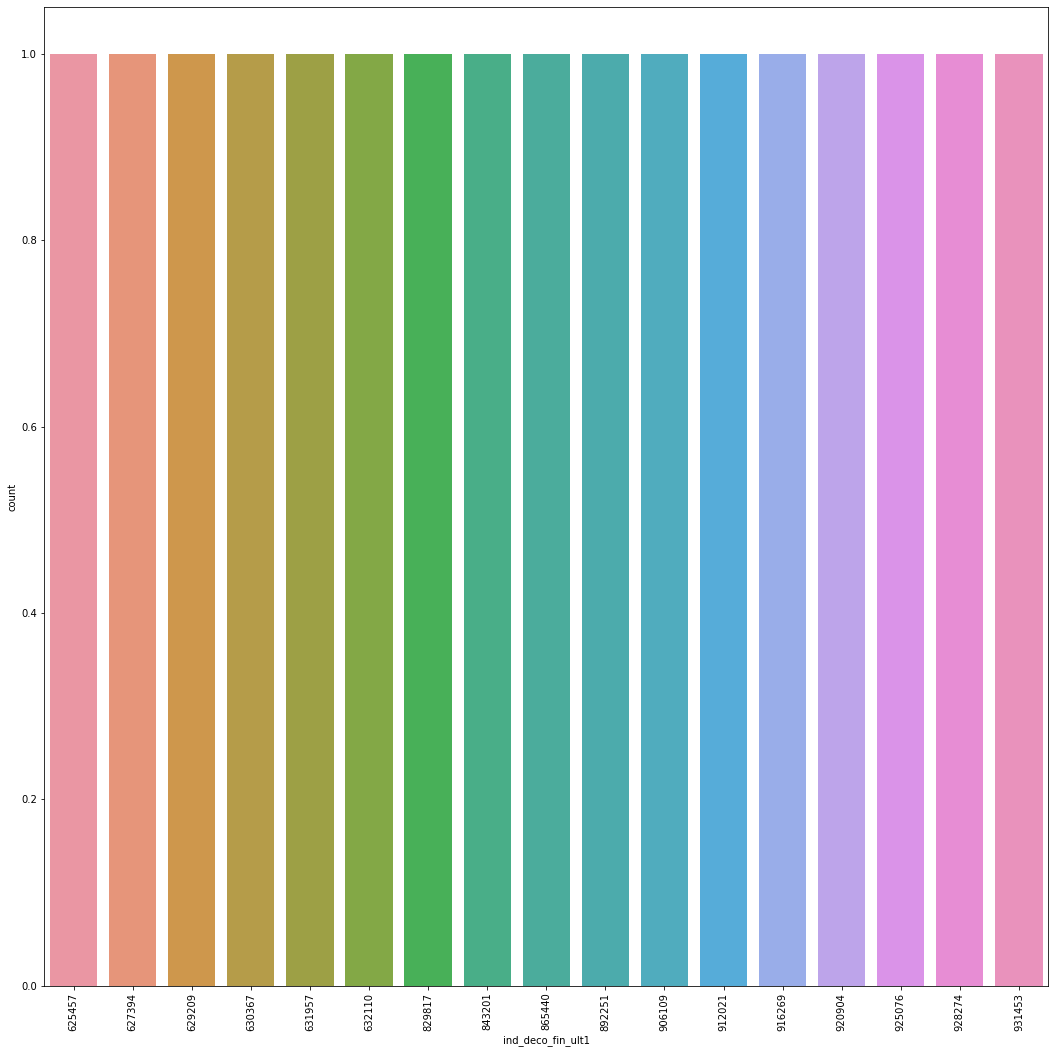

col: ind_deme_fin_ult1


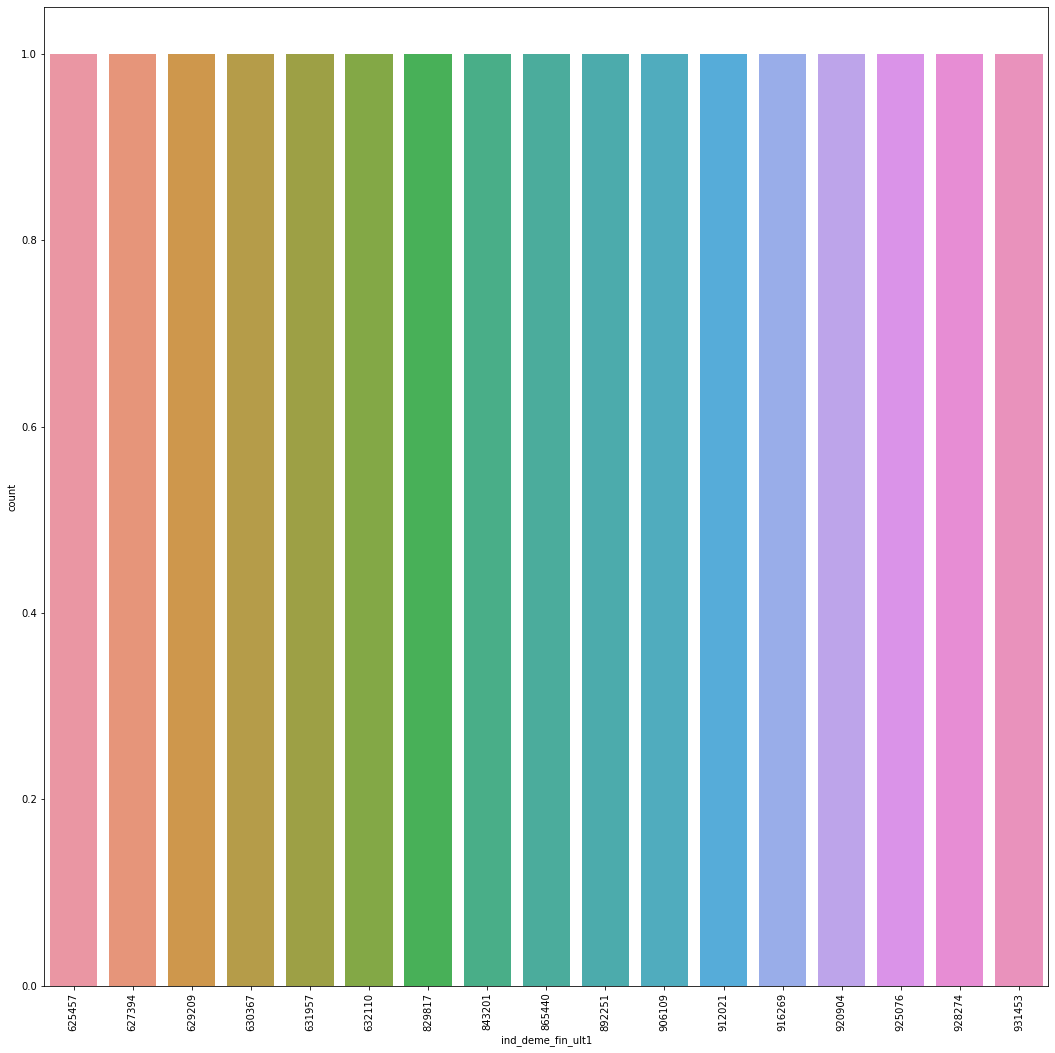

col: ind_dela_fin_ult1


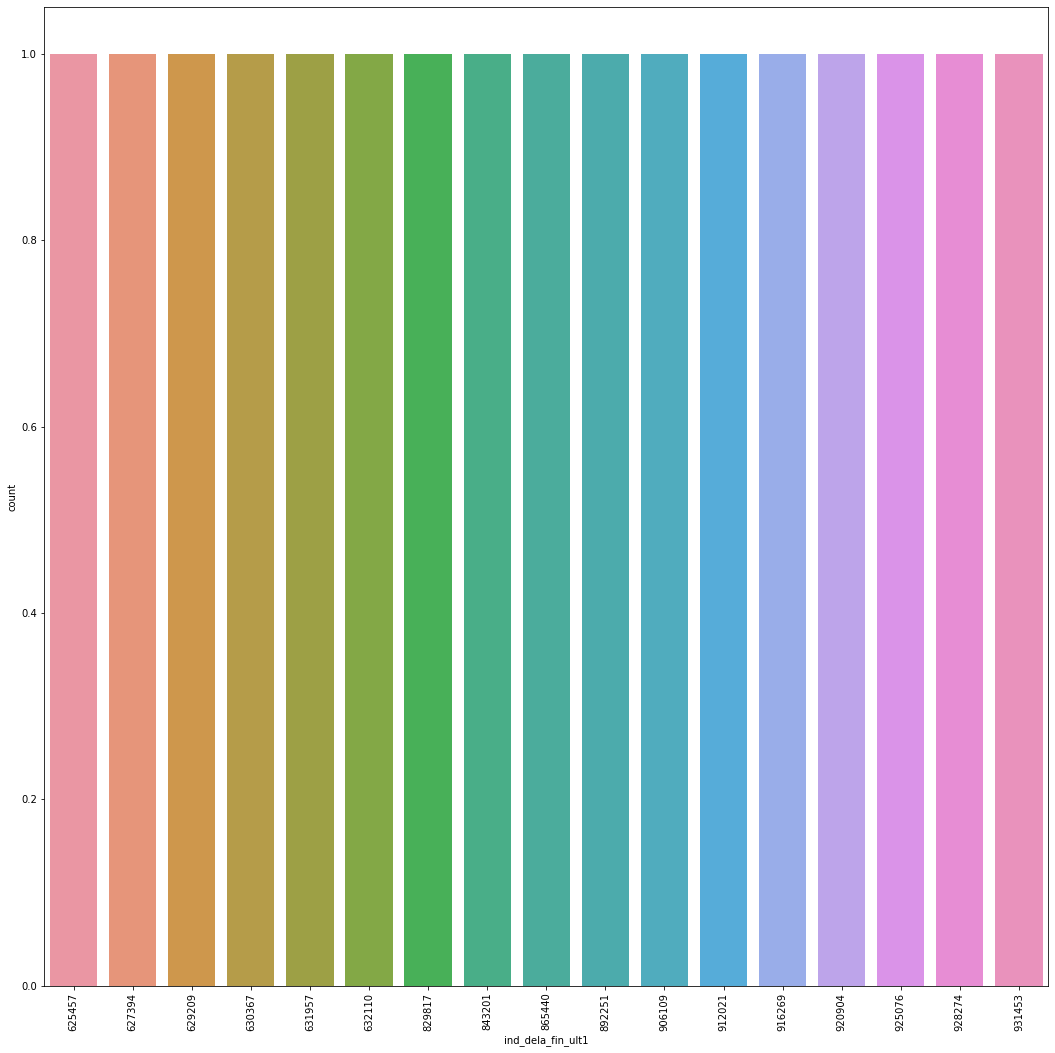

col: ind_ecue_fin_ult1


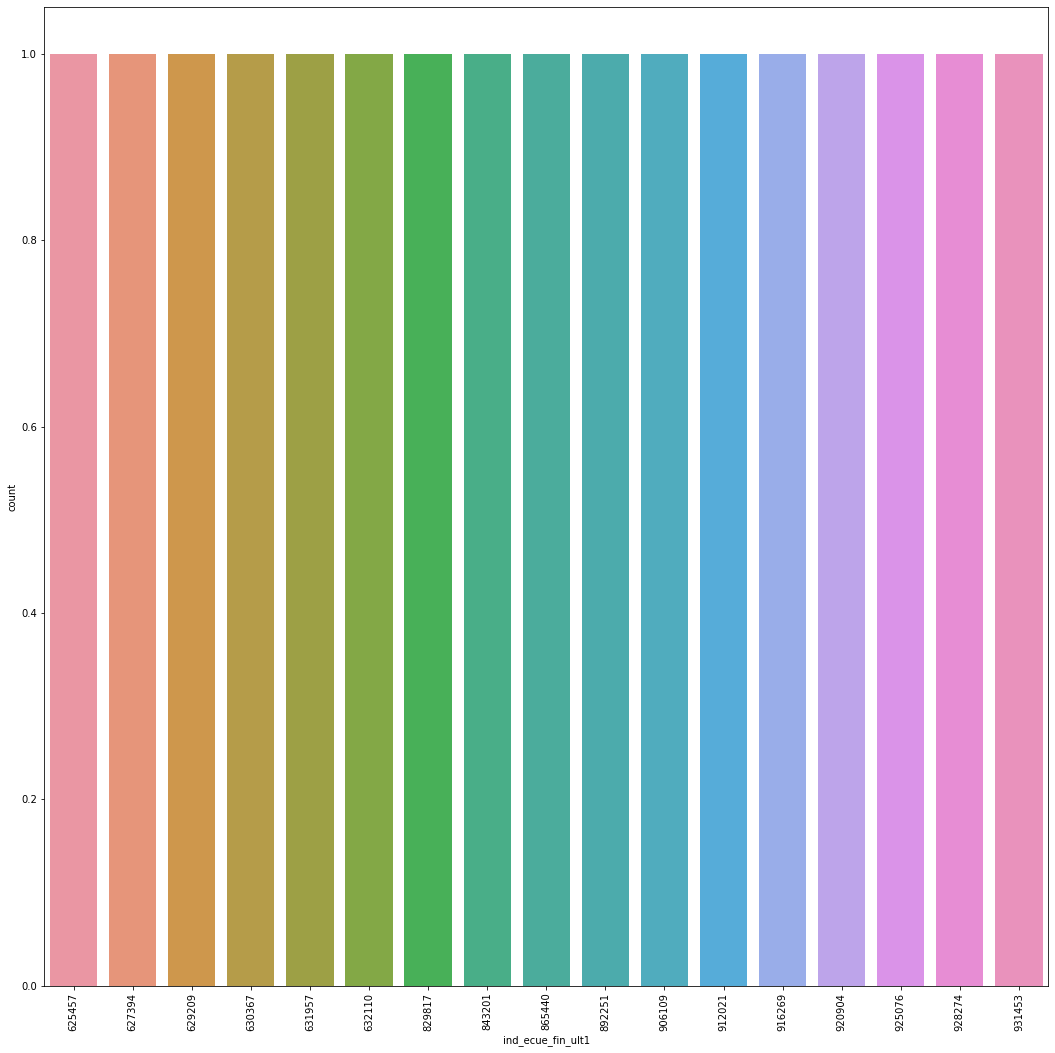

col: ind_fond_fin_ult1


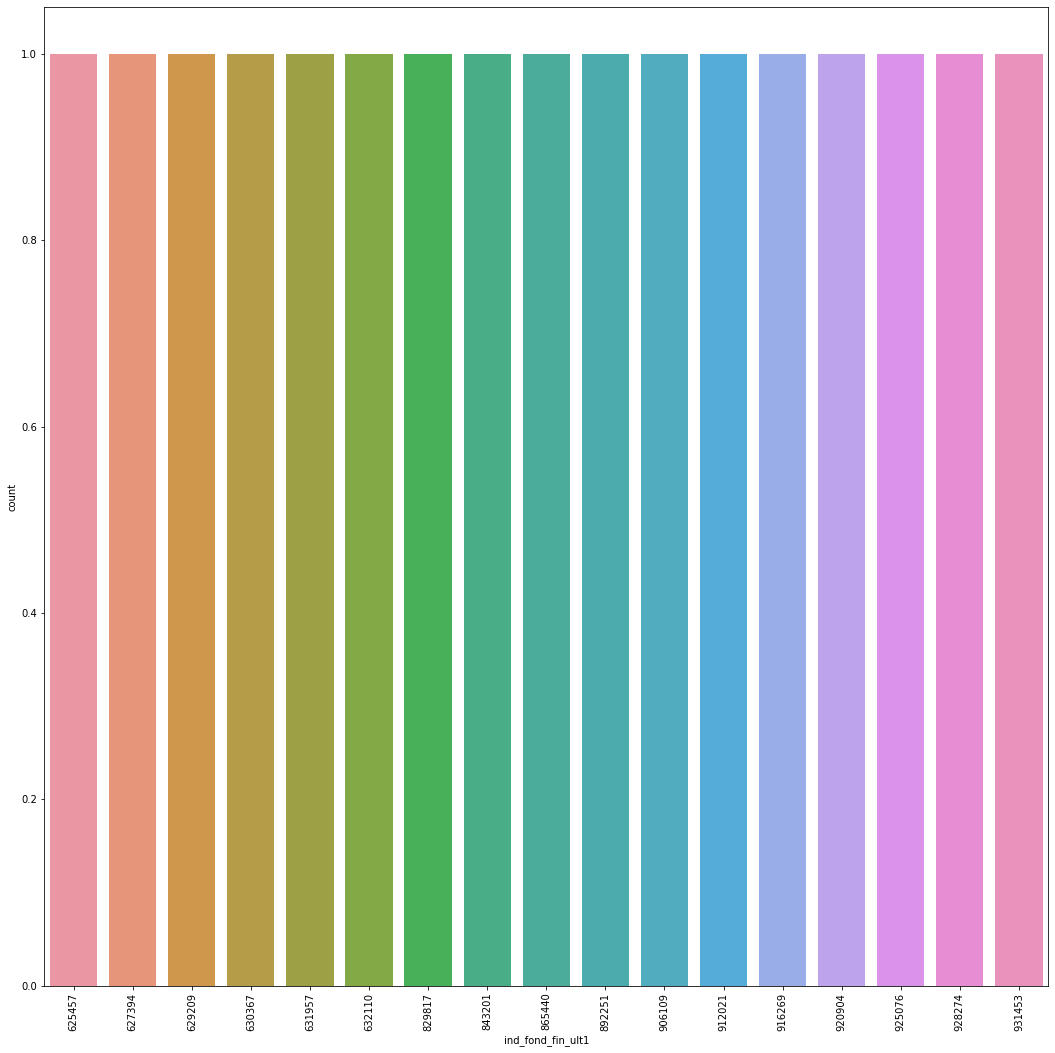

col: ind_hip_fin_ult1


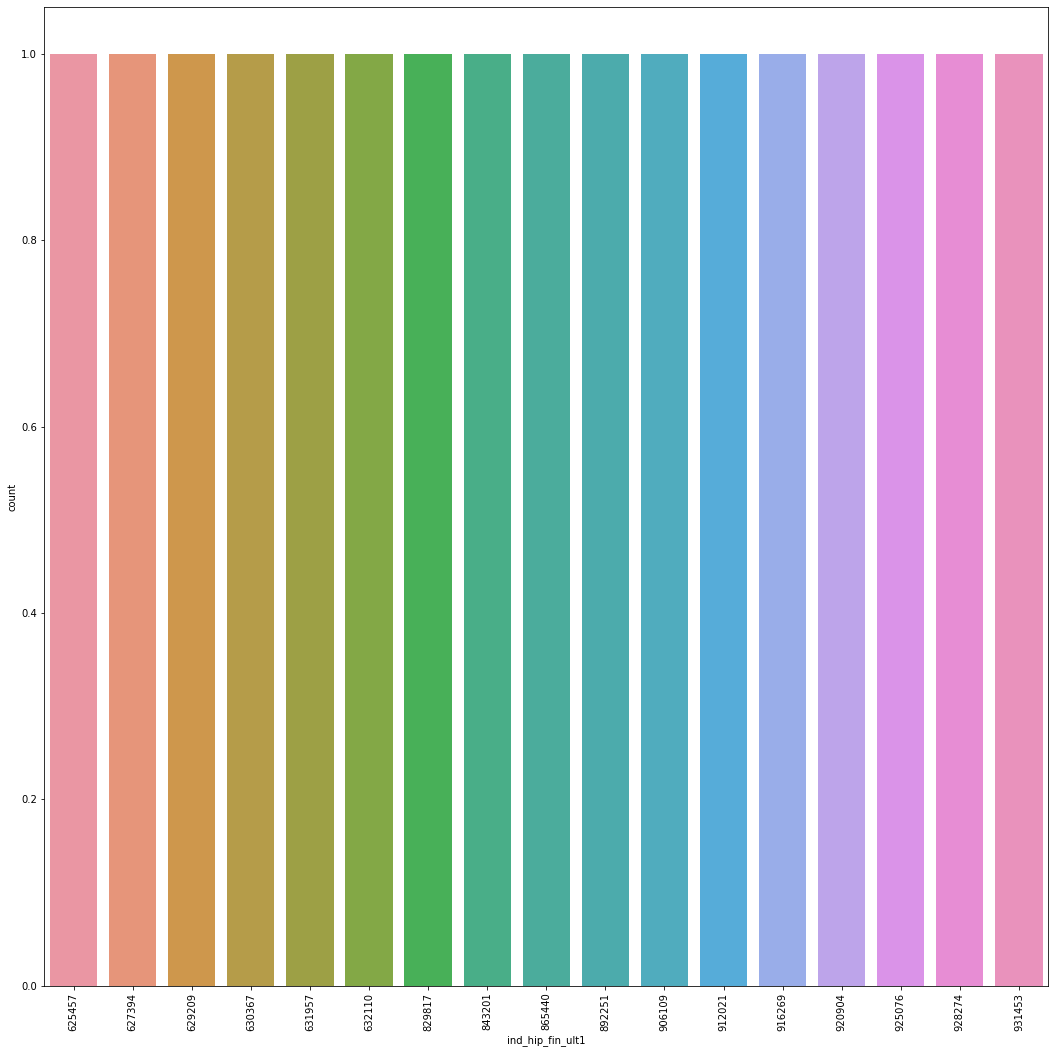

col: ind_plan_fin_ult1


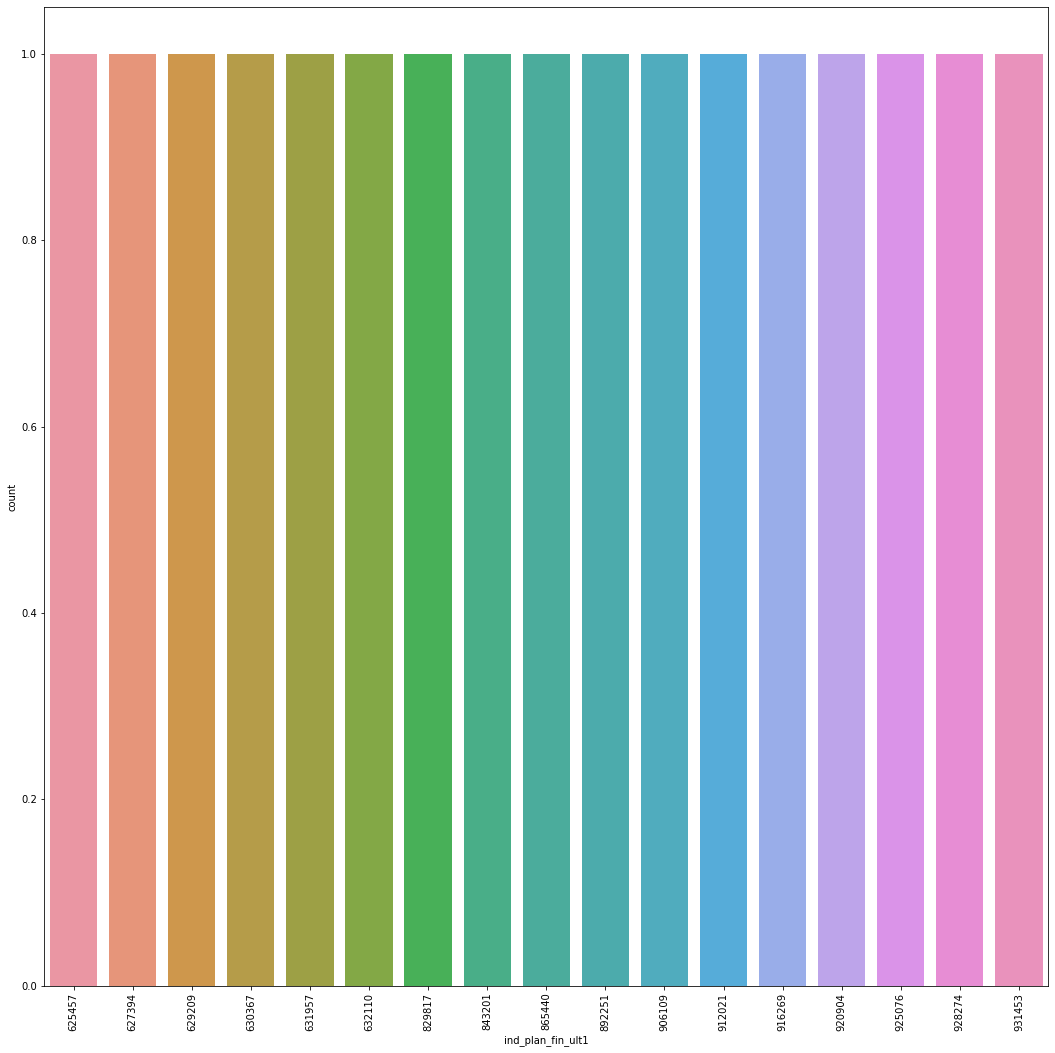

col: ind_pres_fin_ult1


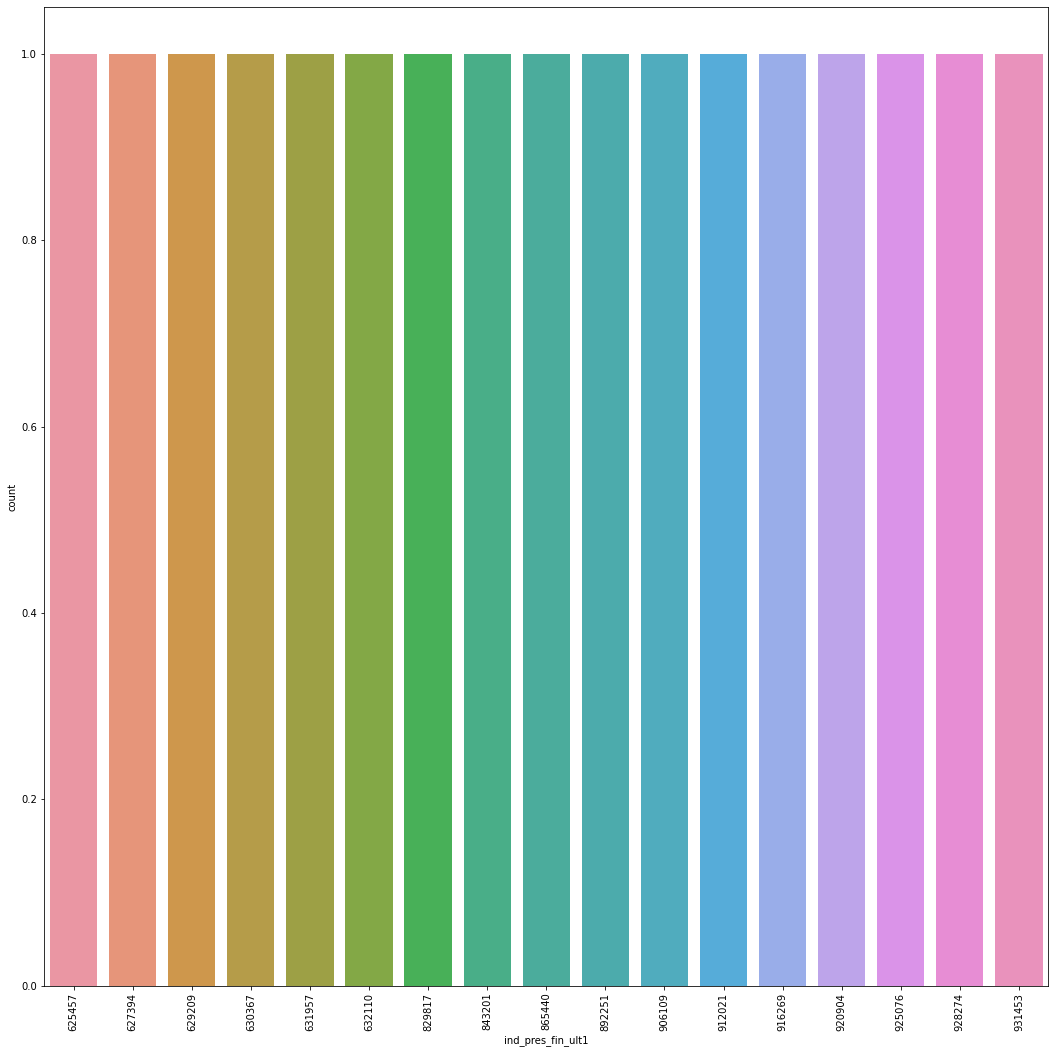

col: ind_reca_fin_ult1


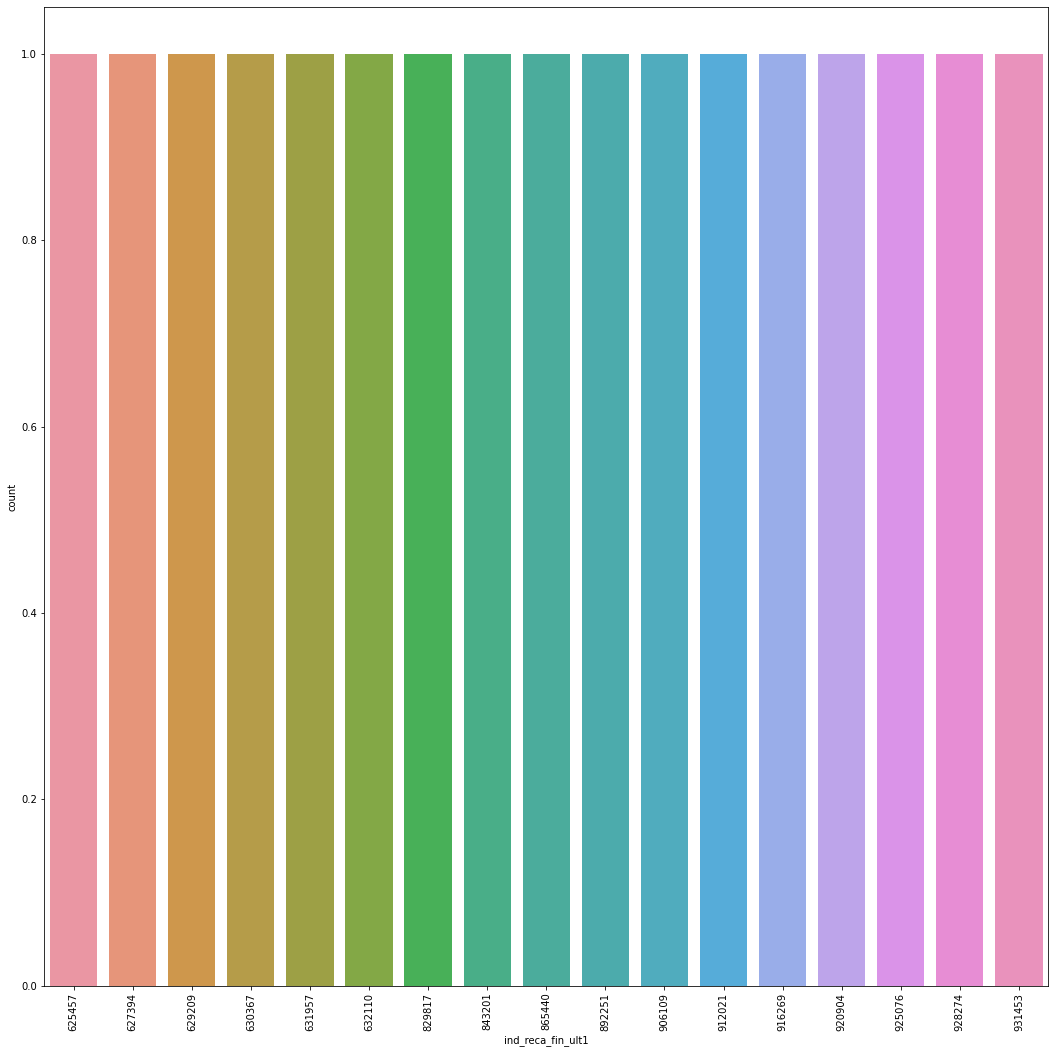

col: ind_tjcr_fin_ult1


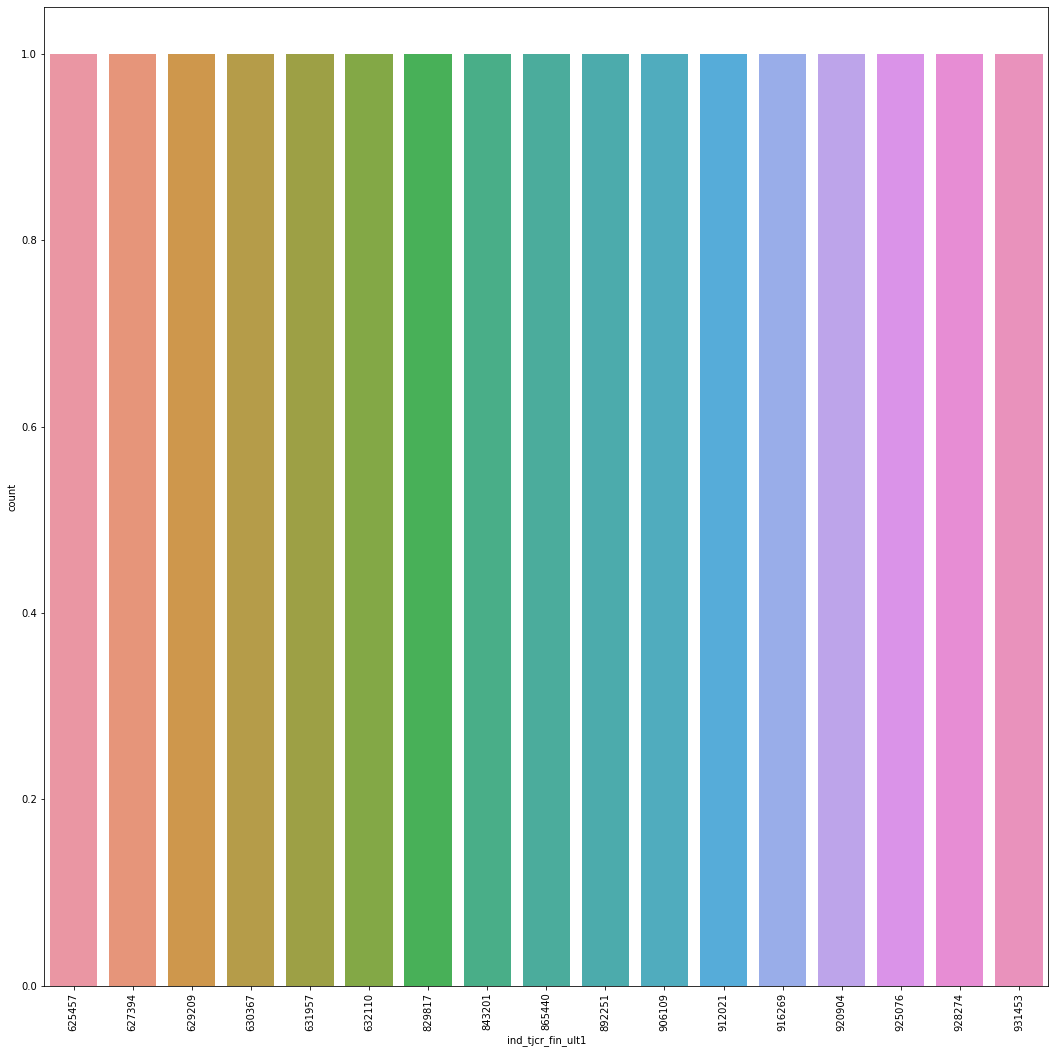

col: ind_valo_fin_ult1


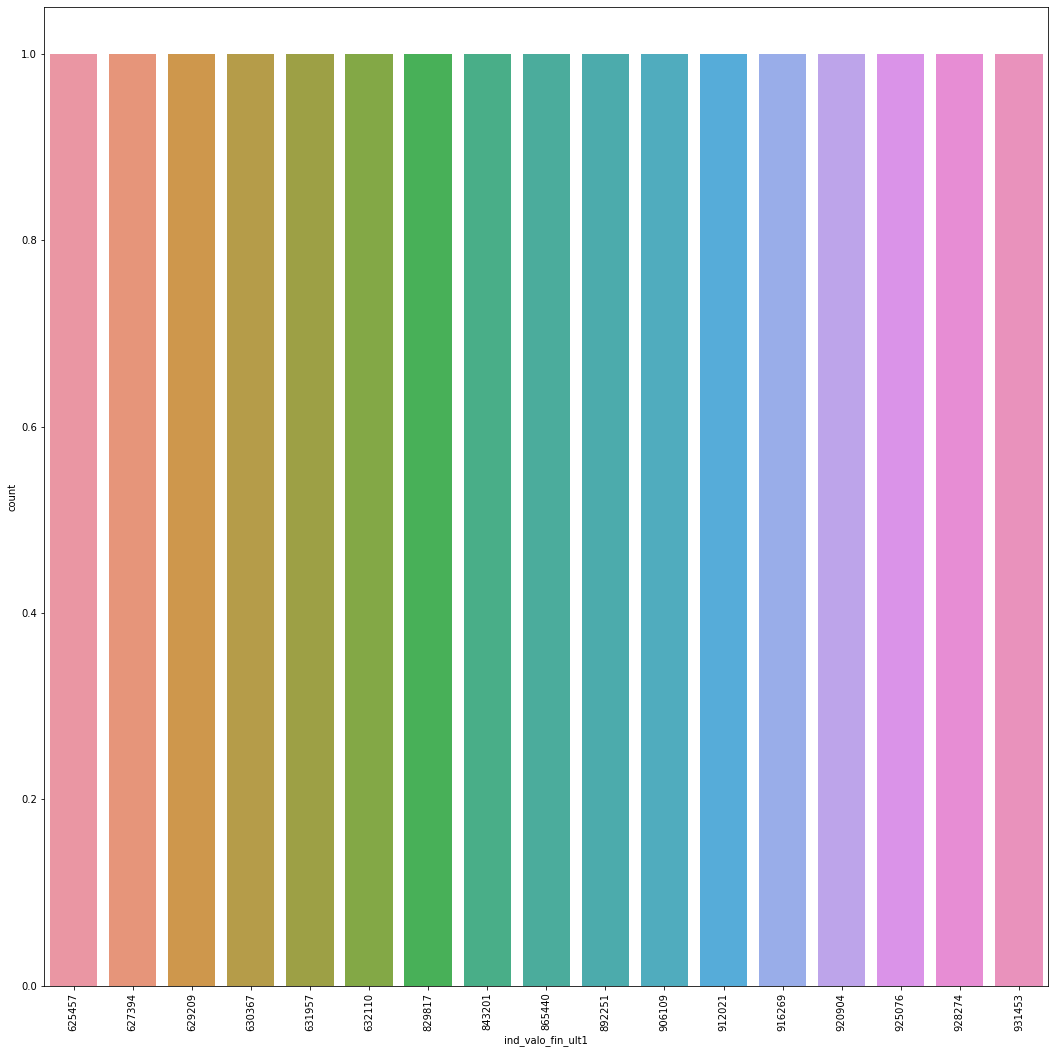

col: ind_viv_fin_ult1


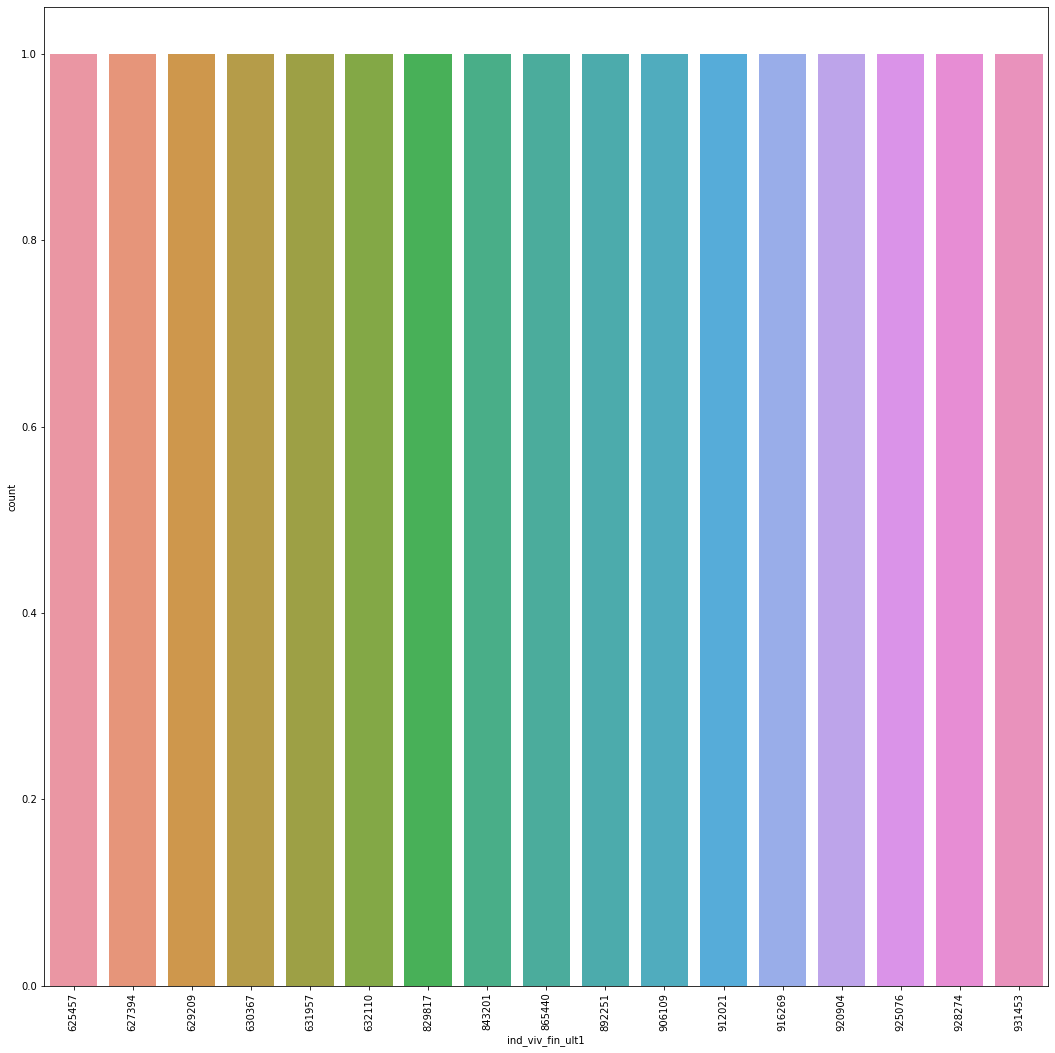

col: ind_nomina_ult1


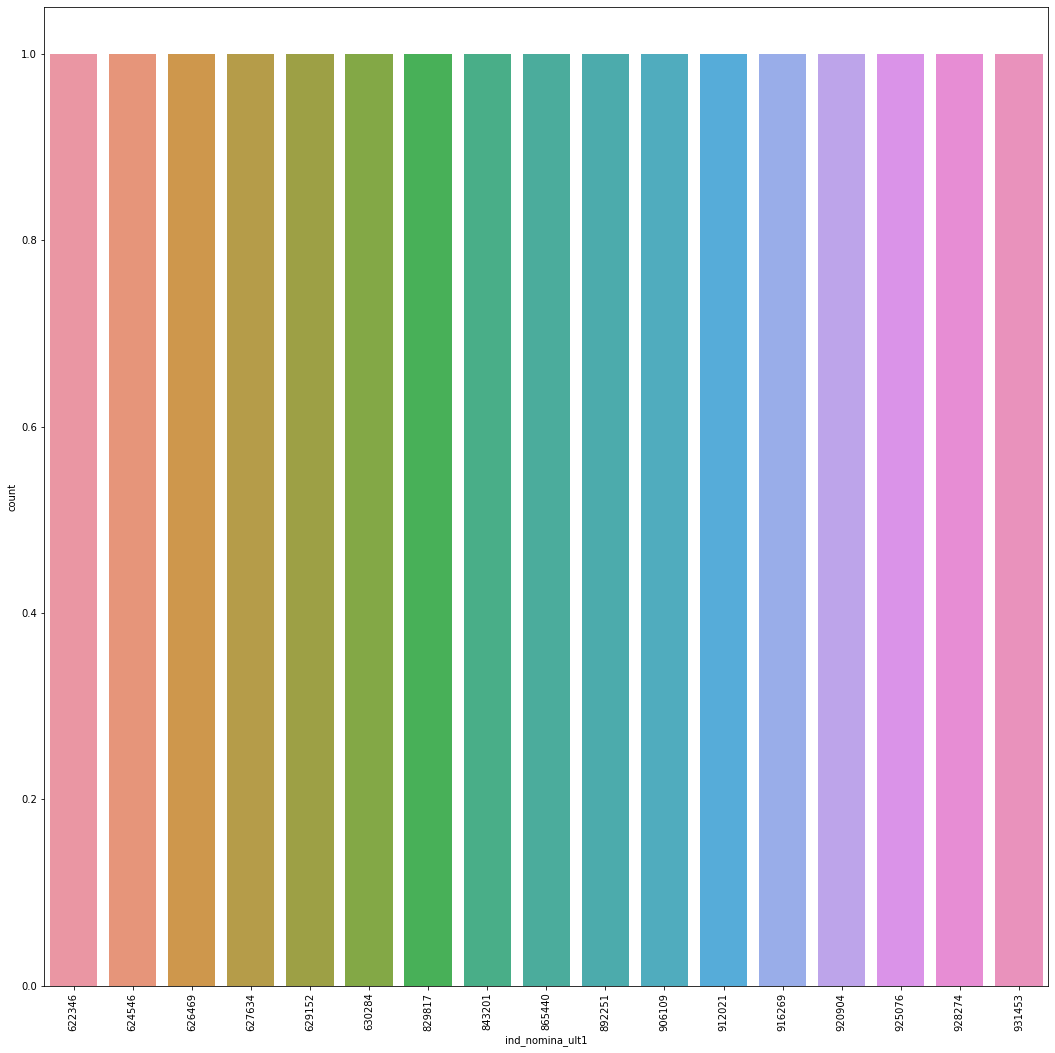

col: ind_nom_pens_ult1


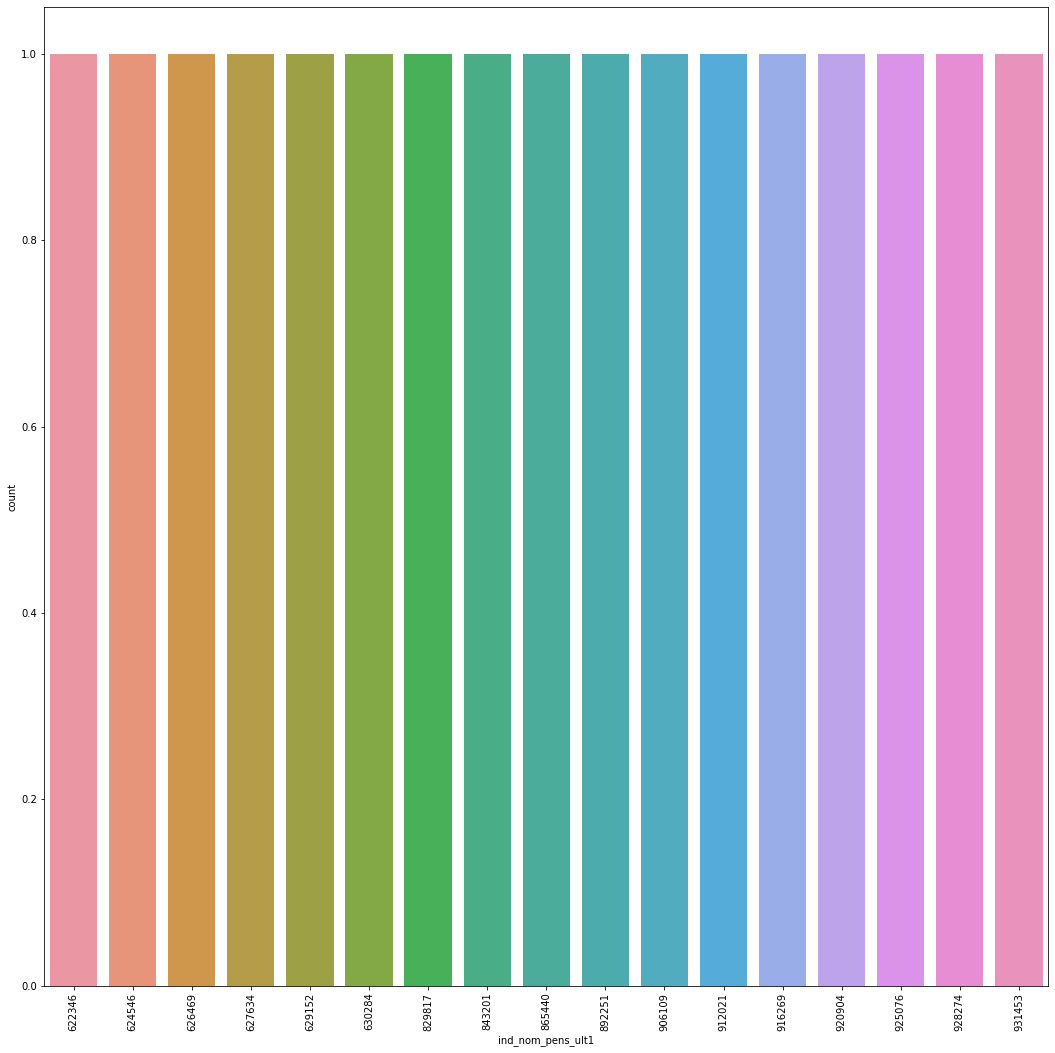

col: ind_recibo_ult1


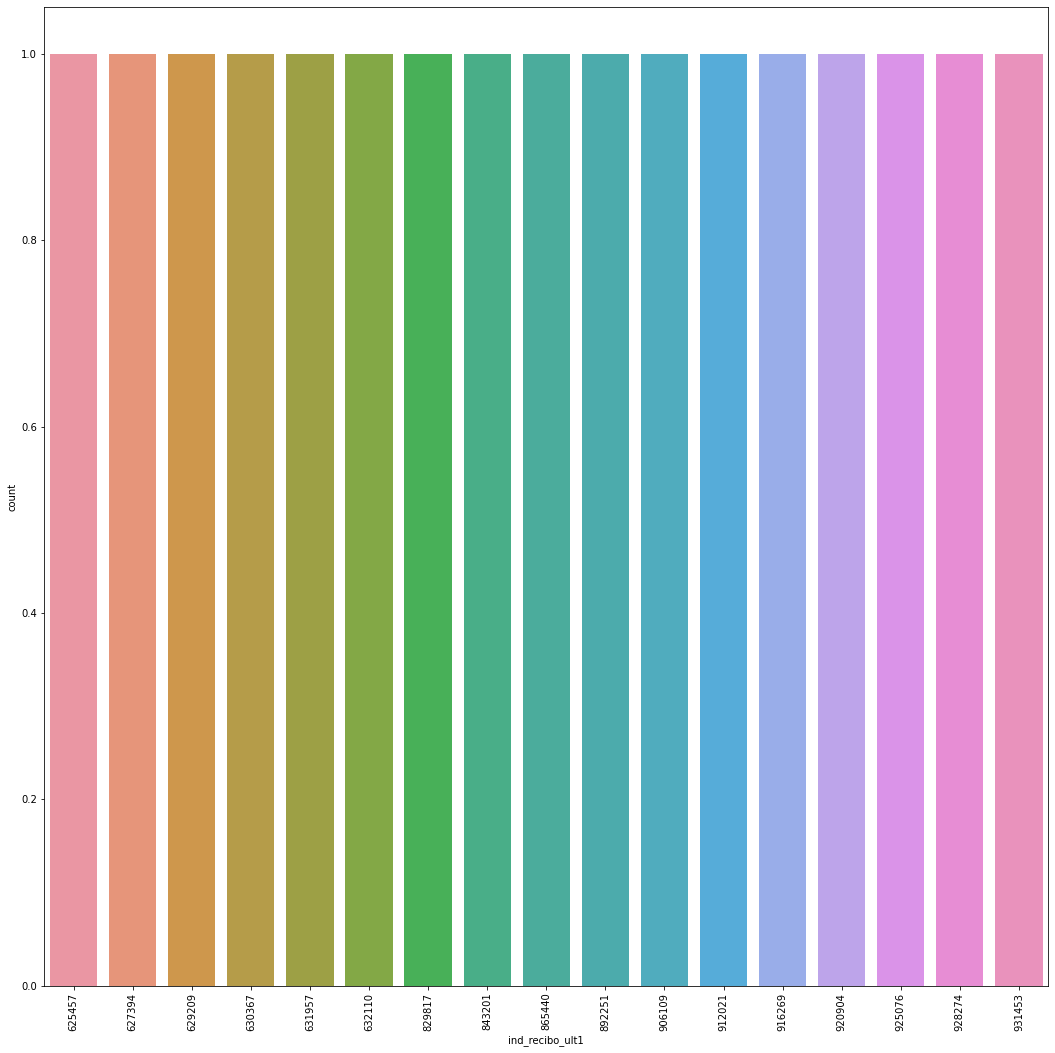

In [71]:
for col in df_group:        
    print('col:', col)
    f, ax = plt.subplots(figsize=(18, 18))
    sns.countplot(x=col, data=df_group)
    plt.xticks(rotation=90)
    plt.show()

...잘못 그린 것 같다. 날짜별 상품 판매 추이가 전체적으로 보니 유의미한 변화량이 관측되지 않는다